# Projet Machine Learning - Groupe 1 - Notebook Python

Promotion 58 - 4GMM, Année universitaire 2023-2024 

Julia Manon (B), Piot Damien (A), Dumas Thomas (B), Ben Abdallah Selim (A)

#### Ce Notebook est celui de référence. 

---------------------------------------------------------------


Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données "Global Data on Sustainable Energy" (2000-2020) disponible ici: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy.

Le jeu de données comprend 3649 observations et 21 variables, qui représentent diverses caractéristiques liées à la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020.

Les variables sont les suivantes:\
• **Entity** : Nom du pays ou de la région pour lequel les données sont rapportées.\
• **Year** : Année pour laquelle les données sont communiquées, entre 2000 et 2020.\
• **Access to electricity (% of population)** : Pourcentage de la population ayant accès à l’électricité.\
• **Access to clean fuels for cooking (% of population)** : Pourcentage de la population qui utilise principalement des combustibles propres.\
• **Renewable-electricity-generating-capacity-per-capita** : Capacité installée d’énergie renouvelable par personne.\
• **Financial flows to developing countries (US Dollars)** : Aide et assistance des pays développés pour les projets d’énergie propre.\
• **Renewable energy share in total final energy consumption (%)** : Pourcentage d’énergie renouvelable dans la consommation d’énergie finale.\
• **Electricity from fossil fuels (TWh)** : Électricité produite à partir de combustibles fossiles (charbon, pétrole, gaz) en térawattheures.\
• **Electricity from nuclear (TWh)** : Électricité produite à partir de l’énergie nucléaire en térawattheures.\
• **Electricity from renewables (TWh)** : Électricité produite à partir de sources renouvelables (hydroélec-
tricité, énergie solaire, énergie éolienne, etc.) en térawattheures.\
• **Low-carbon electricity (% electricity)** : Pourcentage d’électricité provenant de sources à faible teneur en carbone (nucléaire et énergies renouvelables).\
• **Primary energy consumption per capita (kWh/person)** : Consommation d’énergie par personne en kilowattheures.
• **Energy intensity level of primary energy (MJ/2011 PPP GDP)** : Consommation d’énergie par unité de PIB à parité de pouvoir d’achat.\
• **Value-co2-emissions (metric tons per capita)** : Émissions de dioxyde de carbone par personne en tonnes métriques.\
• **Renewables (% equivalent primary energy)** : Équivalent énergie primaire provenant de sources re- nouvelables.\
• **GDP growth (annual %)** : Taux de croissance annuel du PIB en monnaie locale constante.\
• **GDP per capita** : Produit intérieur brut (PIB) par personne.\
• **Density (P/Km2)** : Densité de population en personnes par kilomètre carré.\
• **Land Area (Km2)** : Surface terrestre totale en kilomètres carrés.\
• **Latitude** : Latitude du centroïde du pays en degrés décimaux.\
• **Longitude** : Longitude du centroïde du pays en degrés décimaux.

Il est à noter que dans la documentation, la variable **Value-co2-emissions (metric tons per capita)** représnte les émissions de dioxyde de carbone par personne en kilo-tonnes métriques. Cependant, lorsque nous regardons les valeurs, il semble plus probable est cohérent que cette valeur soit donnée à l'échelle nationale. En reportant cette valeur par habitant en utilisant la superficie des pays et la densité, les valeurs calculées sont plus cohérentes en émissions par personnes.

---

L’objectif est de prédire la variable Value-co2-emissions à partir des autres variables. Attention : Le jeu de données comporte beaucoup de valeurs manquantes, une étude exploratoire préalable est plus que jamais nécessaire pour se familiariser avec les données et les préparer à la phase de modélisation.

Pour ce faire, nous allons commencer par prendre en main les données et réaliser une analyse exploiratoire de celles-ci. Plus précisément, nous prendrons nos données en mains, nous réaliserons des analyses unidimensionnelles et multidimensionnelles, une étude des corrélation et une ACP. Puis, dans une seconde partie, nous ... ( A completer) 

# 1 - Prise en main des données et analyse exploratoire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1.1 - Prise en main du jeu de données

### 1.1.1 - Ouverture du jeu de données

In [2]:
# Lecture des données
pd.set_option('display.max_columns', None) # Affichage de toutes les colonnes du dataframe
path=""
data=pd.read_csv(path+"global-data-on-sustainable-energy .csv",sep=",")

# Vérification du contenu
print(data.shape)
data.head()


(3649, 21)


Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683

Interprétation : 

Les noms des colonnes sont assez compliqués, ils sont longs et contiennent des espaces. Nous allons les renommer par la suite pour simplifier le code et les appels aux colonnes. De plus, en observant un apperçu de notre dataframe, nous constatons que certaines données sont manquantes. Cela est visible par les valeurs marquées comme NaN. Pour palier cela, nous pouvons réaliser 2 traitements possibles : supprimer les données manquantes ou les estimer. Nous traiterons ces deux possibilités ultérieurement.

Nous commençons par renommer nos colonnes pour simplifier notre dataframe.

In [3]:
# Nous allons renommer les colonnes pour simplifier notre dataframe
# mon_dataframe.rename(columns={'ancien nom': 'nouveau nom'}, inplace = True)

data.rename(columns={'Access to electricity (% of population)' : 'Elec_access'}, inplace=True)
data.rename(columns={'Access to clean fuels for cooking' : 'Clean_access'}, inplace=True)
data.rename(columns={'Renewable-electricity-generating-capacity-per-capita' : 'Renewable_per_capita'}, inplace=True)
data.rename(columns={'Financial flows to developing countries (US $)' : 'Financial_flows'}, inplace=True)
data.rename(columns={'Renewable energy share in the total final energy consumption (%)' : 'Renewable_share'}, inplace=True)
data.rename(columns={'Electricity from fossil fuels (TWh)' : 'Fossil_elec'}, inplace=True)
data.rename(columns={'Electricity from nuclear (TWh)' : 'Nuclear_elec'}, inplace=True)
data.rename(columns={'Electricity from renewables (TWh)' : 'Renewable_elec'}, inplace=True)
data.rename(columns={'Low-carbon electricity (% electricity)' : 'Low_carb_elec'}, inplace=True)
data.rename(columns={'Primary energy consumption per capita (kWh/person)' : 'Energy_per_capita'}, inplace=True)
data.rename(columns={'Energy intensity level of primary energy (MJ/$2017 PPP GDP)' : 'PEnergy_intensity'}, inplace=True)
data.rename(columns={'Value_co2_emissions_kt_by_country' : 'CO2'}, inplace=True)
data.rename(columns={'Renewables (% equivalent primary energy)' : 'Renewables'}, inplace=True)
data.rename(columns={'gdp_growth' : 'Growth'}, inplace=True)
data.rename(columns={'gdp_per_capita' : 'GDP_per_capita'}, inplace=True)
data.rename(columns={data.columns[-4] : 'Density'}, inplace=True)
data.rename(columns={'Land Area(Km2)' : 'Area'}, inplace=True)

data.head()

Entity  Year  Elec_access  Clean_access  Renewable_per_capita  \
0  Afghanistan  2000     1.613591           6.2                  9.22   
1  Afghanistan  2001     4.074574           7.2                  8.86   
2  Afghanistan  2002     9.409158           8.2                  8.47   
3  Afghanistan  2003    14.738506           9.5                  8.09   
4  Afghanistan  2004    20.064968          10.9                  7.75   

   Financial_flows  Renewable_share  Fossil_elec  Nuclear_elec  \
0          20000.0            44.99         0.16           0.0   
1         130000.0            45.60         0.09           0.0   
2        3950000.0            37.83         0.13           0.0   
3       25970000.0            36.66         0.31           0.0   
4              NaN            44.24         0.33           0.0   

   Renewable_elec  Low_carb_elec  Energy_per_capita  PEnergy_intensity  \
0            0.31      65.957440          302.59482               1.64   
1            0.50      84.745766          236.89185               1.74   
2            0.56      81.159424          210.86215               1.40   
3            0.63      67.021280          229.96822               1.40   
4            0.56      62.921350          204.23125               1.20   

           CO2  Renewables    Growth  GDP_per_capita Density      Area  \
0   760.000000         NaN       NaN             NaN      60  652230.0   
1   730.000000         NaN       NaN             NaN      60  652230.0   
2  1029.999971         NaN       NaN      179.426579      60  652230.0   
3  1220.000029         NaN  8.832278      190.683814      60  652230.0   
4  1029.999971         NaN  1.414118      211.382074      60  652230.0   

   Latitude  Longitude  
0  33.93911  67.709953  
1  33.93911  67.709953  
2  33.93911  67.709953  
3  33.93911  67.709953  
4  33.93911  67.709953

Nous affichons notre dataframe comme dans la cellule de code précédente. Nous constatons que les noms des colonnes sont plus simples, comme attendu.

### 1.1.2 - Etude et modification du type des colonnes

Nous allons maintenant étudier la nature des variables et leur encodage. L'idée est d'avoir un apperçu sur les variables qualitatives et celles quantitatives. 

In [4]:
# Etude des types des colonnes
data.dtypes

Entity                   object
Year                      int64
Elec_access             float64
Clean_access            float64
Renewable_per_capita    float64
Financial_flows         float64
Renewable_share         float64
Fossil_elec             float64
Nuclear_elec            float64
Renewable_elec          float64
Low_carb_elec           float64
Energy_per_capita       float64
PEnergy_intensity       float64
CO2                     float64
Renewables              float64
Growth                  float64
GDP_per_capita          float64
Density                  object
Area                    float64
Latitude                float64
Longitude               float64
dtype: object

Nous allons convertir la variable 'Year' en variable qualitative. En effet, nous souhaitons que les années de nos données soient assimilées à des modalités ou catégories. C'est pour cela que la nature qualitative est à privilégier. De plus, on observe que la densité est présentée comme une variable qualitative alors que les données de cette colonne sont numériques et expriment une quantité. Nous allons modifier la nature de la variable 'Density' pour la convertir en variable quantitative. 

In [5]:
# Transformation de la colonne 'Year' en variable qualitative  
data['Year'] = data['Year'].astype('category')
data['Entity'] = data['Entity'].astype('category')

# Traitement de la colonne 'Density'
data['Density'] = data['Density'].str.replace(',','')
data['Density'] = data['Density'].str.replace('.','')
data['Density'] = data['Density'].astype(float)

# Affichage du type des variables après traitement
data.dtypes

Entity                  category
Year                    category
Elec_access              float64
Clean_access             float64
Renewable_per_capita     float64
Financial_flows          float64
Renewable_share          float64
Fossil_elec              float64
Nuclear_elec             float64
Renewable_elec           float64
Low_carb_elec            float64
Energy_per_capita        float64
PEnergy_intensity        float64
CO2                      float64
Renewables               float64
Growth                   float64
GDP_per_capita           float64
Density                  float64
Area                     float64
Latitude                 float64
Longitude                float64
dtype: object

On obtient bien que l'entité et l'année sont des variables qualitatives et la densité est bien une variable qualitative. Cela est visible dans l'apperçu du dataframe au niveau de la densité avec une conversion des valeurs en float.

In [6]:
data.head()

Entity  Year  Elec_access  Clean_access  Renewable_per_capita  \
0  Afghanistan  2000     1.613591           6.2                  9.22   
1  Afghanistan  2001     4.074574           7.2                  8.86   
2  Afghanistan  2002     9.409158           8.2                  8.47   
3  Afghanistan  2003    14.738506           9.5                  8.09   
4  Afghanistan  2004    20.064968          10.9                  7.75   

   Financial_flows  Renewable_share  Fossil_elec  Nuclear_elec  \
0          20000.0            44.99         0.16           0.0   
1         130000.0            45.60         0.09           0.0   
2        3950000.0            37.83         0.13           0.0   
3       25970000.0            36.66         0.31           0.0   
4              NaN            44.24         0.33           0.0   

   Renewable_elec  Low_carb_elec  Energy_per_capita  PEnergy_intensity  \
0            0.31      65.957440          302.59482               1.64   
1            0.50      84.745766          236.89185               1.74   
2            0.56      81.159424          210.86215               1.40   
3            0.63      67.021280          229.96822               1.40   
4            0.56      62.921350          204.23125               1.20   

           CO2  Renewables    Growth  GDP_per_capita  Density      Area  \
0   760.000000         NaN       NaN             NaN     60.0  652230.0   
1   730.000000         NaN       NaN             NaN     60.0  652230.0   
2  1029.999971         NaN       NaN      179.426579     60.0  652230.0   
3  1220.000029         NaN  8.832278      190.683814     60.0  652230.0   
4  1029.999971         NaN  1.414118      211.382074     60.0  652230.0   

   Latitude  Longitude  
0  33.93911  67.709953  
1  33.93911  67.709953  
2  33.93911  67.709953  
3  33.93911  67.709953  
4  33.93911  67.709953

### 1.1.3 - Etude des valeurs manquantes

Dans la partie d'ouverture du jeu de données, nous avons pu constater que certaines valeurs étaient manquantes. Nous allons donc étudier le taux de valeurs manquantes pour chaque variable. 

In [7]:
data_missing_value = data.isna().mean().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print('--- Taux de valeurs manquantes ---')
print(data_missing_value*100)

--- Taux de valeurs manquantes ---
Renewables              58.563990
Financial_flows         57.248561
Renewable_per_capita    25.513839
CO2                     11.729241
Growth                   8.687312
GDP_per_capita           7.728145
PEnergy_intensity        5.672787
Renewable_share          5.316525
Clean_access             4.631406
Nuclear_elec             3.453001
Low_carb_elec            1.151000
Renewable_elec           0.575500
Fossil_elec              0.575500
Elec_access              0.274048
Latitude                 0.027405
Area                     0.027405
Density                  0.027405
Longitude                0.027405
Energy_per_capita        0.000000
Year                     0.000000
Entity                   0.000000
dtype: float64


Ce mode d'affichage permet de visualiser les variables comptant la plus grande proportion de valeurs manqantes. On constante que pour les colonnes 'Renewables' et 'Financial_flows', il manque plus de la moitié des donneés. Pour la colonne 'Renewable_per_capita', il manque une donnée sur 4. 

En accord avec le sujet du projet, nous décidons de supprimer ces colonnes.

In [8]:
# Copie des données avant suppression des valeurs manquantes
data_mv=data.copy()

# Suppression des colonnes

data.drop('Renewables', axis=1, inplace=True)
data.drop('Financial_flows', axis=1, inplace=True)
data.drop('Renewable_per_capita', axis=1, inplace=True)


In [9]:
data.head()
data.shape # --> On trouve (3649, 18)

(3649, 18)

La nouvelle taille du dataframe nous confirme que nos colonnes ont bien été supprimées. 

Pour la suite de l'étude, nous souhaitons travailler sur un jeu de données ne comprenant pas de valeurs manquantes. Pour ce faire, nous allons supprimer les lignes contenant des valeurs manquantes.

In [10]:
# On veut maintenant supprimer les lignes qui contiennent des valeurs manquantes

# Suppression de toutes les lignes contenant au moins une valeur manquante
data = data.dropna(axis = 0, how = 'any')

In [11]:
print("-- Taille du dataframe après traitement --")
data.shape #(2868, 18)

-- Taille du dataframe après traitement --


(2868, 18)

Notre jeu de données contient 2868 observations définies par 18 caractéristiques. Le nombre d'observations est en adéquation avec les données du sujet. 

## 1.2 - Analyse exploratoire des données

### 1.2.1 - Analyse unidimensionnelle des données


On s'intéresse dans un premier temps aux variables quantitatives. Nous allons toutes les représenter sous formz d'histogramme pour visualiser leur distribution.

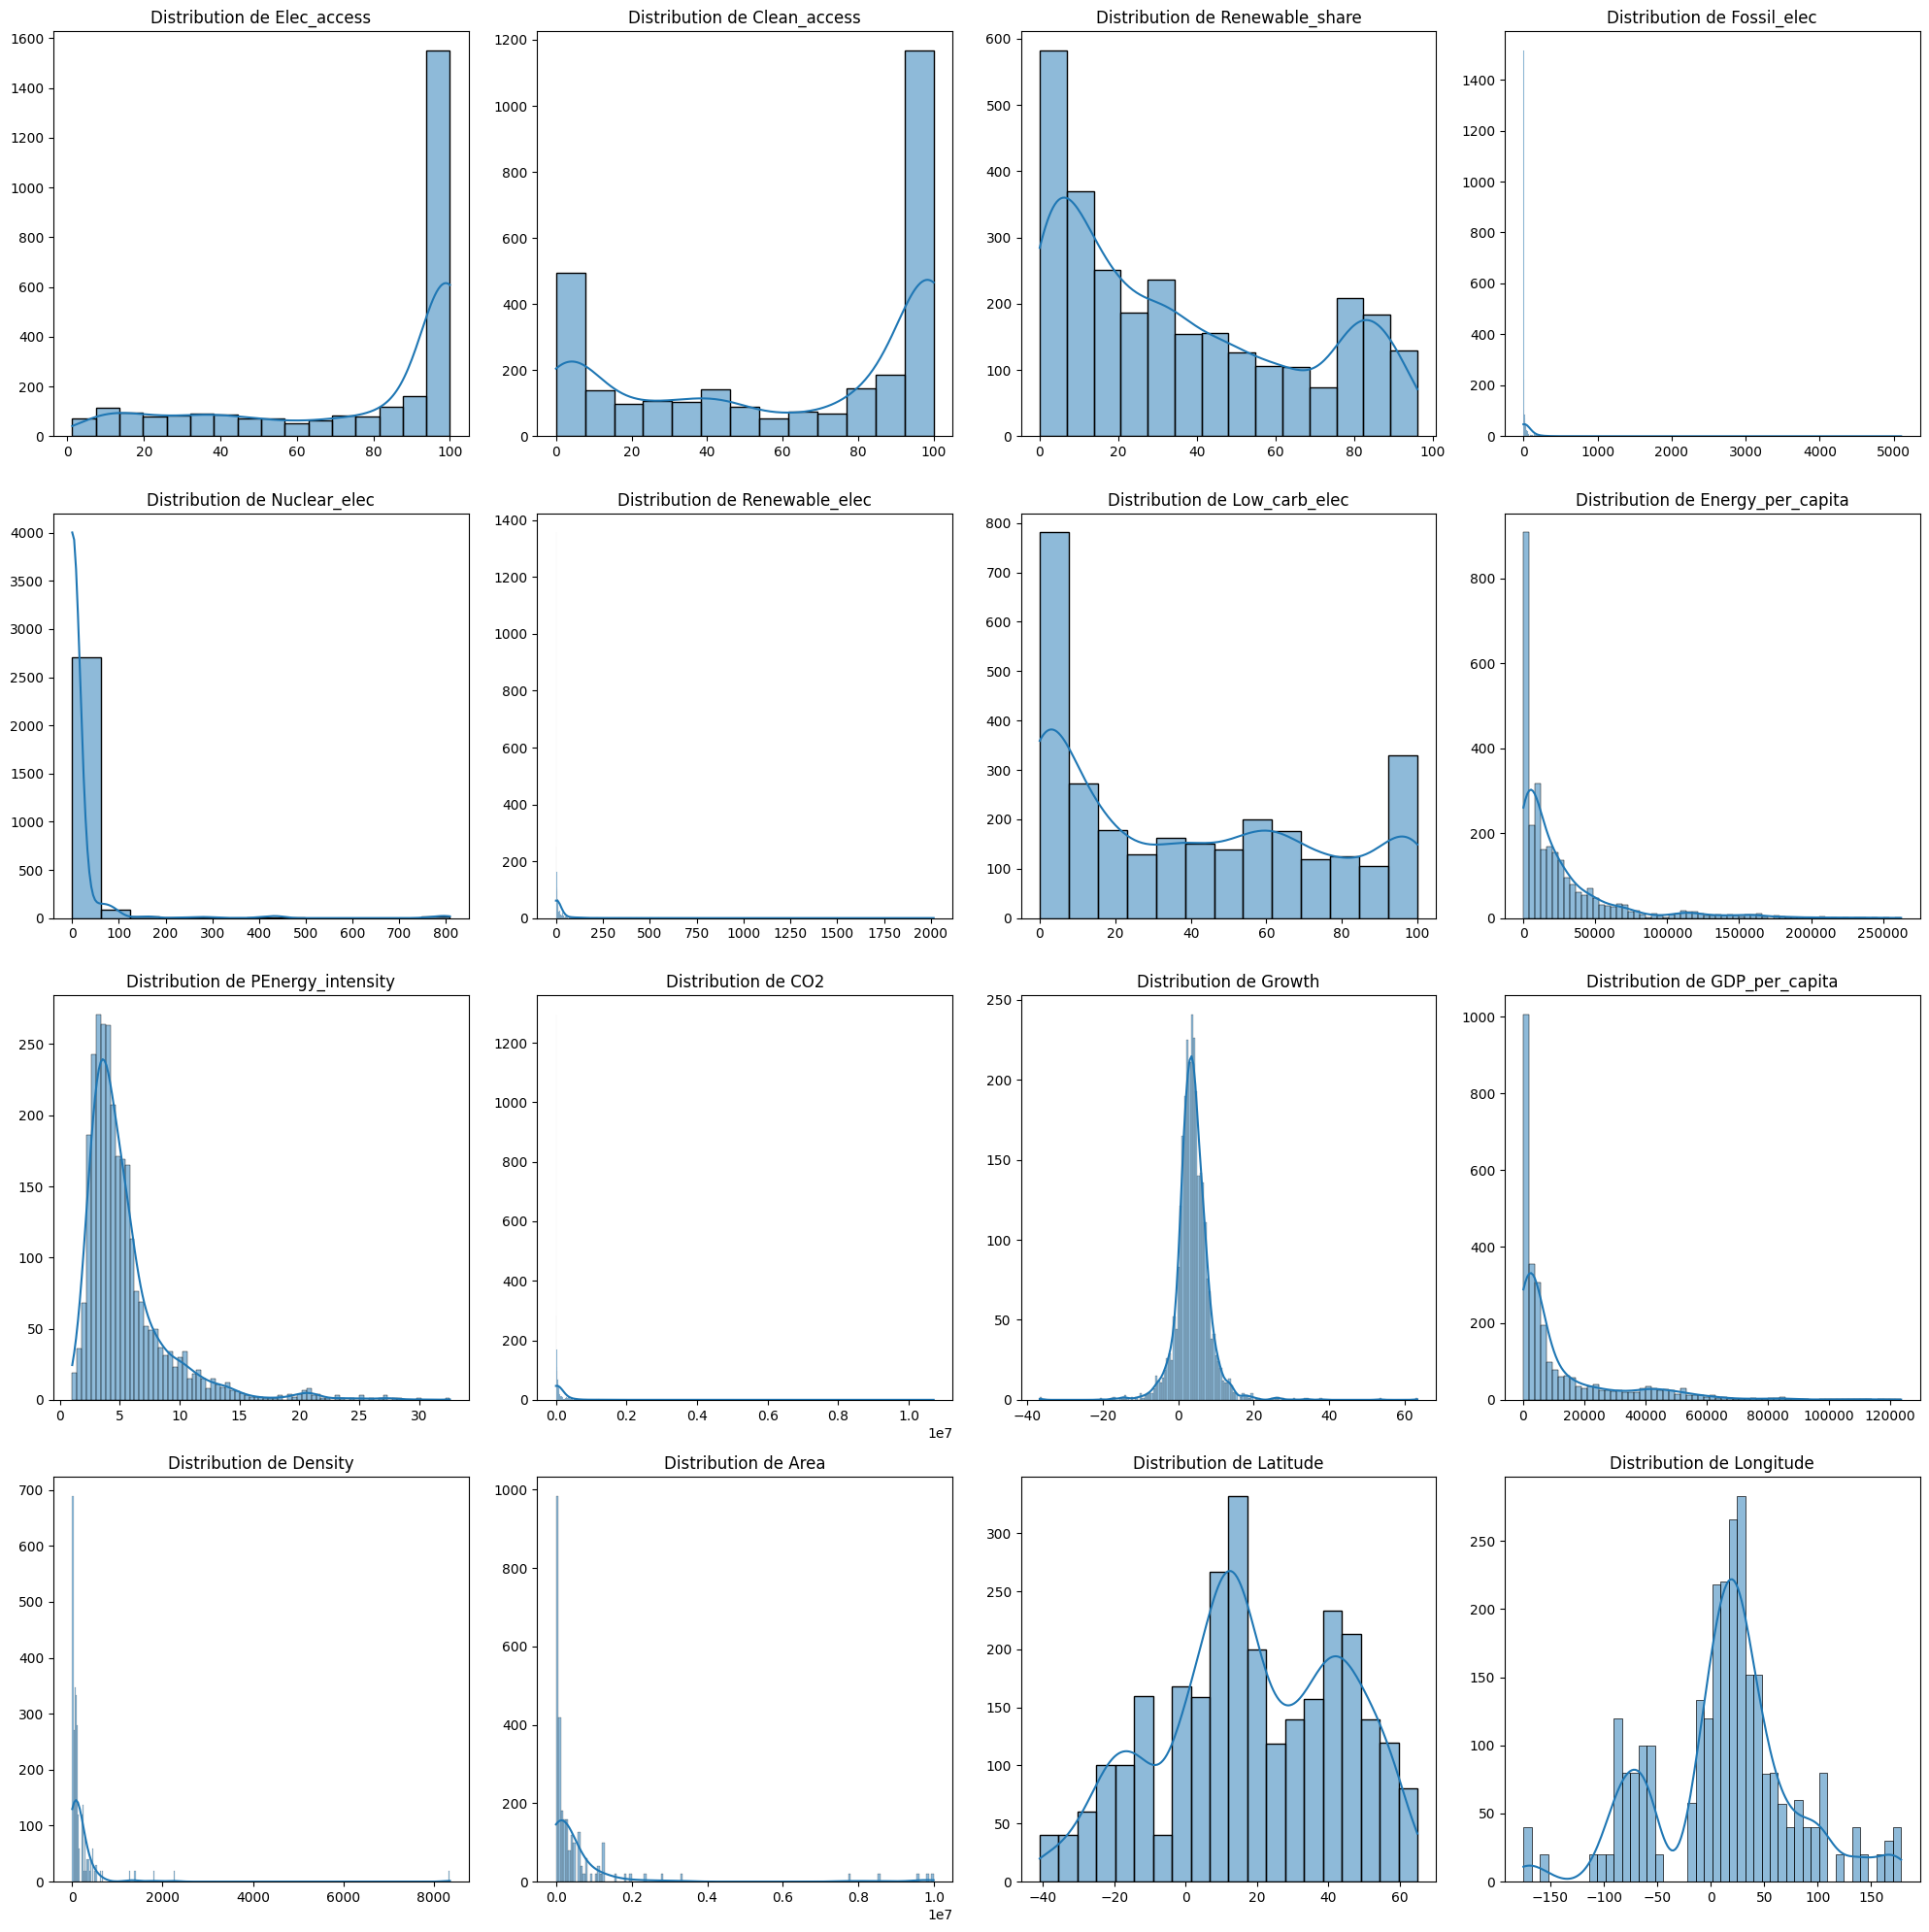

In [12]:
# Définir la taille de la figure pour les subplots
plt.figure(figsize=(20, 20))

# Sélectionner les colonnes numériques pour la visualisation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_columns)

# Définir le nombre de colonnes et de lignes pour les subplots
n_cols = 4
n_rows = (num_plots + n_cols - 1) // n_cols  # Arrondir à l'entier supérieur pour s'assurer d'avoir assez de lignes

# Créer un subplot pour chaque variable quantitative
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel('')
    plt.ylabel('')

# Ajuster l'espacement entre les subplots pour une meilleure lisibilité
plt.tight_layout()
plt.show()


L'accès à l'électricité et aux combustibles propres : L'observation de distributions bimodales ou multimodales pour ces indicateurs met en avant des disparités dans l'accès aux ressources énergétiques propres à travers différents pays au fil du temps. Des concentrations marquées vers les valeurs élevées révèlent que de nombreux pays ont réussi à garantir un accès généralisé à l'électricité et aux combustibles propres pour leur population, tandis que des régions moins densément peuplées signalent des déficits significatifs dans cet accès.

Part des énergies renouvelables dans la consommation totale d'énergie : Cette variable présente une concentration de données vers le bas de l'échelle, soulignant que dans de nombreux pays, les énergies renouvelables représentent encore une fraction minime du mix énergétique. À l'opposé, une dispersion des données vers des valeurs plus élevées illustre l'ambition de certains pays d'accroître la part des énergies renouvelables.

Consommation d'énergie primaire par habitant : La distribution de cette variable, inclinée vers la droite et dotée d'une longue traîne, suggère que la majorité des pays ont une consommation d'énergie par individu relativement faible, tandis qu'un nombre restreint de nations, probablement plus industrialisées, affichent des niveaux de consommation nettement plus élevés.

Intensité énergétique et émissions de CO2 : Ces indicateurs, par leurs distributions, mettent en avant les variations en matière d'efficacité énergétique et de niveaux d'émissions de CO2 entre les pays. Une intensité énergétique élevée ou des émissions de CO2 importantes peuvent révéler une dépendance accrue aux combustibles fossiles ou une utilisation de l'énergie moins efficiente.

Croissance du PIB et PIB par habitant : L'examen de ces variables fournit des indications sur le développement économique et la répartition de la prospérité parmi les pays. Les asymétries dans ces distributions peuvent indiquer que certains pays jouissent d'une forte croissance économique et de standards de vie élevés, tandis que d'autres sont confrontés à une croissance plus modeste.

Ces analyses dévoilent des tendances, des anomalies et des domaines nécessitant une exploration plus approfondie. L'examen de la distribution de ces variables peut aussi guider les stratégies pour gérer les données manquantes, pour transformer les données, ou pour sélectionner des modèles de machine learning adaptés.

Cepandant, certains graphiques ne sont pas très visibles avec cet affichage sous forme de subplots, nous allons zoomer sur certains histogrammes

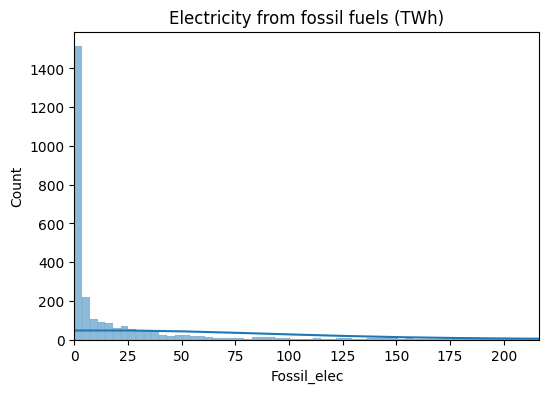

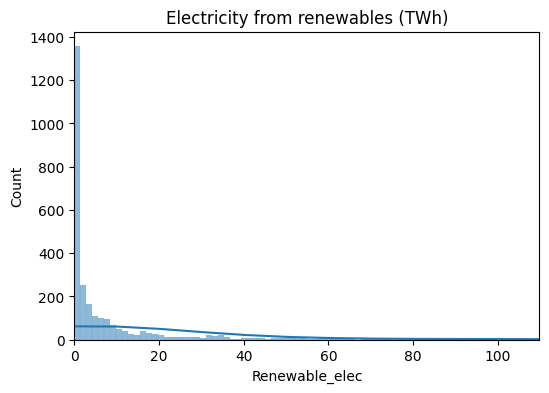

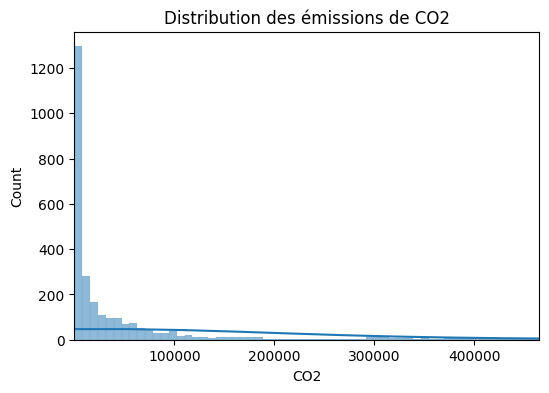

In [13]:
# Réglage de la taille de la figure pour chaque graphique
fig_size = (6, 4)

# Graphique pour 'Fossil_elec'
plt.figure(figsize=fig_size)
sns.histplot(data['Fossil_elec'], kde=True)
plt.title('Electricity from fossil fuels (TWh)')
plt.xlim(data['Fossil_elec'].min(), data['Fossil_elec'].quantile(0.95))
plt.show()

# Graphique pour 'Renewable_elec'
plt.figure(figsize=fig_size)
sns.histplot(data['Renewable_elec'], kde=True)
plt.title('Electricity from renewables (TWh)')
plt.xlim(data['Renewable_elec'].min(), data['Renewable_elec'].quantile(0.95))
plt.show()

# Graphique pour 'CO2'
plt.figure(figsize=fig_size)
sns.histplot(data['CO2'], kde=True)
plt.title('Distribution des émissions de CO2')
plt.xlim(data['CO2'].min(), data['CO2'].quantile(0.95))
plt.show()


Production d'électricité à partir de combustibles fossiles : Le graphique illustre comment la production d'électricité via les combustibles fossiles se répartit parmi différents pays et sur plusieurs années. Majoritairement, cette distribution révèle que, pour un grand nombre de cas, la production reste modeste, bien que certaines observations montrent des niveaux nettement plus importants.

Génération d'électricité via les énergies renouvelables : L'analyse de cette distribution souligne la diversité dans la production d'électricité issue des sources renouvelables. À l'image de la production basée sur les combustibles fossiles, une grande partie des données indique des productions faibles, ce qui peut témoigner des efforts de transition vers des sources d'énergie plus durables engagés par plusieurs pays.

Émissions de CO2 : La distribution des émissions de CO2 par pays montre que la majorité affiche des niveaux d'émissions relativement modestes. Toutefois, une distribution allongée vers la droite montre que quelques pays ont des émissions de CO2 sont considérablement plus importantes, donnant lieu à une distribution asymétrique.

Ces interprétations fournissent un aperçu de la répartition globale de la production énergétique et des émissions de CO2. Elles mettent en évidence à la fois les défis persistants liés à la dépendance aux combustibles fossiles et les progrès en matière d'adoption des énergies renouvelables, ainsi que l'importante disparité des niveaux d'émissions de CO2 entre les pays.

### 1.2.2 - Transformation des variables

Avec les observations réalisées dans la partie précédente, nous pouvons nous demander s'il serait judicieux de transformer nos données. Nous pouvons nous demader ce que nous pourrions modifier sur celles-ci et ce que ces modifications pourraient apporter. 

* Réduction de l'asymétrie : Certaines de nos variables montrent une distribution asymétrique avec une queue à droite, ce qui indique une asymétrie positive. Une transformation logarithmique pourrait aider à réduire cette asymétrie, rendant la distribution plus proche d'une distribution normale. Cela est souvent une exigence ou une attente pour de nombreux modèles de régression et d'autres analyses statistiques.

* Gestion des valeurs extrêmes : Les valeurs extrêmes observées dans ces variables peuvent influencer de manière très importante les analyses statistiques et les modèles de prédiction. Les transformations peuvent réduire l'impact de ces valeurs extrêmes en les rapprochant du reste des données, améliorant ainsi la robustesse des modèles.

* Stabilisation de la variance : La variance des données peut augmenter avec l'augmentation des valeurs de la variable. Une transformation logarithmique peut aider à stabiliser la variance sur l'ensemble des données.

En résumé, pour notre projet, envisager des transformations pour ces variables quantitatives peut non seulement améliorer la qualité de nos analyses statistiques et de modélisation mais aussi aider à dériver des insights plus précis et fiables à partir de nos données. En particulier, une transformation logarithmique pourrait être une bonne piste d'amélioration.

Nous allons appliquer cette transformation logarithmique sur les colonnes suivantes : 'Fossil_elec', 'Renewable_elec', 'Energy_per_capita' et 'CO2'.

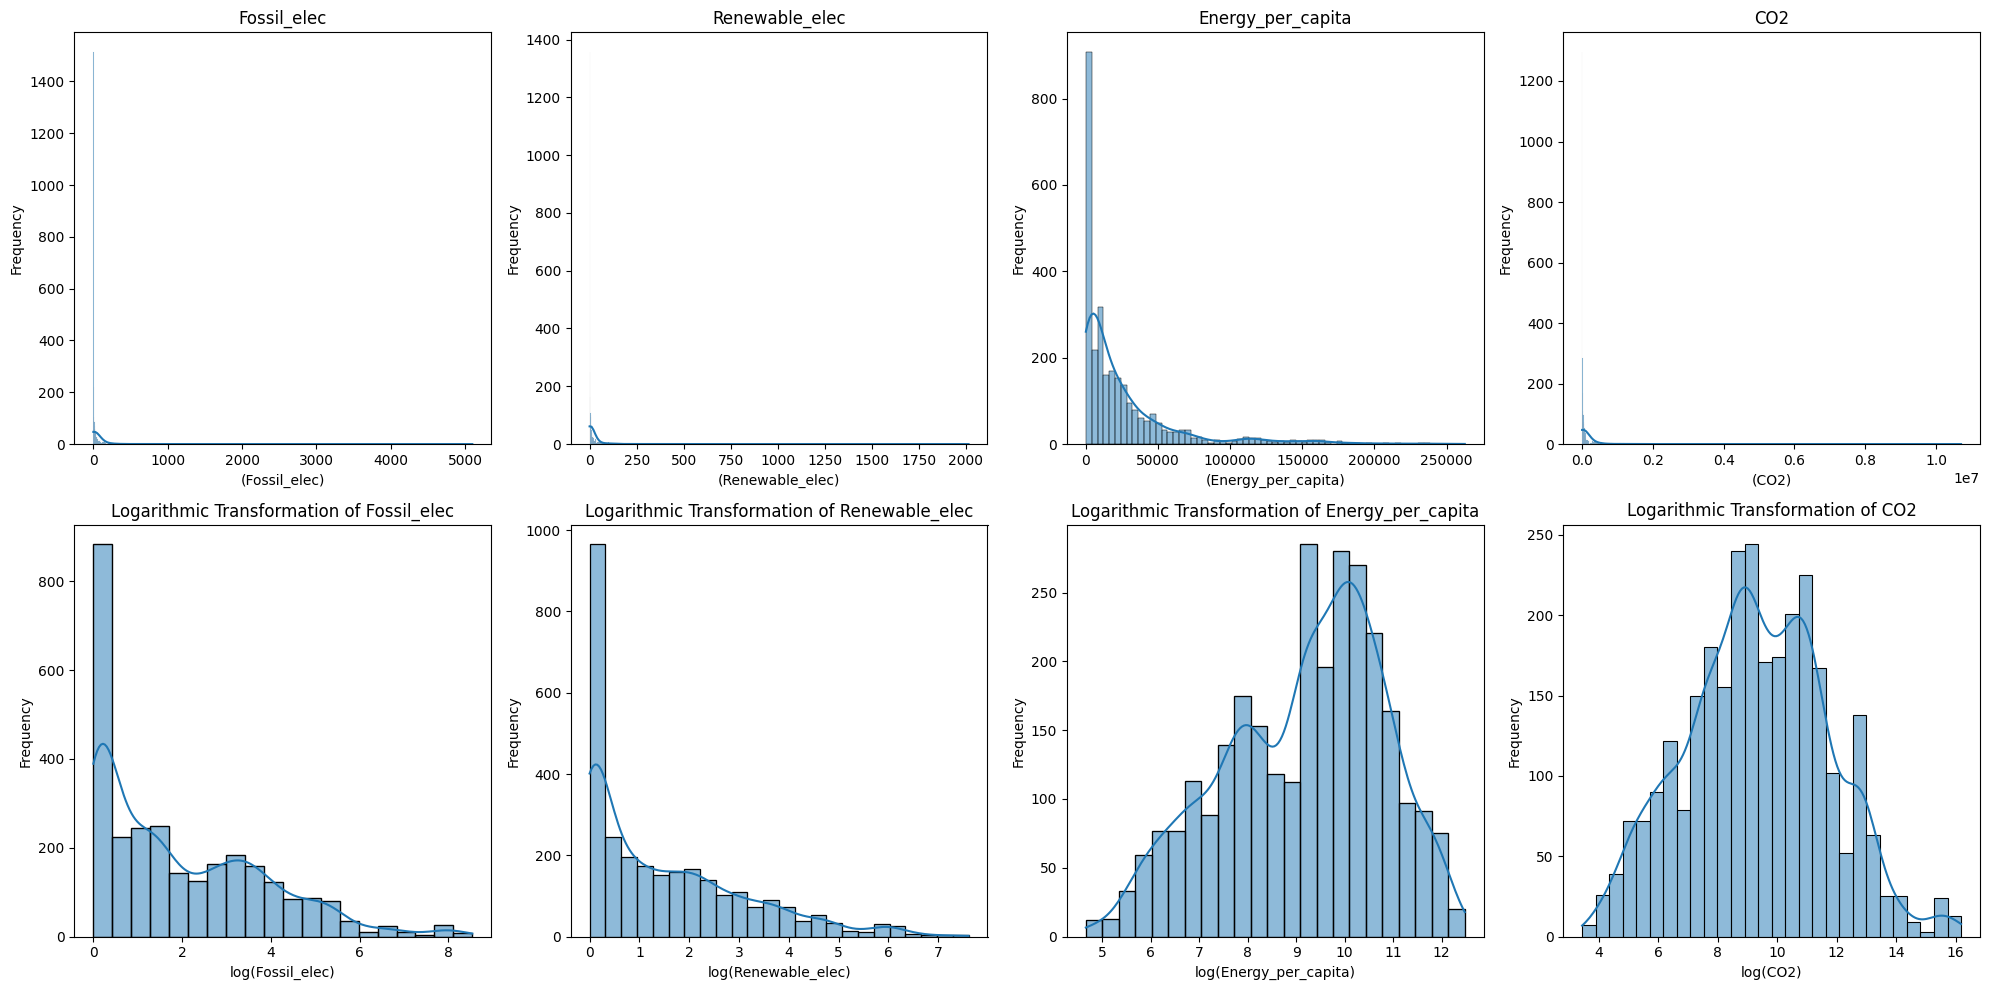

In [14]:
# Liste des colonnes à transformer
columns_to_transform = [
    'Fossil_elec', 
    'Renewable_elec', 
    'Energy_per_capita', 
    'CO2'
]

# Appliquer la transformation logarithmique avec ajustement pour les valeurs nulles
for col in columns_to_transform:
    data[f'log_{col}'] = np.log(data[col] + 1)  # +1 pour gérer les valeurs de 0

# Visualiser les distributions après transformation
plt.figure(figsize=(20, 10))

for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col}')
    plt.xlabel(f'({col})')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 4, 4+i)
    sns.histplot(data[f'log_{col}'], kde=True)
    plt.title(f'Logarithmic Transformation of {col}')
    plt.xlabel(f'log({col})')
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()


Homogénéisation des distributions : Les distributions relatives à la production d'électricité issue des combustibles fossiles, à celle provenant des énergies renouvelables (exprimée en TWh), à la consommation d'énergie primaire par habitant, ainsi qu'aux émissions de CO2, se sont rapprochées d'une forme plus symétrique, s'alignant ainsi sur une distribution normale. Ce constat est cohérent à nos prévisions.

Atténuation des valeurs extrêmes : Grâce à la transformation logarithmique, l'impact des valeurs extrêmes sur les distributions a été modéré. Ceci a pour effet de rendre ces distributions moins biaisées, ce qui pourrait simplifier l'usage de méthodes statistiques et de modélisation présupposant une distribution normale des données.

Optimisation de la modélisation : Les ajustements apportés via ces transformations peuvent contribuer à améliorer l'efficacité des modèles de prévision. En effet, ils tendent à linéariser les relations entre variables et à homogénéiser la variance des résidus, deux conditions favorables à la robustesse des modèles statistiques.

Ces observations montrent l'utilité des transformations logarithmiques pour la préparation des données, notamment en vue de leur analyse statistique et de leur modélisation.

### 1.2.3 - Etude des émissions de CO2

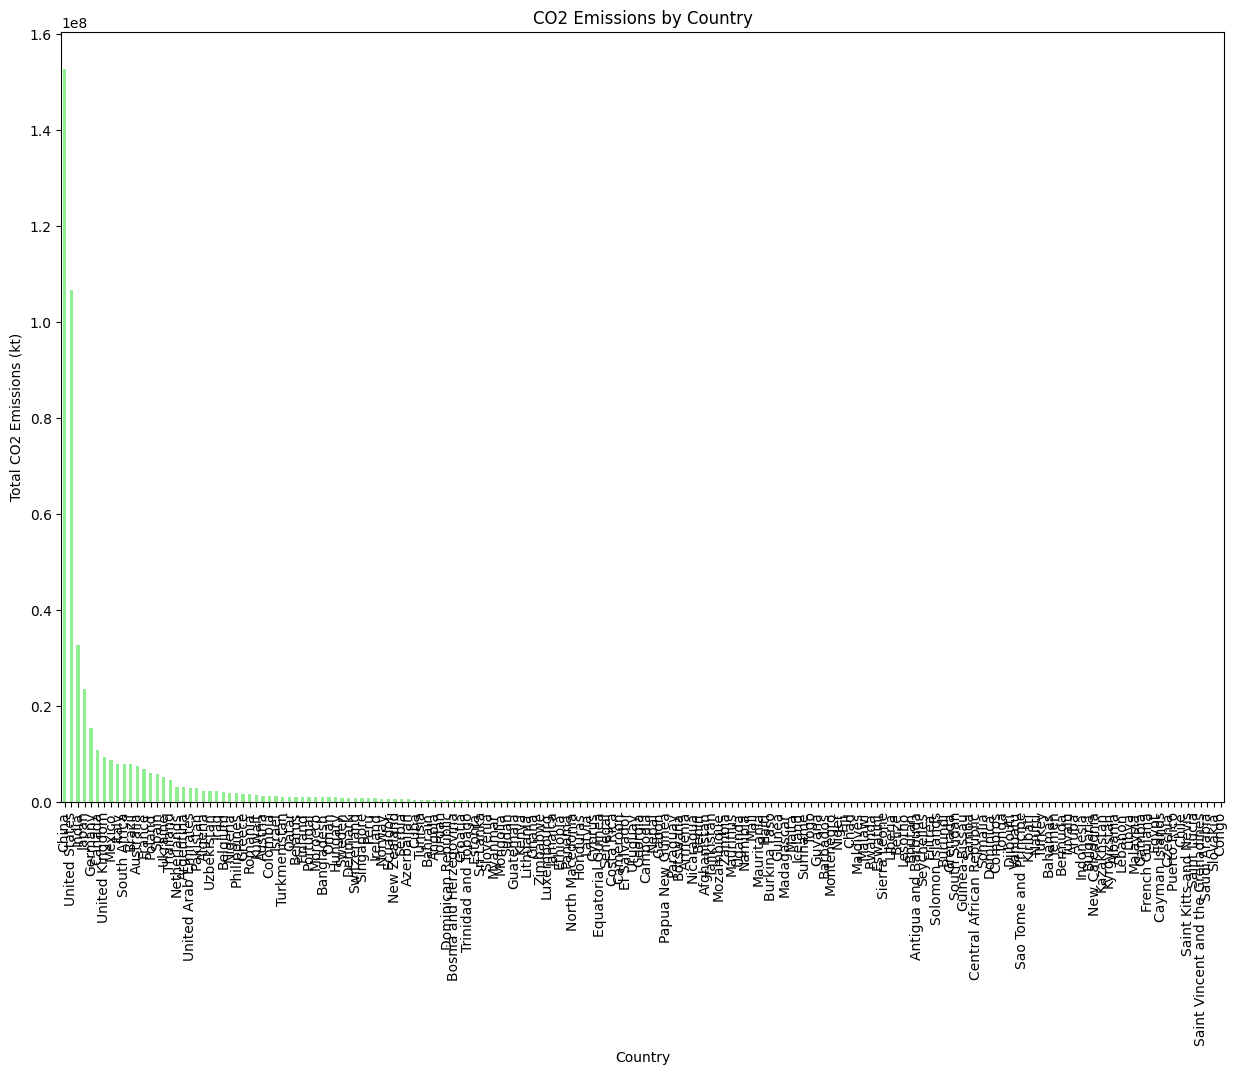

In [15]:
# Visualisation de l'hétérogénéité des émissions de CO2 pour tous les pays

plt.figure(figsize=(15, 10))

co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)

co2_emissions_by_country.plot(kind='bar', color='lightgreen')
plt.title('CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (kt)')
plt.xticks(rotation=90)
plt.show()


Le graphique illustre clairement l'hétérogénéité des émissions de CO2 parmi les pays de notre jeu de données. On note une concentration très élevée des émissions parmi les premiers pays et une diminution significative à mesure que l'on avance vers les pays moins émetteurs. Cette distribution montre que quelques pays sont responsables d'une part disproportionnée des émissions globales de CO2, tandis que de nombreux autres pays contribuent relativement peu à ce total.

Aussi, on constante que certains pays ont une valeur d'émissions en CO2 nulle, pour pouvoir effectuer des calculs de ratio et autre, on distinguera pour la suite les 176 pays de notre jeu de données, parmis lesquels on compte 148 pays aux émissions non nulles.

In [16]:
# Calcul du ratio entre le pays le plus émetteur et le pays le moins émetteur
# Exclure les pays avec des émissions de CO2 égales à 0 avant de calculer le ratio
co2_emissions = co2_emissions_by_country[co2_emissions_by_country > 0] # on ne conserve que les pays aux émissions non nulles
max_emissions = co2_emissions.max()
min_emissions = co2_emissions.min()
emissions_ratio = max_emissions / min_emissions

emissions_ratio

print("Ratio entre le pays le plus émetteur et le pays le moins émetteur :", emissions_ratio)


Ratio entre le pays le plus émetteur et le pays le moins émetteur : 288175.1906836442


Le ratio des émissions totales de CO2 entre le pays le plus émetteur (Chine) et le pays le moins émetteur (Kyrgyzstan) est d'environ 288 175, mettant en évidence une différence extrême dans les contributions aux émissions globales de CO2. Cela souligne la concentration très élevée des émissions parmi un petit nombre de pays.

Nous rappelons que pour ce calcul, nous avons sélectionné le pays avec la plus petite valeur d'émission de CO2, mais non nulle, parmis les 176 pays.

In [17]:
# Initialiser la somme cumulée des émissions et le compteur de pays
cumulative_emissions = 0
countries_count = 0

# Trier les émissions par ordre croissant
sorted_emissions = co2_emissions_by_country[co2_emissions_by_country > 0].sort_values()
total_co2_emissions = co2_emissions_by_country[co2_emissions_by_country > 0].sum()

# Itérer sur les émissions de CO2 des pays pour calculer la somme cumulée
for emissions in sorted_emissions:
    cumulative_emissions += emissions
    countries_count += 1
    if cumulative_emissions / total_co2_emissions > 0.1:
        countries_count -= 1  # Ajuster pour ne pas compter le pays qui dépasse le seuil
        break


nbr_country = data['Entity'].nunique()

print("Nombre total de pays aux émissions non nulles :", nbr_country)
print("")
print("En classant les pays du moins émetteur au plus émetteur ")
print("Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales : ", countries_count)


Nombre total de pays aux émissions non nulles : 148

En classant les pays du moins émetteur au plus émetteur 
Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales :  125


Nous rappelons que sur la liste des 176 pays de notre jeu de données, 148 pays ont des émissions de CO2 non nulles. Ce sont ces 148 pays que nous étudions dans cette partie.

Interprétation :

On classe les 148 pays du moins émetteur en CO2 au plus émetteur. Si on somme les émissions des 125 pays les moins émetteurs de CO2, ces émissions ne dépassent pas 10% de la valeur totale à l'échelle mondiale. On en déduite que 90% des émissions en CO2 proviennent des 23 pays les plus émetteurs d'émissions à l'échelle mondiale.

Si on ramène cela à l'ensemble des pays de notre jeu de données, on obtient que les 147 pays les moins polluants rejettent 10% des émissions de CO2 mondiales.

Nous allons maintenant étudier les 5 pays les plus émetteurs.

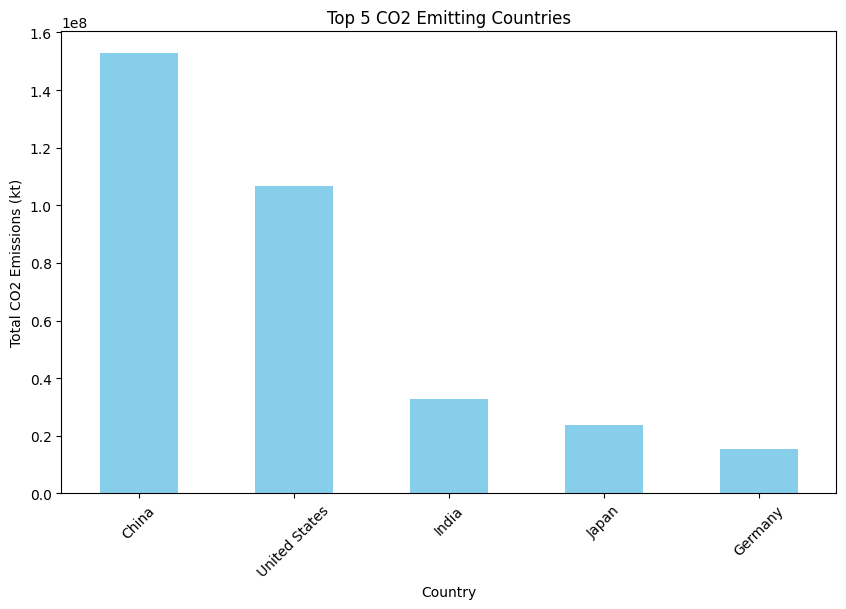

Entity
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: CO2, dtype: float64

In [18]:
# Grouper les données par pays et calculer la somme totale des émissions de CO2 pour chaque pays
co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)

# Sélectionner les 5 pays les plus émetteurs de CO2
top_5_co2_emitters = co2_emissions_by_country.head(5)

# Visualisation des 5 plus grands émetteurs de CO2
plt.figure(figsize=(10, 6))
top_5_co2_emitters.plot(kind='bar', color='skyblue')
plt.title('Top 5 CO2 Emitting Countries')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (kt)')
plt.xticks(rotation=45)
plt.show()

# Afficher les noms et les valeurs des 5 plus grands émetteurs de CO2
top_5_co2_emitters


In [19]:
# Calculer la somme des émissions des 5 pays les plus émetteurs
sum_top_5_co2_emitters = top_5_co2_emitters.sum()
print("Sommme des émissions des 5 pays les plus émetteurs :",sum_top_5_co2_emitters)
print("")

# Calculer le pourcentage que représente la somme des émissions des 5 pays les plus émetteurs par rapport aux émissions totales
percentage_top_5_co2_emitters = (sum_top_5_co2_emitters / co2_emissions_by_country.sum()) * 100
print("Pourcentage des émissions des 5 pays les plus polluants :", percentage_top_5_co2_emitters)


Sommme des émissions des 5 pays les plus émetteurs : 331150779.70289993

Pourcentage des émissions des 5 pays les plus polluants : 68.39546759559938


La visualisation montre clairement l'hétérogénéité des émissions de CO2 entre les pays, avec les 5 pays les plus émetteurs de CO2 étant :

* Chine avec environ 152 732 800 kt de CO2 émis.
* États-Unis avec environ 106 590 800 kt de CO2 émis.
* Inde avec environ 32 679 580 kt de CO2 émis.
* Japon avec environ 23 674 690 kt de CO2 émis.
* Allemagne avec environ 15 472 890 kt de CO2 émis.

Ces résultats mettent en évidence la grande disparité des contributions aux émissions de CO2 à l'échelle mondiale, avec la Chine et les États-Unis se distinguant nettement comme les plus grands émetteurs. Au total, les émissions des 5 pays les plus polluants représentent 331 150 779 kt de CO2 émis, c'est à dire 68% des émissions totales.

In [20]:
import plotly.express as px

co2_emissions_by_country = data.groupby('Entity', as_index=False).agg(Total_CO2=('CO2', 'sum'))

fig = px.choropleth(co2_emissions_by_country,
                    locations="Entity",
                    locationmode="country names",
                    color="Total_CO2",
                    hover_name="Entity",
                    hover_data={"Entity": False,  # Cache Entity dans les informations supplémentaires
                                "Total_CO2": ":.2f"},  # Formate Total_CO2 avec 2 décimales
                    color_continuous_scale=px.colors.sequential.Viridis_r,  # '_r' pour inverser le colormap
                    title="Carte des émissions de CO2 par pays",
                    labels={'Total_CO2': 'CO2 émis'})

fig.update_geos(showcountries=True, countrycolor="rgb(255, 255, 255)")
fig.show()

In [21]:
# On veut maintenant ramener ces chiffres par rapport à la surface et à la densité de population par pays

# Définition des dataframes des pays les plus polluants

df_chn = data.loc[data['Entity'] == 'China']
df_usa = data.loc[data['Entity'] == 'United States']
df_ind = data.loc[data['Entity'] == 'India']
df_jpn = data.loc[data['Entity'] == 'Japan']
df_ger = data.loc[data['Entity'] == 'Germany']

# Calcul des émissions de CO2 par personne

co2_chn = top_5_co2_emitters[0]/(df_chn['Density'].iloc[0]*df_chn['Area'].iloc[0])
co2_usa = top_5_co2_emitters[1]/(df_usa['Density'].iloc[0]*df_usa['Area'].iloc[0])
co2_ind = top_5_co2_emitters[2]/(df_ind['Density'].iloc[0]*df_ind['Area'].iloc[0])
co2_jpn = top_5_co2_emitters[3]/(df_jpn['Density'].iloc[0]*df_jpn['Area'].iloc[0])
co2_ger = top_5_co2_emitters[4]/(df_ger['Density'].iloc[0]*df_ger['Area'].iloc[0])

print("Emissions par habitant en Chine :", co2_chn)
print("Emissions par habitant aux Etats-Unis :",co2_usa)
print("Emissions par habitant en Inde :",co2_ind)
print("Emissions par habitant au Japon :",co2_jpn)
print("Emissions par habitant en Allemagne :",co2_ger)

Emissions par habitant en Chine : 0.10401772194296711
Emissions par habitant aux Etats-Unis : 0.3010982480858295
Emissions par habitant en Inde : 0.021425158040500457
Emissions par habitant au Japon : 0.18052084828479845
Emissions par habitant en Allemagne : 0.18057815827526036


In [22]:
# Grouper les données et calculer le Total_CO2 pour chaque 'Entity'
co2_emissions_by_country = data.groupby('Entity', as_index=False).agg(
    Total_CO2=('CO2', 'sum'),
    Average_Area=('Area', 'mean'),  # Supposant que l'aire peut varier, on prend une moyenne pour simplifier
    Average_Density=('Density', 'mean')  # Idem pour la densité
)

# Calculer le CO2 émis par habitant (ajustement selon votre besoin pour le calcul)
co2_emissions_by_country['CO2_per_Capita'] = co2_emissions_by_country['Total_CO2'] / (co2_emissions_by_country['Average_Area'] * co2_emissions_by_country['Average_Density'])

fig = px.choropleth(co2_emissions_by_country,
                    locations="Entity",
                    locationmode="country names",
                    color="CO2_per_Capita",
                    hover_name="Entity",
                    hover_data={
                        "Entity": False,  # Cache 'Entity' dans les informations supplémentaires
                        "CO2_per_Capita": True,  # Affiche le CO2 émis par habitant
                        "Total_CO2": True  # Optionnel: affiche également le Total_CO2
                    },
                    color_continuous_scale=px.colors.sequential.Viridis_r,  # '_r' pour inverser le colormap
                    title="Carte des émissions de CO2 par pays par habitant",
                    labels={'CO2_per_Capita': 'CO2 émis par habitant'})

fig.update_geos(showcountries=True, countrycolor="rgb(255, 255, 255)")
fig.show()


On observe que, parmis les 5 pays les plus polluants, le classement est remanié une fois les émissions ramenées à la population. Les Etats-Unis sont le pays avec les émissions par habitant les plus importantes. A l'inverse, l'Inde présente une population très importante, ce qui en fait un pays très polluant. Cependant, ses habitants ont des émissions 15 fois moins importantes que les Américains.

Sur la deuxième carte mondiale, on observe que les Etats-Unis, le Canada et l'Australie se distinguent nettement en terme d'émissions de CO2 par habitant. Comme nous avons vu dans les calculs de la cellule précédente, l'Inde a une valeur d'émissions de CO2 par habitant moins importante. Cela peut s'expliquer par le mode de vie moins polluant de sa population. Cependant, compte tenu de sa densité très importante, cela fait de l'Inde un pays polluant à l'échelle nationale. Enfin, bien que l'Allemagne soit un petit pays en terme de superficie et avec une densité raisonnable, l'utilisation d'énergies fossiles dans son mix énergétique en fait un des pays assez polluants en terme d'émissions de CO2 par habitant.

## 1.3 - Analyse descriptive multidimensionnelle des données

### 1.3.1 - Première visualisation globale


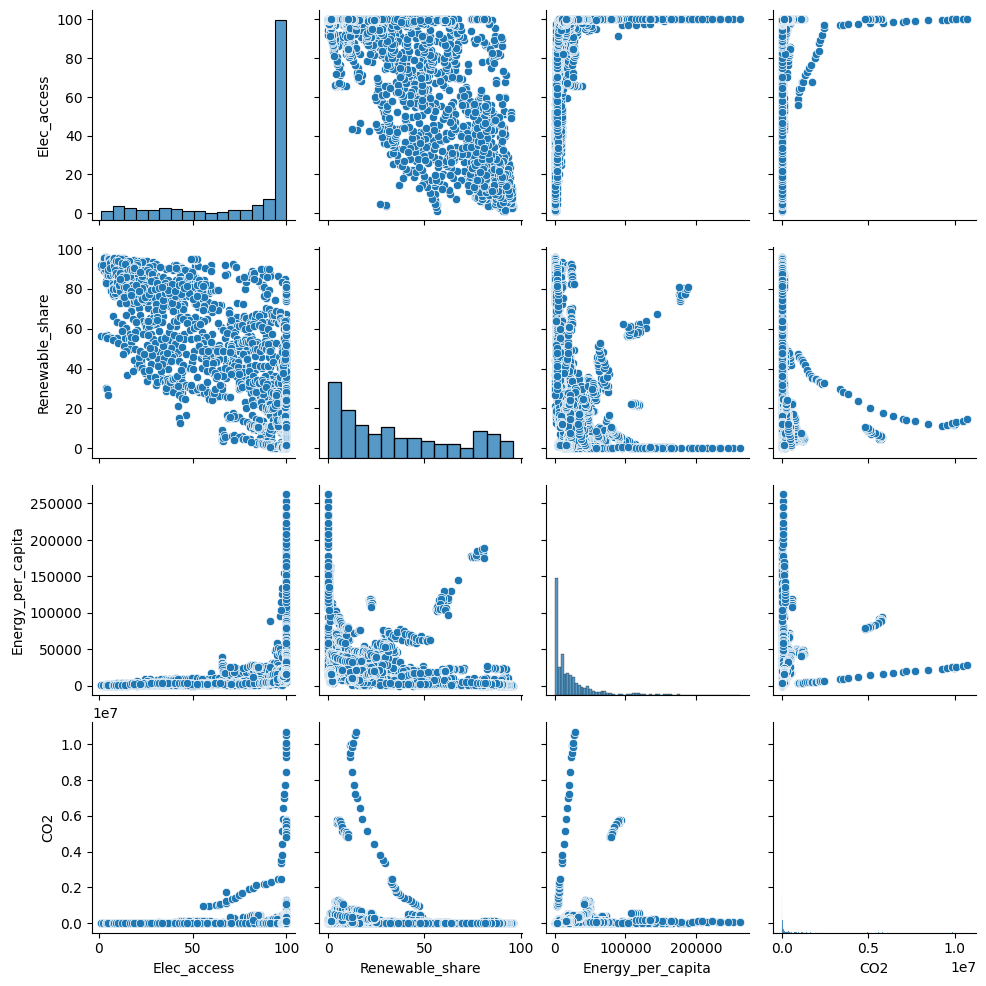

In [23]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Elec_access',
    'Renewable_share',
    'Energy_per_capita',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()


Les graphiques de dispersion analysés révèlent les dynamiques entre quatre variables cruciales de notre ensemble de données : l'accès à l'électricité, la proportion d'énergie renouvelable dans la consommation énergétique finale, la consommation d'énergie primaire par individu, et les émissions de CO2 totales par pays.

Accès à l'électricité par rapport aux autres indicateurs : Une corrélation semble se dessiner, montrant une hausse des émissions de CO2 et de la consommation d'énergie primaire par personne à mesure que l'accès à l'électricité s'élargit. Cela peut suggérer que les pays plus avancées, bénéficiant d'un accès étendu à l'électricité, affichent également une consommation énergétique et des émissions de CO2 plus élevées.

Influence de l'énergie renouvelable sur les émissions de CO2 : Aucune corrélation évidente n'émerge de l'analyse visuelle. Il apparaît que la contribution des énergies renouvelables à la consommation énergétique totale n'est pas directement liée aux émissions de CO2 à l'échelle nationale. Cette observation suggère l'impact potentiel d'autres variables, comme l'efficacité de l'utilisation énergétique, la diversité des sources d'énergie, ou encore l'ampleur de l'activité économique, sur les émissions de CO2.

Consommation d'énergie primaire par individu face aux émissions de CO2 : Un lien positif est observé, indiquant que les pays où la consommation d'énergie primaire par tête est plus importante affichent généralement des niveaux d'émissions de CO2 supérieurs. Cette relation est attendue et peut refléter une intensité économique accrue et une prédominance des combustibles fossiles dans le mix énergétique de ces pays.

Ces interprétations mettent en lumière les interactions entre développement énergétique, utilisation de sources renouvelables, et impact environnemental à travers les émissions de CO2. Elles soulignent l'importance d'approfondir l'analyse pour comprendre les multiples facteurs influençant ces relations et envisager des stratégies d'atténuation des émissions de CO2 tout en promouvant un accès élargi à l'énergie.

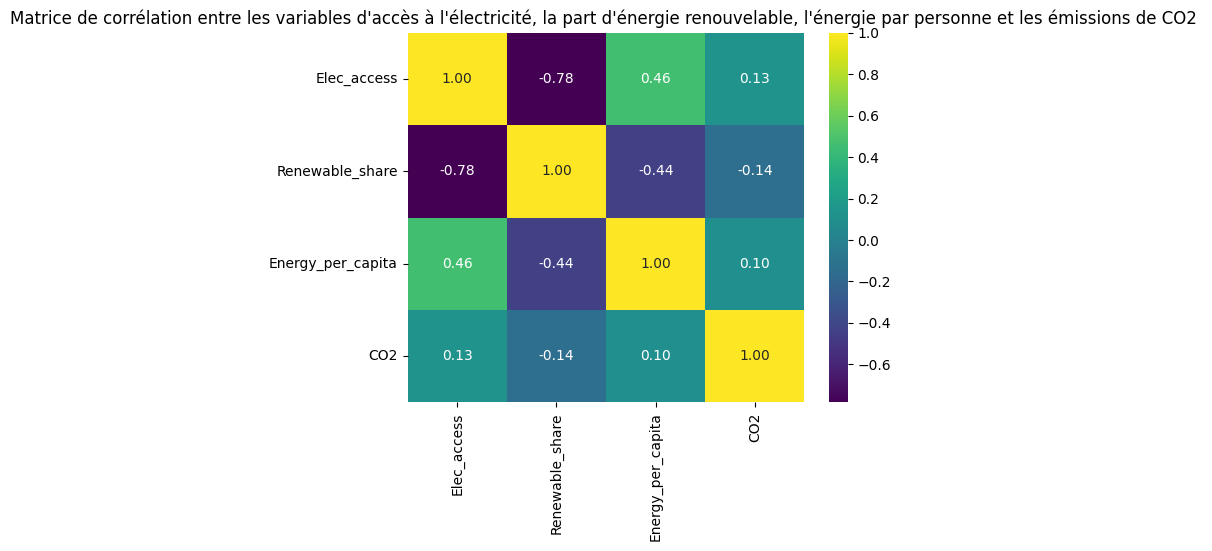

In [24]:
# Calculer le coefficient de corrélation de Pearson entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables d'accès à l'électricité, la part d'énergie renouvelable, l'énergie par personne et les émissions de CO2 ")
plt.show()


La matrice de corrélation ci-dessus montre les coefficients de corrélation entre les variables.

Accès à l'électricité : Cette variable ne montre pas de corrélation forte avec les émissions de CO2 ou la part de l'énergie renouvelable, ce qui suggère que l'accès universel à l'électricité peut être atteint indépendamment des niveaux d'émissions de CO2 ou de la part des énergies renouvelables, et ce qui paraît cohérent.

Part de l'énergie renouvelable : La corrélation entre la part de l'énergie renouvelable dans la consommation finale d'énergie et les émissions de CO2 est faible, indiquant que l'augmentation de la part des énergies renouvelables n'est pas directement liée à une réduction des émissions de CO2 au niveau des données analysées. Cela pourrait refléter le fait que d'autres facteurs, tels que l'efficacité énergétique et le mix énergétique global, affectent également les émissions.

Consommation d'énergie primaire par habitant : Il existe une corrélation positive modérée avec les émissions de CO2, ce qui est cohérent avec l'idée que des niveaux de consommation d'énergie plus élevés sont associés à des émissions plus importantes. Cette relation souligne l'importance de l'efficacité énergétique et de la transition vers des sources d'énergie moins carbonées pour réduire les émissions.

Ces résultats montrent les relations entre l'accès à l'électricité, la part des énergies renouvelables, la consommation d'énergie et les émissions de CO2. Ils suggèrent que, bien que l'augmentation de la part des énergies renouvelables soit importante pour un avenir durable, des efforts supplémentaires en matière d'efficacité énergétique et de réduction de la consommation d'énergie sont nécessaires pour atteindre une réduction significative des émissions de CO2. 

Nous allons vérifier cette hypothèse en étudiant les corrélations entre d'autres variables.

### 1.3.2 - Etude de la corrélation entre les énergies fossiles et les émissions de CO2

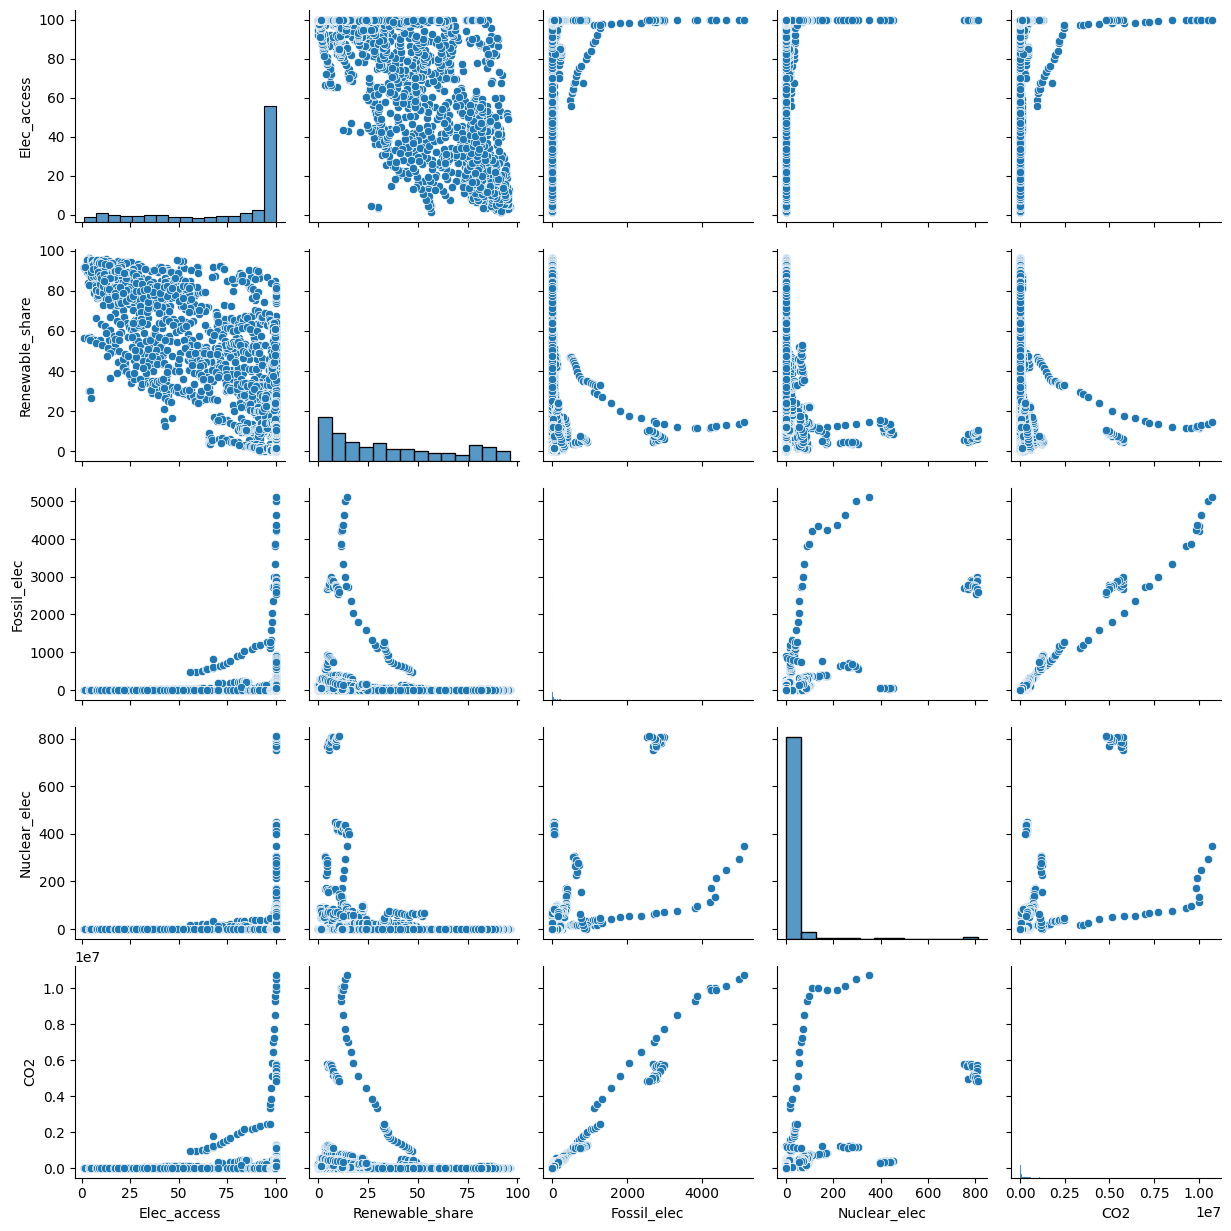

In [25]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Elec_access',
    'Renewable_share',
    'Fossil_elec',
    'Nuclear_elec',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()

Ces observations mettent en évidence les interrelations complexes entre l'accès à l'électricité, les choix énergétiques des pays, et leurs impacts sur les émissions de CO2. Une stratégie globale pour réduire les émissions de CO2 devra probablement prendre en compte ces différents aspects pour être efficace.

Accès à l'électricité : Les pays bénéficiant d'un accès élargi à l'électricité affichent souvent une consommation accrue d'énergie, notamment d'origine fossile et nucléaire, accompagnée de niveaux supérieurs d'émissions de CO2. Cette tendance souligne la corrélation entre le développement économique et l'intensification de la consommation énergétique.

Influence des énergies renouvelables : La proportion des énergies renouvelables dans le mix énergétique varie considérablement d'un pays à l'autre, sans montrer de corrélation directe avec la consommation d'énergies fossiles ou nucléaires ni avec les émissions de CO2. Cela suggère que les pays déploient des stratégies énergétiques variées, reflétant peut-être des priorités ou des contraintes environnementales et économiques différentes.

Production d'électricité à partir de combustibles fossiles : Une corrélation positive est observée entre la production d'électricité issue de combustibles fossiles et les niveaux d'émissions de CO2. Cet état de fait est logique, la combustion de combustibles fossiles étant une importante source d'émissions de CO2.

Production d'électricité nucléaire : Bien que certains pays disposent d'une capacité notable de production d'électricité nucléaire, cette dernière ne paraît pas liée de manière directe à une réduction ou une augmentation des émissions de CO2. L'énergie nucléaire, ne générant pas de CO2 lors de la production d'électricité, les variations observées dans les émissions des pays pourraient être attribuées à d'autres aspects de leur mix énergétique ou de leur activité économique.

Émissions de CO2 : Les émissions plus conséquentes de CO2 sont généralement associées à une utilisation élevée d'énergie, qu'elle provienne de sources fossiles ou nucléaires. Ceci met en lumière l'importance de considérer à la fois l'efficacité énergétique et la diversification des sources d'énergie dans les stratégies visant à réduire les émissions de gaz à effet de serre.

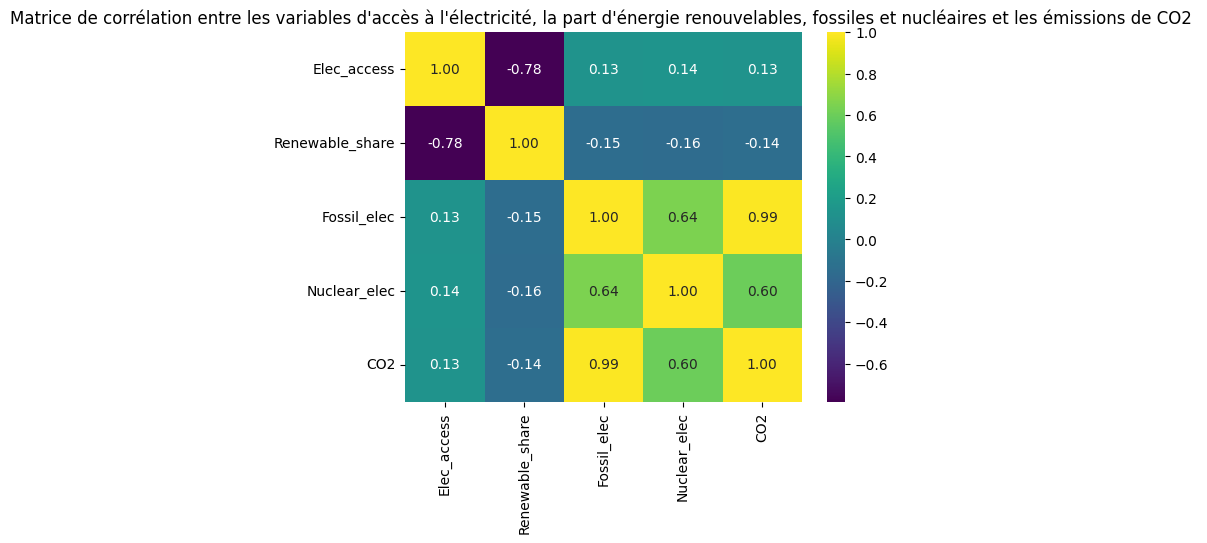

In [26]:
# Calculer le coefficient de corrélation entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables d'accès à l'électricité, la part d'énergie renouvelables, fossiles et nucléaires et les émissions de CO2 ")
plt.show()


La matrice de corrélation montre les relations entre l'accès à l'électricité, la part des énergies renouvelables, et l'utilisation d'énergie fossile et nucléaire avec les émissions de CO2. On observe : 

Relation entre l'accès à l'électricité et les énergies renouvelables : Une corrélation négative prononcée indique que les pays ayant un accès généralisé à l'électricité tendent à présenter une part moindre d'énergies renouvelables dans leur mix énergétique. Cette observation suggère que les nations largement électrifiées pourraient s'appuyer davantage sur des sources d'énergie non renouvelables.

Lien entre la consommation d'énergie fossile et les émissions de CO2 : Une corrélation très marquée révèle que l'augmentation de la consommation d'énergie fossile est directement liée à une hausse des émissions de CO2. Cette forte corrélation souligne le rôle critique de l'énergie fossile dans le bilan carbone, indépendamment des autres composantes du mix énergétique.

Corrélation entre les énergies renouvelables et les émissions de CO2 : Une légère corrélation négative entre ces deux variables peut suggérer que l'accroissement de la part des énergies renouvelables n'entraîne pas automatiquement une réduction proportionnelle des émissions de CO2 au niveau global. Cela pourrait refléter l'usage simultané de combustibles fossiles même dans les contextes où les énergies renouvelables sont promues.

Cette matrice des corrélations souligne le rôle majeur et prépondérant des combustibles fossiles dans les émissions de CO2 et suggère que les politiques en faveur des énergies renouvelables pourraient ne pas avoir un impact immédiat sur les émissions de CO2 sans autres changements dans le mix énergétique et l'efficacité énergétique.

De plus, cette analyse confirme les hypothèses émises dans la première visualisation globale.



### 1.3.3 - Etude de l'influence économique et démographique

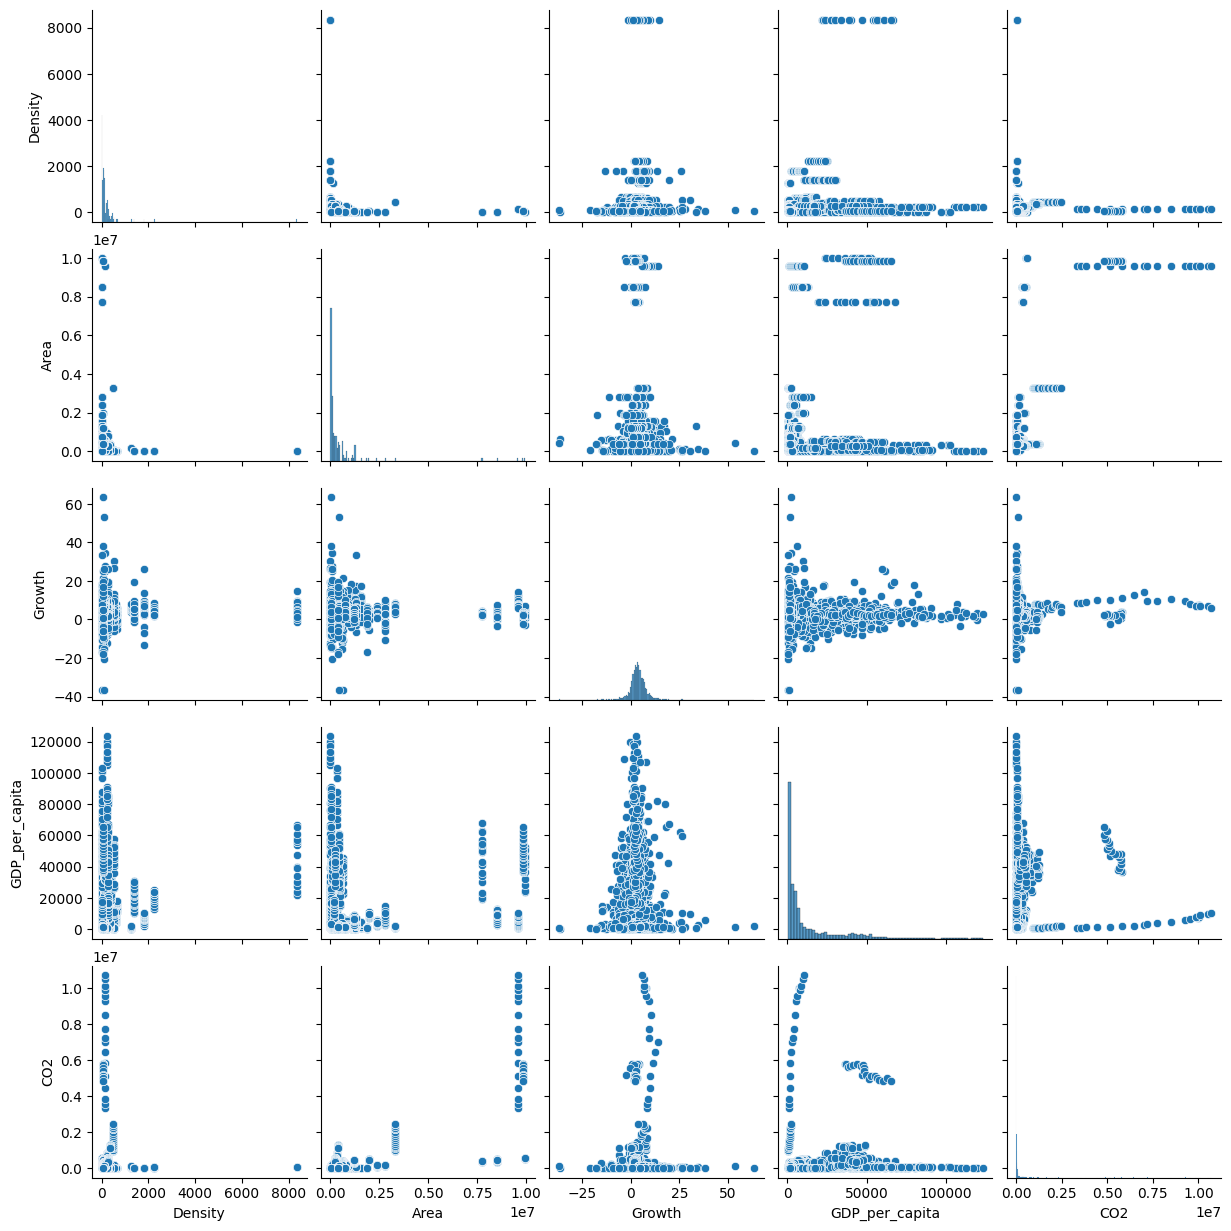

In [27]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Density',
    'Area',
    'Growth',
    'GDP_per_capita',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()

Interprétation : 

* Densité de population (Density) : Il n'y a pas de tendance claire indiquant une relation directe entre la densité de population et les autres variables. Il y a cependant quelques valeurs extrêmes, ce qui indique que certains pays ou régions ont des densités de population très élevées.

* Superficie (Area) : La superficie ne semble pas être directement liée à la croissance économique (Growth), au PIB par habitant (GDP_per_capita), ou aux émissions de CO2. Les données semblent être assez dispersées, ce qui suggère que la taille d'un pays n'est pas un facteur déterminant pour ces indicateurs.

* Croissance économique (Growth) : La croissance économique présente une variabilité importante parmi les pays, sans une relation évidente avec le PIB par habitant ou les émissions de CO2. 

* PIB par habitant (GDP_per_capita) : Le PIB par habitant montre un certain regroupement vers les valeurs inférieures, avec quelques valeurs extrêmes indiquant que certains pays ont un PIB par habitant beaucoup plus élevé. Il y a également une dispersion des points lorsque le PIB par habitant est comparé aux émissions de CO2, suggérant que la richesse d'un pays ne se traduit pas toujours par des émissions de CO2 proportionnellement plus élevées.

* Émissions de CO2 (CO2) : Les émissions de CO2 sont concentrées vers les valeurs inférieures avec quelques valeurs extrêmes, indiquant que quelques pays sont responsables d'une part disproportionnée des émissions globales de CO2. Il n'y a pas de relation claire et linéaire visible entre les émissions de CO2 et les autres variables dans ces scatter plots.

En conclusion, ces visualisations illustrent les relations entre les indicateurs démographiques, économiques et environnementaux. Les données suggèrent que des facteurs autres que la densité de population, la taille du pays, et la richesse économique influencent les émissions de CO2. Ces résultats peuvent servir de point de départ pour des analyses statistiques plus poussées et la modélisation prédictive.

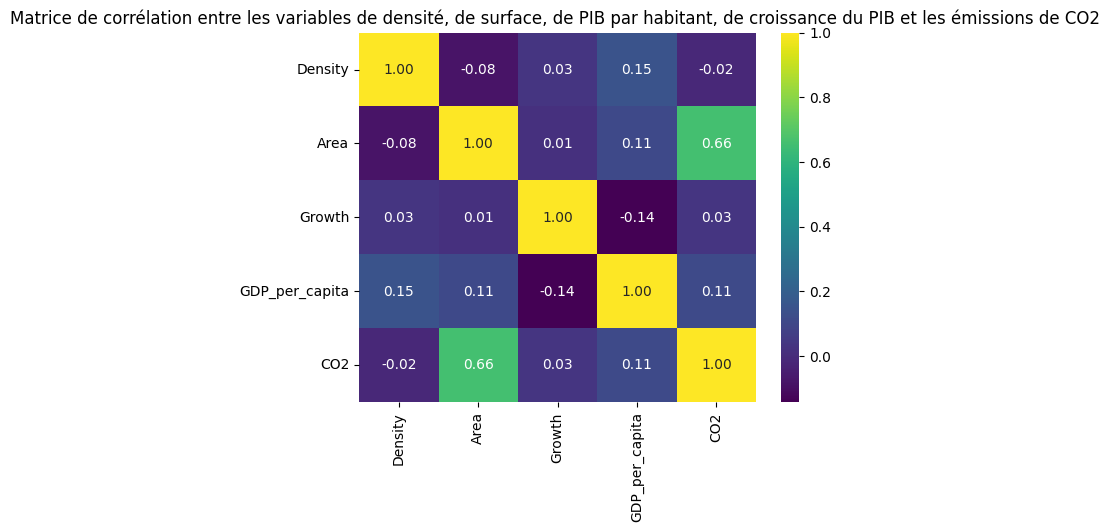

In [28]:
# Calculer le coefficient de corrélation entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables de densité, de surface, de PIB par habitant, de croissance du PIB et les émissions de CO2 ")
plt.show()

La matrice de corrélation indique les relations entre la densité de population, la superficie du pays, le PIB par habitant, la croissance du PIB et les émissions de CO2 :

* Densité vs. Superficie : Une corrélation négative (-0.15) suggère que les pays de plus grande superficie ont tendance à avoir une densité de population plus faible. Ce qui est cohérent.

* Densité vs. Émissions de CO2 : Une corrélation très faible (0.04) indique qu'il n'y a pas de lien direct entre la densité de la population et les émissions de CO2.

* Superficie vs. Émissions de CO2 : Une corrélation modérée (0.66) suggère que les pays avec de plus grandes superficies ont tendance à avoir des émissions de CO2 plus élevées, ce qui pourrait refléter une activité économique et industrielle plus importante ou une plus grande utilisation de véhicules et d'énergie.

* Croissance du PIB vs. PIB par habitant : Une corrélation négative (-0.14) montre qu'une croissance économique plus élevée n'est pas nécessairement associée à un PIB par habitant plus élevé, ce qui peut se produire dans les économies en développement.

* PIB par habitant vs. Émissions de CO2 : Une corrélation positive faible (0.11) indique que les pays plus riches pourraient avoir légèrement plus d'émissions de CO2, mais la relation n'est pas forte, ce qui implique que la richesse n'est pas un prédicteur direct des émissions de CO2.

* Superficie vs. PIB par habitant : Une corrélation positive faible (0.11) indique que les pays plus grands ont tendance à avoir un PIB par habitant légèrement plus élevé.

En résumé, cette matrice montre que si certaines variables ont une relation modérée, beaucoup n'ont qu'une faible ou pas de corrélation directe. Cela suggère que des facteurs supplémentaires pourraient influencer ces relations et confirme les observations précédentes.

## 1.4 - Analyse en Composantes Principales (ACP)

Dans cette partie, nous allons procéder à une Analyse en Composantes Principales (ACP). L'objectif de cette méthode est de synthétiser les variables du jeu de donbnées initial en un nombre limité de composantes principales, tout en conservant un maximun d'informations. Initialement, nous avons 18 variables après traitement, qui correspondent aux 18 caractéristiques. Nous allons étudier s'il est possible de réduire cette dimension, tout en conservant un maximum d'information.

### 1.4.1 - Reformatage des données

In [29]:
# Pour l'ACP, on ne garde que les variables quantitatives
data_quanti = data.iloc[:, 2:18].copy()
data_quanti.head()

Elec_access  Clean_access  Renewable_share  Fossil_elec  Nuclear_elec  \
3    14.738506          9.50            36.66         0.31           0.0   
4    20.064968         10.90            44.24         0.33           0.0   
5    25.390894         12.20            33.88         0.34           0.0   
6    30.718690         13.85            31.89         0.20           0.0   
7    36.051010         15.30            28.78         0.20           0.0   

   Renewable_elec  Low_carb_elec  Energy_per_capita  PEnergy_intensity  \
3            0.63      67.021280          229.96822               1.40   
4            0.56      62.921350          204.23125               1.20   
5            0.59      63.440857          252.06912               1.41   
6            0.64      76.190475          304.42090               1.50   
7            0.75      78.947370          354.27990               1.53   

           CO2     Growth  GDP_per_capita  Density      Area  Latitude  \
3  1220.000029   8.832278      190.683814     60.0  652230.0  33.93911   
4  1029.999971   1.414118      211.382074     60.0  652230.0  33.93911   
5  1549.999952  11.229715      242.031313     60.0  652230.0  33.93911   
6  1759.999990   5.357403      263.733602     60.0  652230.0  33.93911   
7  1769.999981  13.826320      359.693158     60.0  652230.0  33.93911   

   Longitude  
3  67.709953  
4  67.709953  
5  67.709953  
6  67.709953  
7  67.709953

L'ACP est sensible à la variabilité des données. Si les variables sont mesurées dans des unités différentes ou ont des variances différentes, celles avec une plus grande variance ou des unités plus grandes pourraient dominer les premières composantes principales. En centrant et réduisant, chaque variable contribue également à l'analyse sans être influencée par l'échelle de mesure. Nous décidons donc de centrer et réduire nos données avant de réaliser notre ACP.

In [30]:
# Initialisation du StandardScaler
scaler = StandardScaler()

# Centrer et réduire les données
data_quanti_scaled = scaler.fit_transform(data_quanti)

# Convertir de nouveau en DataFrame pour garder le format DataFrame
data_quanti_scaled = pd.DataFrame(data_quanti_scaled, columns=data_quanti.columns)

# Afficher les premières lignes pour vérifier
data_quanti_scaled.head()


Elec_access  Clean_access  Renewable_share  Fossil_elec  Nuclear_elec  \
0    -1.963065     -1.342539         0.028580    -0.204041     -0.194725   
1    -1.793997     -1.306853         0.281088    -0.203987     -0.194725   
2    -1.624946     -1.273717        -0.064029    -0.203961     -0.194725   
3    -1.455836     -1.231659        -0.130321    -0.204335     -0.194725   
4    -1.286582     -1.194699        -0.233923    -0.204335     -0.194725   

   Renewable_elec  Low_carb_elec  Energy_per_capita  PEnergy_intensity  \
0       -0.241340       0.795146          -0.697002          -1.123384   
1       -0.241990       0.676131          -0.697696          -1.179300   
2       -0.241712       0.691211          -0.696406          -1.120588   
3       -0.241247       1.061314          -0.694995          -1.095426   
4       -0.240225       1.141343          -0.693650          -1.087039   

        CO2    Growth  GDP_per_capita   Density      Area  Latitude  Longitude  
0 -0.204918  1.062898       -0.661410 -0.226635 -0.003482  0.633961   0.836135  
1 -0.205151 -0.534190       -0.660305 -0.226635 -0.003482  0.633961   0.836135  
2 -0.204515  1.579053       -0.658668 -0.226635 -0.003482  0.633961   0.836135  
3 -0.204258  0.314777       -0.657509 -0.226635 -0.003482  0.633961   0.836135  
4 -0.204246  2.138087       -0.652385 -0.226635 -0.003482  0.633961   0.836135

### 1.4.2 - Analyse en Composantes Principales (ACP)

In [31]:
pca = PCA(10)  # projection from 18 to 10 dimensions
projected = pca.fit_transform(data_quanti_scaled)

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x+1) for x in range(10)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            4.507058                  28.0                   28.0
1      Dim2            3.236081                  20.0                   48.0
2      Dim3            1.441173                   9.0                   57.0
3      Dim4            1.319614                   8.0                   66.0
4      Dim5            1.041972                   7.0                   72.0
5      Dim6            0.908189                   6.0                   78.0
6      Dim7            0.837415                   5.0                   83.0
7      Dim8            0.695814                   4.0                   87.0
8      Dim9            0.576517                   4.0                   91.0
9     Dim10            0.528380                   3.0                   94.0

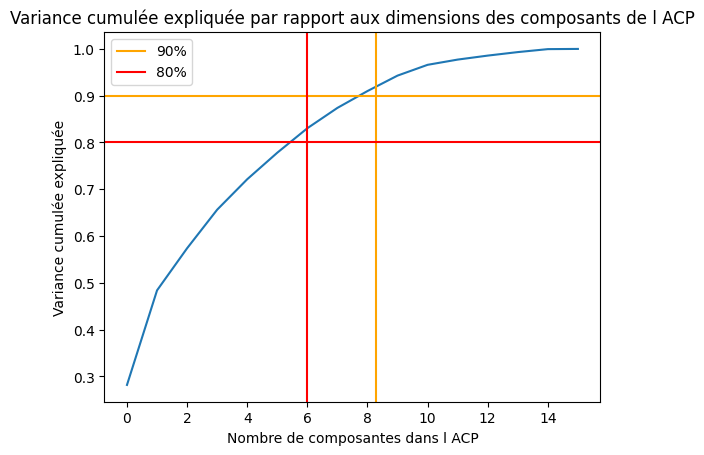

In [32]:
pca = PCA().fit(data_quanti_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.axvline(x=8.3,color='orange', label='90%')
plt.axhline(y=0.9,color='orange')

plt.axvline(x=6,color='red', label='80%')
plt.axhline(y=0.8,color='red')

plt.title('Variance cumulée expliquée par rapport aux dimensions des composants de l ACP')
plt.xlabel('Nombre de composantes dans l ACP')
plt.ylabel('Variance cumulée expliquée') 
plt.legend()
plt.show()

Interprétation :

* Dans un premier temps, le tableau nous présente la varianxce expliquée pour chaque dimension, ainsi que le pourcentage que cela représente. La dernière colonne nous donne les pourcentages de variances cumulées. En général, on peut se satisfaire de dimension représentant 80% de la variance cumulée. Ici, cela reviendrait à garder 7 composantes principales. Si on souhaite plus de précision, avec 90% de la variance cumulée, on peut alors garder 9 composantes principales. Cependant, on observe que les 2 premières composantes portent beaucoup d'information (48% de la variance cumulée), cela montre que ces 2 composantes portent à elles-seules la moitié de information.

* Le graphique nous permet de vérifier ces observations. On remarque qu'à partir d'un certain seuil (environ 90%), il faut rajouter beaucoup de composantes dans l'ACP pour gagner de l'information sur la variance cumulée.

On décide dans un premier temps de conserver les 7 premières composantes principales, pour suivre les recommendations du cours.

### 1.4.3 - Etude des composantes principales

Nous allons construire un nouveau dataframe avec les 7 premiers composantes de l'ACP. Comme présenté ci-dessus, cela nous permeter d'expliquer 80% de la variance.

In [33]:
# Transformation en DataFrame des résultats de l'ACP
data_pca = pd.DataFrame({
    "Dim1" : projected[:,0], 
    "Dim2" : projected[:,1],
    "Dim3" : projected[:,2],
    "Dim4" : projected[:,3],
    "Dim5" : projected[:,4],
    "Dim6" : projected[:,5],
    "Dim7" : projected[:,6],
   
})

# Résultat (premières lignes)
data_pca.head()

Dim1      Dim2      Dim3      Dim4      Dim5      Dim6      Dim7
0 -1.674838  1.041583  0.348928 -0.035604 -0.144750  1.753036 -0.472937
1 -1.594912  0.909138 -0.270650  0.043042  0.604664  0.939527 -1.374460
2 -1.530935  0.914397  0.520290 -0.194424 -0.464908  2.010033 -0.171900
3 -1.410927  0.787687 -0.083569  0.076535  0.126966  1.481013 -0.817930
4 -1.406894  0.843197  0.558475 -0.041392 -0.746621  2.472079  0.230935

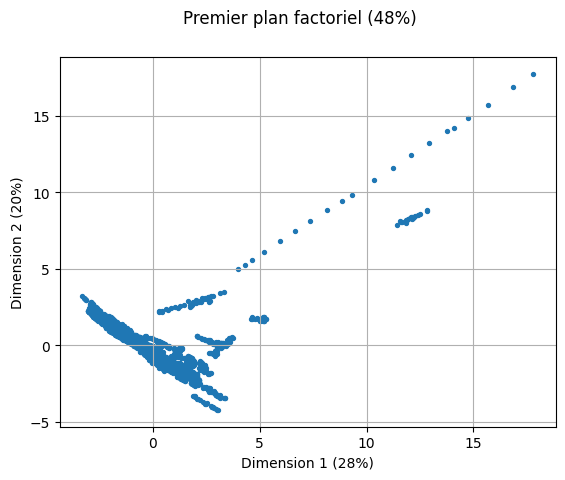

In [34]:
# Affichage de la répartition des données en fonction des 2 premières dimensions

data_pca.plot.scatter("Dim1", "Dim2",s=8) # nuage de points
plt.xlabel("Dimension 1 (28%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (20%)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (48%)") # titre général
plt.grid()
plt.show()

Interprétation : 

* Axes : L'axe horizontal (Dim 1) représente la première composante principale, et l'axe vertical (Dim 2) représente la deuxième composante principale. Ces deux axes rerésentent la plus grande partie de la variance dans nos données, avec 28% pour la Dimension 1 et 20% pour la Dimension 2, cumulant à 48% de la variance totale.

* Dispersion des points : Chaque point représente une observation dans l'espace des composantes principales. La dispersion des points montre la distribution des observations en fonction de ces deux principales dimensions de variance.

Interprétation des composantes :

* La dimension 1 semble capturer une variance significative, comme indiqué par le pourcentage (33%). Si cette composante est fortement corrélée avec certaines variables, cela indiquerait que ces variables sont des facteurs significatifs de variation dans nos données.

* La dimension 2 capture moins de variance (18%) mais peut représenter un autre aspect des données qui est orthogonale (donc indépendante) à la dimension 1.

Regroupements et tendances : Les groupes de points qui apparaissent sur le graphique peuvent indiquer des similitudes entre les observations. Par exemple, le grand groupe de points en bas à gauche pourrait représenter des observations avec des caractéristiques communes qui les distinguent des observations représentées par les points dispersés le long de la dimension 1.

Outliers : Des points éloignés des autres peuvent être des outliers qui ont des propriétés très différentes des observations typiques ou qui pourraient être des erreurs de mesure ou de saisie, ou encore des valeurs incohérentes avec les autres.

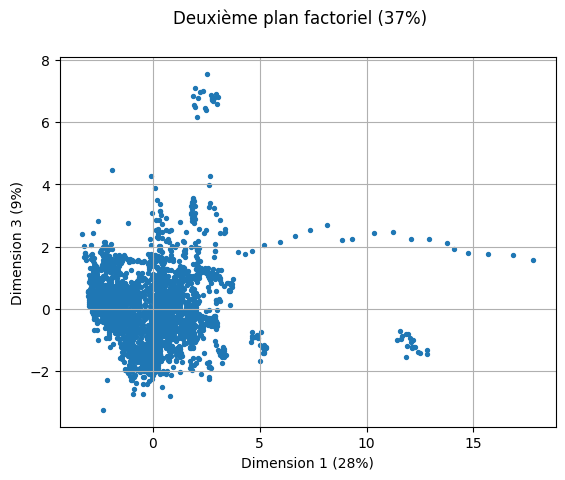

In [35]:
# Affichage de la répartition des données en fonction de Dim 1 et Dim 3

data_pca.plot.scatter("Dim1", "Dim3", s=8) # nuage de points
plt.xlabel("Dimension 1 (28%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (9%)") # idem pour axe Y
plt.suptitle("Deuxième plan factoriel (37%)") # titre général
plt.grid()
plt.show()

Dans la continuité du raisonnement conduit sur le premier plan factoriel, nous allons analyser celui entre la première dimension et la troisème dimension de l'ACP.

* Dispersion : La dispersion des points indique la variation des observations selon ces deux dimensions de l'ACP. La plupart des observations sont concentrées vers le centre du graphique, suggérant que pour ces deux composantes, beaucoup d'observations ont des scores similaires.

* Patterns et groupes : Bien que les points soient largement dispersés, il n'y a pas de groupes distincts visibles dans cette vue. Cependant, on remarque un ensemble de points qui s'étendent le long de la dimension 1, indiquant une caractéristique qui varie de manière significative parmi ces observations.

* Outliers : Il y a quelques points qui se détachent loin du centre, en particulier le long de la dimension 1. Ces observations peuvent être très différentes du reste des données.

* Cumul de variance : Les deux dimensions affichées représentent ensemble 36% de la variance totale des données. Cela signifie que bien que ces deux composantes apportent des informations significatives sur les données, il reste encore beaucoup de variance à expliquer par d'autres composantes ou dimensions.

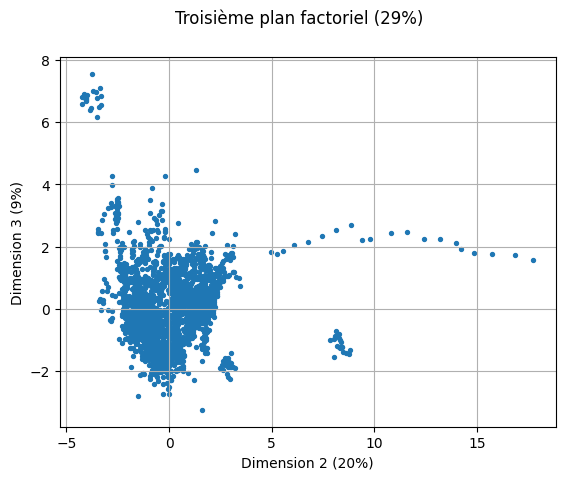

In [36]:
# Affichage de la répartition des données en fonction de Dim 2 et Dim 3

data_pca.plot.scatter("Dim2", "Dim3",s=8) # nuage de points
plt.xlabel("Dimension 2 (20%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (9%)") # idem pour axe Y
plt.suptitle("Troisième plan factoriel (29%)") # titre général
plt.grid()
plt.show()

Interprétation :

* Dispersion des points: La majorité des observations sont groupées autour du centre du graphique, mais il existe également un nombre significatif de points qui s'étendent loin du centre le long de la deuxième composante principale. Cela suggère qu'il y a une variable ou un ensemble de variables qui contribuent significativement à la variance dans la deuxième dimension.

* Distribution: Il y a une concentration de données autour de l'origine et une queue qui s'étend vers la droite le long de la deuxième dimension. Cela peut indiquer une distribution asymétrique des données pour les variables qui chargent fortement sur cette composante.

* Potentiels outliers: Des points éloignés des autres peuvent être identifiés comme des outliers. Ces observations pourraient représenter des cas extrêmes ou des situations particulières qui se démarquent du reste de l'ensemble des données.

### 1.4.4 - Etude des chargements 

Pour déterminer quelles variables contribuent le plus à chaque composante principale dans une Analyse en Composantes Principales (ACP), nous pouvons examiner les "chargements" des composantes. Les chargements sont des coefficients qui indiquent comment chaque variable est représentée sur chacune des composantes principales. 

In [37]:
# Les chargements sont dans pca.components_
pca = PCA(7).fit(data_quanti_scaled)
loadings = pca.components_.T  # Transposée pour aligner avec les variables originales

# Créer un DataFrame pour une meilleure lisibilité
loadings_df = pd.DataFrame(loadings, index=data_quanti_scaled.columns, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7'])

# Afficher les chargements pour les 7 premières composantes
loadings_df

Dim1      Dim2      Dim3      Dim4      Dim5      Dim6  \
Elec_access        0.321698 -0.301490 -0.142321 -0.105792 -0.139283  0.094532   
Clean_access       0.330341 -0.323303 -0.116380  0.000299 -0.095605  0.014480   
Renewable_share   -0.307658  0.298239 -0.012133  0.329152  0.135596  0.070232   
Fossil_elec        0.331328  0.355444  0.061879 -0.116163  0.001937  0.006409   
Nuclear_elec       0.286933  0.217655 -0.093350  0.098842  0.090347 -0.026052   
Renewable_elec     0.318827  0.339641 -0.022620 -0.005339  0.032840  0.065226   
Low_carb_elec     -0.081432  0.137022 -0.289363  0.589402  0.145331  0.372936   
Energy_per_capita  0.274351 -0.230154  0.285856  0.342682  0.121468 -0.197999   
PEnergy_intensity -0.060368  0.132005  0.342921  0.368716 -0.386737 -0.615760   
CO2                0.327135  0.361533  0.063745 -0.114615 -0.017291  0.013527   
Growth            -0.049158  0.075884  0.377821 -0.065086 -0.461880  0.524712   
GDP_per_capita     0.284128 -0.212470  0.041250  0.395348  0.221560  0.119518   
Density            0.057298 -0.131626  0.456854 -0.132869  0.591433  0.006388   
Area               0.260938  0.323715 -0.032452 -0.007023  0.033736 -0.069224   
Latitude           0.225902 -0.181542 -0.011545  0.249127 -0.379763  0.147033   
Longitude         -0.029375  0.026614  0.558161  0.054389  0.022730  0.327506   

                       Dim7  
Elec_access        0.064228  
Clean_access       0.067346  
Renewable_share    0.019202  
Fossil_elec       -0.086001  
Nuclear_elec      -0.017173  
Renewable_elec     0.024695  
Low_carb_elec      0.136090  
Energy_per_capita  0.188783  
PEnergy_intensity  0.085917  
CO2               -0.074899  
Growth             0.562568  
GDP_per_capita    -0.025731  
Density            0.280696  
Area               0.168137  
Latitude          -0.292922  
Longitude         -0.636797

Le tableau des chargements illustre la façon dont chaque variable contribue à chacune des sept premières dimensions de l'ACP. 

* La première dimension semble être influencée positivement par Elec_access, Clean_access, Fossil_elec, Nuclear_elec, Renewable_elec, et les émissions de CO2, ce qui suggère que cette dimension capture un mélange de l'accès à l'électricité, la consommation d'énergie à partir de différentes sources et les émissions associées. Cette dimension représente probablement la consommation énergétique du pays : une composante élevée correspondrait à une forte production et consommation énergétique.

* La dimension 2 montre une forte contribution positive de Fossil_elec et Renewable_elec, indiquant que cette dimension peut représenter l'équilibre entre les sources d'énergie renouvelables et fossiles dans la production d'électricité des pays. Cette dimension est influencée négativement par la variable Elec_access. On peut supposer que la deuxième dimension présente la différence entre les capacités de production d'un mix énergétique et l'accès à l'électricité pour la population.

* La troisième composante principale est fortement influencée par Low_carb_elec et Energy_per_capita, ce qui pourrait indiquer que cette dimension reflète des aspects de la consommation d'énergie à faible teneur en carbone et par habitant.

* Dimension 4 : Les variables Low_carb_elec et Energy_per_capita ont des chargements relativement élevés mais de signes opposés, ce qui pourrait signifier que cette composante distingue les pays avec une consommation d'énergie par personne élevée mais ayant une faible part d'énergie à faible teneur en carbone, des pays avec une situation inverse. 

* Dimension 5 : On observe une forte charge négative importante pour la densité et le PIB par habitant. Cette dimension pourrait capturer la densité d'un pays : un petit pays avec une orte densité aurait une valeur élevée sur cette dimension. 

* Dimension 6 : Growth et GDP_per_capita présentent des chargements positifs significatifs, ce qui suggère que cette dimension peut refléter le niveau de développement économique et la croissance. Cela peut indiquer que les pays avec une croissance économique forte et un PIB par habitant élevé se distinguent des autres sur cette dimension. De plus, la variable PEnergy_intensity est assez négative, ce qui est cohérent avec l'analyse. 

* Dimension 7 : Longitude a un chargement négatif considérable, ce qui peut indiquer que cette composante reflète des différences géographiques ou régionales dans les données. Cela pourrait être lié à la position longitudinale des pays et à des facteurs environnementaux ou économiques qui varient d'est en ouest.

Les composantes avec des contributions élevées de Elec_access, Clean_access, et Energy_per_capita pourraient être interprétées comme des indicateurs de développement et de consommation d'énergie. Les composantes où Fossil_elec, Nuclear_elec, et Renewable_elec chargent fortement pourraient refléter la stratégie énergétique et la mixité des sources d'énergie des pays. Les dimensions où les émissions de CO2 ont des chargements élevés sont probablement liées à l'impact environnemental et pourraient être interprétées dans le contexte des objectifs de durabilité et de réduction des émissions.

Ces interprétations sont mises en avant de ma nière plus visuelle avec la matrice ci-dessous.

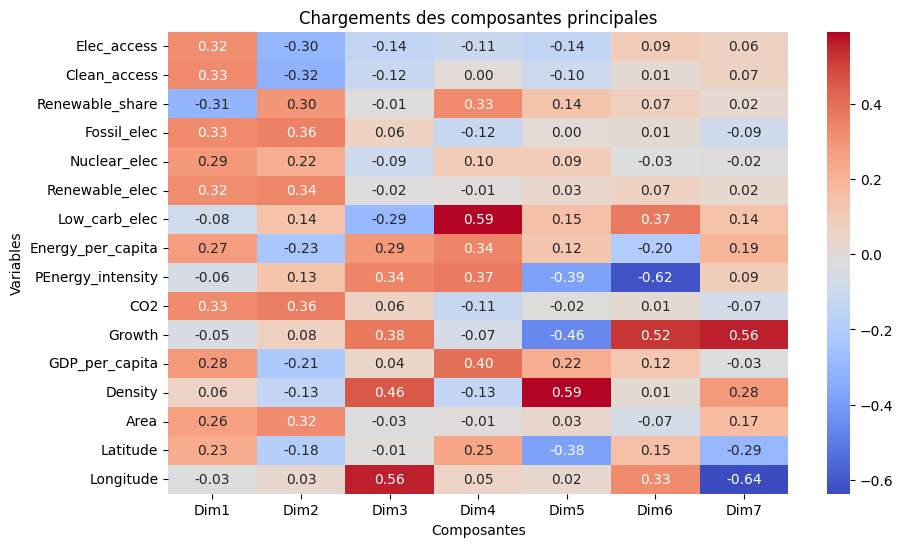

In [38]:
# Représentation du tableau sous forme de matrice
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Chargements des composantes principales')
plt.xlabel('Composantes')
plt.ylabel('Variables')
plt.show()

## 1.5 - Dépendance de la variable Year et de la variable présentant les émissions de CO2

In [39]:
data_ = data.iloc[:, :-4].copy()
data_.head()

Entity  Year  Elec_access  Clean_access  Renewable_share  Fossil_elec  \
3  Afghanistan  2003    14.738506          9.50            36.66         0.31   
4  Afghanistan  2004    20.064968         10.90            44.24         0.33   
5  Afghanistan  2005    25.390894         12.20            33.88         0.34   
6  Afghanistan  2006    30.718690         13.85            31.89         0.20   
7  Afghanistan  2007    36.051010         15.30            28.78         0.20   

   Nuclear_elec  Renewable_elec  Low_carb_elec  Energy_per_capita  \
3           0.0            0.63      67.021280          229.96822   
4           0.0            0.56      62.921350          204.23125   
5           0.0            0.59      63.440857          252.06912   
6           0.0            0.64      76.190475          304.42090   
7           0.0            0.75      78.947370          354.27990   

   PEnergy_intensity          CO2     Growth  GDP_per_capita  Density  \
3               1.40  1220.000029   8.832278      190.683814     60.0   
4               1.20  1029.999971   1.414118      211.382074     60.0   
5               1.41  1549.999952  11.229715      242.031313     60.0   
6               1.50  1759.999990   5.357403      263.733602     60.0   
7               1.53  1769.999981  13.826320      359.693158     60.0   

       Area  Latitude  Longitude  
3  652230.0  33.93911  67.709953  
4  652230.0  33.93911  67.709953  
5  652230.0  33.93911  67.709953  
6  652230.0  33.93911  67.709953  
7  652230.0  33.93911  67.709953

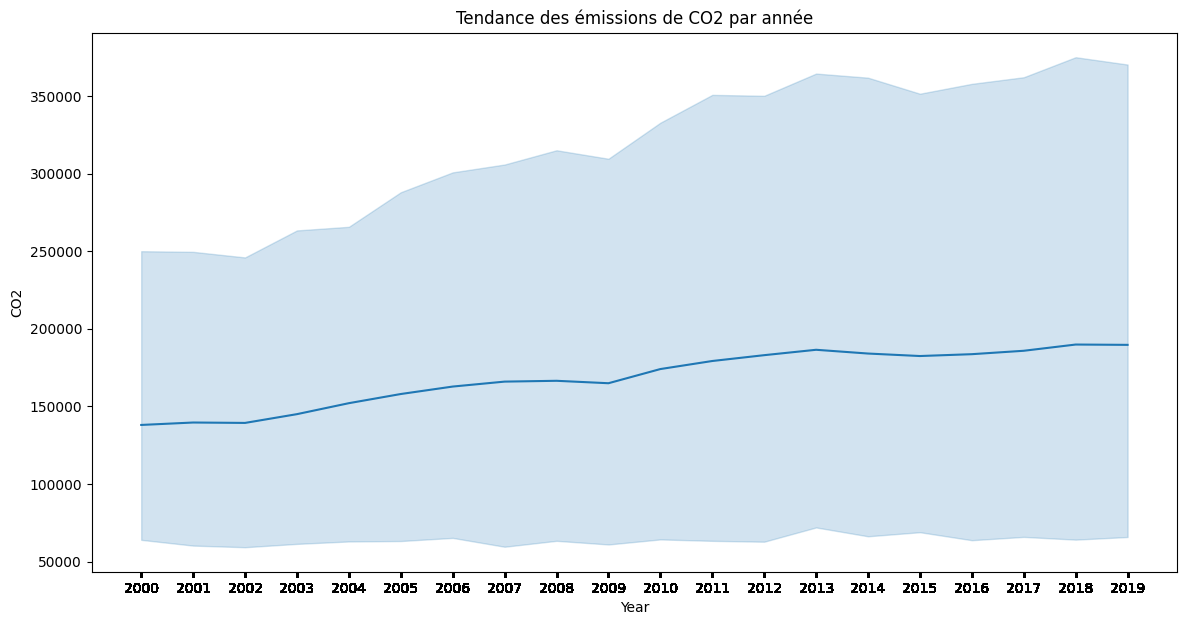

In [40]:
# Graphique de série temporelle
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_, x='Year', y='CO2')
plt.title('Tendance des émissions de CO2 par année')
plt.xticks(data_['Year'].astype(int))
plt.show()

Interprétation : 

* Tendance générale : La ligne représente la tendance moyenne des émissions de CO2 sur la période donnée. On observe que les émissions de CO2 ont globalement augmenté au fil du temps depuis l'an 2000 jusqu'à environ 2010. Après 2010, la tendance semble plus stable avec une légère augmentation ou stabilisation des émissions.

* Variation annuelle : La zone ombrée qui s'étend au-dessus et en dessous de la ligne de tendance indique la variation des émissions de CO2 au sein de chaque année. La largeur de cette zone peut signifier l'écart-type, indiquant la variabilité des émissions de CO2 d'une année à l'autre. Une zone large suggère une grande variabilité, tandis qu'une zone étroite indique une plus grande constance dans les émissions au cours de l'année. On remarque que la largeur de cette zone augmente au fur et à mesure du temps. 

* Pointes et chutes : Certaines années montrent des pointes ou des chutes dans les émissions, comme la pointe autour de 2010. Ces fluctuations pourraient être dues à des événements spécifiques ou à des changements dans les politiques environnementales, les pratiques économiques ou les technologies énergétiques.

* Analyse contextuelle : Pour comprendre pleinement ce graphique, il est important de le mettre en contexte avec d'autres données et événements. Par exemple, des augmentations dans les émissions de CO2 pourraient coïncider avec la croissance économique, tandis que des stabilisations ou des réductions pourraient refléter des améliorations dans l'efficacité énergétique ou l'adoption d'énergies renouvelables.

En résumé, ce graphique indique que, bien que les émissions de CO2 ont augmenté jusqu'à 2010, il y a eu une tendance vers la stabilisation ou une augmentation plus modérée dans les années suivantes. Cela pourrait être interprété comme un signe positif dans le contexte des efforts mondiaux de réduction des émissions.

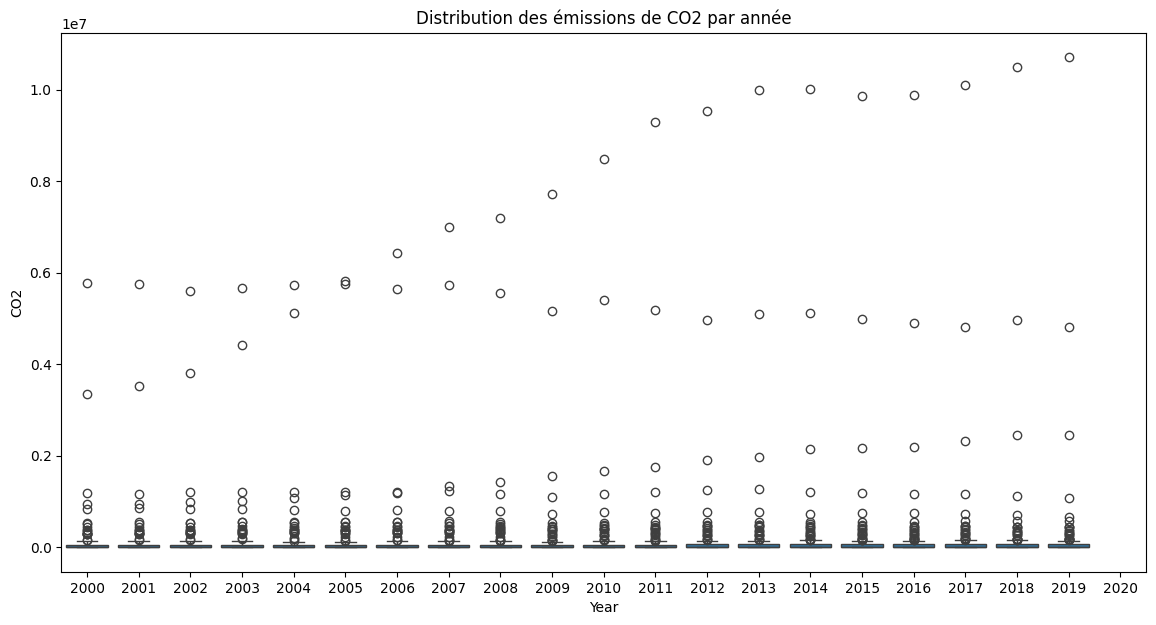

In [41]:
# Boxplot des émissions de CO2 par année
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_, x='Year', y='CO2')
plt.title('Distribution des émissions de CO2 par année')
plt.show()

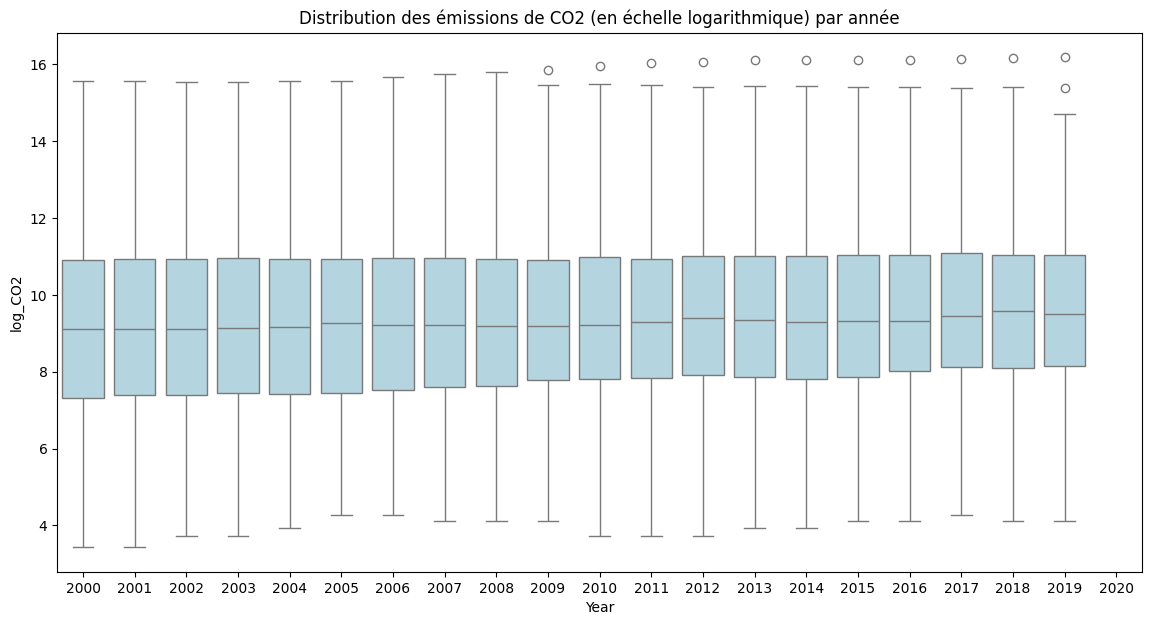

In [42]:
# Boxplot des émissions de CO2 par année
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Year', y='log_CO2',color='lightblue')
plt.title('Distribution des émissions de CO2 (en échelle logarithmique) par année')
plt.show()

Le premier graphique est très difficile à interpréteer. Cela s'explique par les émissions importantes des pays les plus polluants qui sont visibles sous forme "d'ouliers" et applatissent les boxplots. Les répartitions sont trop désiquilibrées. Nous avons pu observer une tendance Gaussienne de la variable CO2 après transformation logarithmique. Le deuxième graphique représente des boxplots des émissions de CO2 en échelle logarithmique au cours du temps. 

Sur ce deuxième graphique, nous avons décidé de transformer la variable CO2 avec une transformation logarithimique comme vu précédemment. L'utilisation de l'échelle logarithmique est justifiée par le fait que les émissions de CO2 ont une large gamme de valeurs. Ainsi, le logarithme aide à mieux visualiser les différences, surtout lorsque les données s'étendent sur plusieurs ordres de grandeur, comme c'est le cas sur le premier graphique.

* Médiane et quartiles : Chaque boîte représente la distribution des émissions de CO2 pour une année donnée, où la ligne centrale de la boîte indique la médiane des émissions de CO2. Les bords de la boîte représentent le premier et le troisième quartile, montrant la répartition centrale des données.

* Variabilité : Les moustaches des box s'étendent depuis le haut et le bas de chaque boîte jusqu'aux valeurs maximales et minimales dans l'intervalle interquartile (souvent jusqu'au dernier point situé à moins de 1,5 fois l'écart interquartile du bord de la boîte), montrant la variabilité totale des émissions de CO2 pour chaque année.

* Outliers : Les points au-dessus des moustaches sont considérés comme des outliers. Ces points représentent des années où les émissions de CO2 étaient exceptionnellement élevées par rapport aux autres années.

* Tendance temporelle : En comparant les boîtes d'une année à l'autre, on ne note pas de changement significatif dans la médiane sur le long terme, ce qui suggérerait que la médiane des émissions de CO2 (sur l'échelle logarithmique) est restée relativement constante au cours de cette période.

* Inégalité dans les émissions : L'ampleur des moustaches et la présence de outliers soulignent l'inégalité dans les émissions de CO2 entre différents pays. Certaines années ont des émissions particulièrement élevées qui se détachent des tendances générales.


## 1.6 - Conclusion sur la partie exploratoire des données

Finalement, cette analyse exploratoire de notre jeu de données nous a permis de visualiser les différences considérables d'échelles et de gaussianité entre nos données. Tout d'abord, nous avons vu que notre jeu de données comporte beaucoup de valeurs manuantes. Dans un premier temps, nous avons décidé de supprimer les colonnes comportant trop de valeurs manquantes, puis les dernières lignes en comportant. De plus, nous avons constaté des fortes différences d'échelles entre nos données. En effet, des poucentages d'accès à l'électricité ne sont pas du même odre de grandeur que des valeurs d'émissions de CO2. Nous avons vu que certaines données ne suivaient pas une tendance gaussienne, mais cet aspect était amélioré avec des transformation comme une transformtion logarithmique. Dans une future partie de modélisation, il sera intéressant de rendre nos données les plus gaussiennes possibles pour améliorer la qualité de notre modèle. 

Aussi, nous avons vu des fortes disparités entre les pays sur les émissions de CO2 : quelques pays avaient leurs émissions arrondies à 0, alors que d'autres avaient des émissions très importantes. Le classement des pays les plus émetteurs dépend aussi de la superficie des pays et des émissions par habitant. 

Notre étude multi-dimensionnelle nous a permis de montrer que les émissions de CO2 sont fortement influencées par le répartition du mix énergétique d'un pays : les énergies fossiles influencent énormément les émissions de CO2, alors que l'utilisation d'énergie nucléaire a un impact assez neutre. Sur cette étude, l'utilisation d'énergie renouvlable n'améliorait pas la situation si le pays était dépendant des énergies fossiles. D'autres vaiables comme la densité, la superficie ou les coordonnées géographiques ont un impact neutre sur les émissions de CO2. Avec cette étude, nous pourrions envisager l'utilisation d'un modèle de régression linéaire en utilisant uniquement la variable 'Fossil_elec' pour prédire les valeurs des émissions de CO2.

Puis, en réalisant une Analyse en Composantes Principales, nous avons pu passer de 18 à 7 dimensions sur notre jeu de données et émettre des hypothèses sur les significations des composantes principales avec l'étude des chargements des composantes. 

Pour finir, nous avons observé l'évolution des émissions de CO2 en fonction des années. L'hétérogénéité des émissions est d'autant plus marquée avec la présence d'outliers sur les boxplots. Une transformation des émissions de CO2 en échelle logarithmique nous a permis de mieux visualiser la médiane et les quantiles qui avaient des évolutions plus constantes, indépendamment de l'évolution importante de la valeur des outliers.

# 2 - Modélisation

Nous considérons maintenant le problème de la prédiction la variable `CO2` à partir des autres
variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances
du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles
qui les atteignent.

## 2.1 - Transformation des données

### 2.1.1 - Visualisation avant transformation

Comme étudié et expliué dans la première partie, nous avons vu que beaucoup de données de notre dataframe ne suivaient pas forcément de tendance gaussienne. Cependant, dans l'objectif d'un modèle plus performant, il est important d'appliquer ds transformations sur nos données. Nous allons créer un nouveau dataframe contenant les mêmes colonnes que notre jeu de données initial avec les transformations appliquées. Ici, les données n'ont pas beosin d'être normalisées car les modèles qui ne sont pas invariants par normalisation, tel que la régression avec régularisation par Ridge, ont des librairies normalisant déjà les données.

In [43]:
df = data.iloc[:, 0:18].copy() # Création du nouveau dataframe qui sera transformé

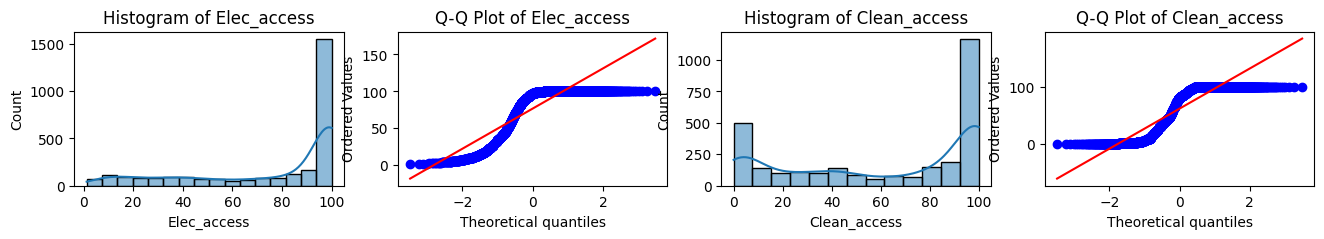

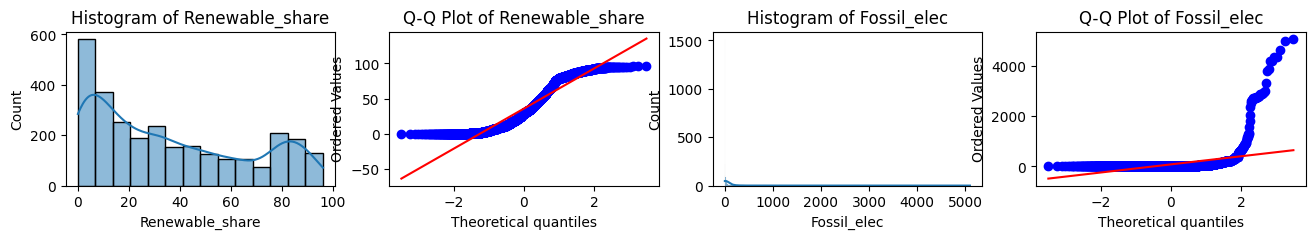

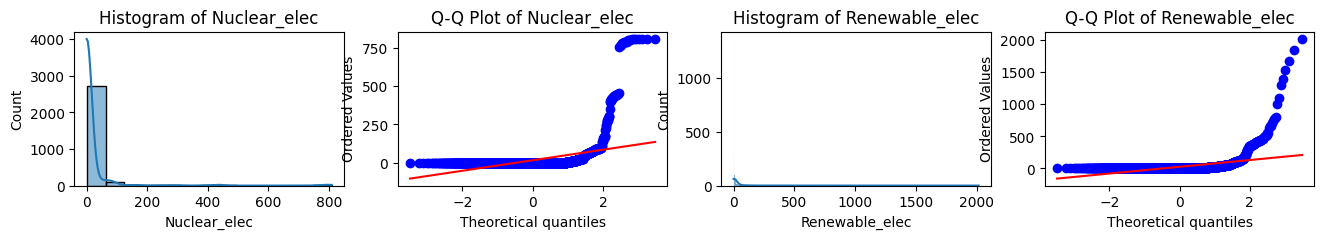

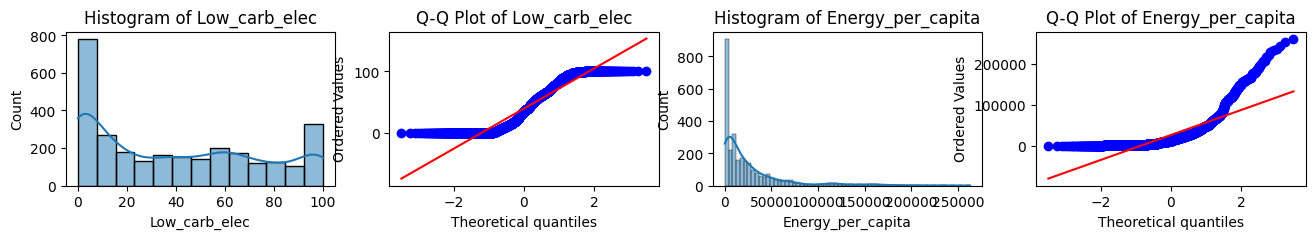

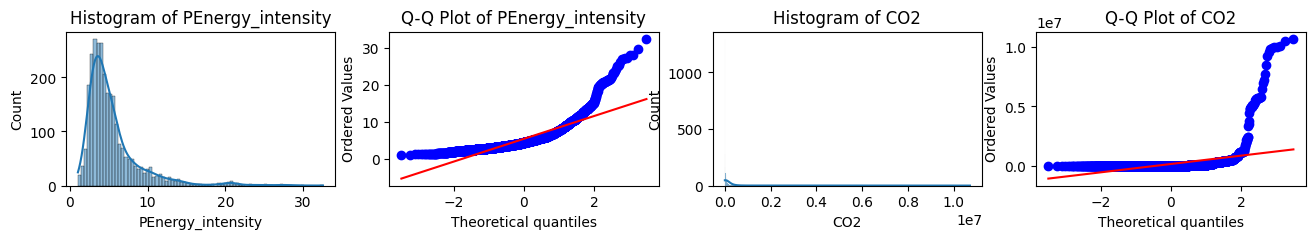

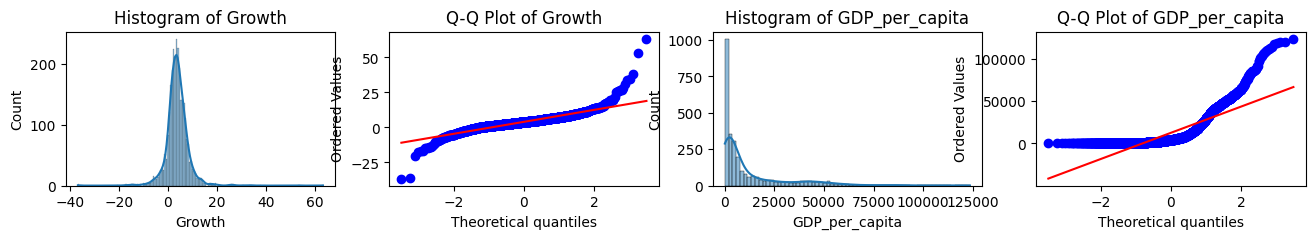

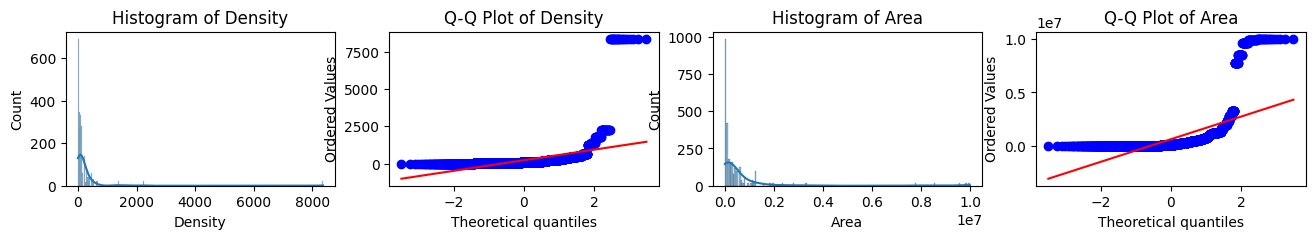

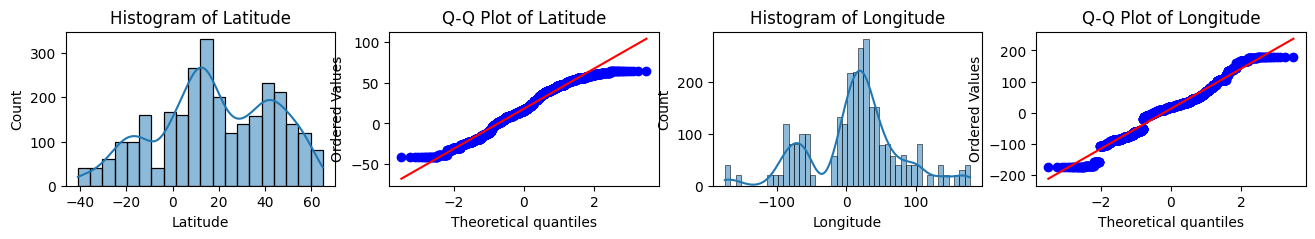

In [44]:
# Histogrammes et Q-Q plots pour visualiser les distributions
a=1

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    
    if a==1:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 2))
    
        # Histogramme
        sns.histplot(df[column], kde=True, ax=ax1)
        ax1.set_title(f'Histogram of {column}')
    
        # Q-Q plot
        stats.probplot(df[column], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of {column}')
    else:
        # Histogramme
        sns.histplot(df[column], kde=True, ax=ax3)
        ax3.set_title(f'Histogram of {column}')
    
        # Q-Q plot
        stats.probplot(df[column], dist="norm", plot=ax4)
        ax4.set_title(f'Q-Q Plot of {column}')
        
        plt.show()
        a=0
    a+=1

Nous observons que la plupart de nos données ne sont pas gaussiennes. Il faut donc appliquer les transofrmations appropriées sur les données qui le nécessitent afin de les transformer. Pour les trois premières variables (Elec_acces, Clean_access, Renewable_share), le QQ-plot de nos données est assez spécifique et ne voit pas sa tendance modifiée par les transformations élémentaires (logarithmique, racine carrée, ou autre). Nous décidons dans un premier temps de laisser ces données sans transformation. 



### 2.1.2 - Transformation et visualisation

In [45]:
df['Fossil_elec'] = np.log(df['Fossil_elec']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Fossil_elec' : 'log_Fossil_elec'}, inplace = True)

df['Nuclear_elec'] = np.log(df['Nuclear_elec']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Nuclear_elec' : 'log_Nuclear_elec'}, inplace = True)

df['Renewable_elec'] = np.log(df['Renewable_elec']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Renewable_elec' : 'log_Renewable_elec'}, inplace = True)

df['Low_carb_elec'] = np.log(df['Low_carb_elec']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Low_carb_elec' : 'sqrt_Low_carb_elec'}, inplace = True)

df['Energy_per_capita'] = np.log(df['Energy_per_capita']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Energy_per_capita' : 'log_Energy_per_capita'}, inplace = True)

df['CO2'] = np.log(df['CO2']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'CO2' : 'log_CO2'}, inplace = True)

df['PEnergy_intensity'] = np.log(df['PEnergy_intensity']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'PEnergy_intensity' : 'log_PEnergy_intensity'}, inplace = True)

df['GDP_per_capita'] = np.log(df['GDP_per_capita']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'GDP_per_capita' : 'log_GDP_per_capita'}, inplace = True)

df['Density'] = np.log(df['Density']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Density' : 'log_Density'}, inplace = True)

df['Area'] = np.log(df['Area']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Area' : 'log_Area'}, inplace = True)

print(df.shape)
df.head()

(2868, 18)


Entity  Year  Elec_access  Clean_access  Renewable_share  \
3  Afghanistan  2003    14.738506          9.50            36.66   
4  Afghanistan  2004    20.064968         10.90            44.24   
5  Afghanistan  2005    25.390894         12.20            33.88   
6  Afghanistan  2006    30.718690         13.85            31.89   
7  Afghanistan  2007    36.051010         15.30            28.78   

   log_Fossil_elec  log_Nuclear_elec  log_Renewable_elec  sqrt_Low_carb_elec  \
3         0.270027               0.0            0.488580            4.219821   
4         0.285179               0.0            0.444686            4.157653   
5         0.292670               0.0            0.463734            4.165748   
6         0.182322               0.0            0.494696            4.346276   
7         0.182322               0.0            0.559616            4.381369   

   log_Energy_per_capita  log_PEnergy_intensity   log_CO2     Growth  \
3               5.442280               0.875469  7.107425   8.832278   
4               5.324137               0.788457  6.938284   1.414118   
5               5.533663               0.879627  7.346655  11.229715   
6               5.721691               0.916291  7.473637   5.357403   
7               5.872906               0.928219  7.479300  13.826320   

   log_GDP_per_capita  log_Density   log_Area  Latitude  Longitude  
3            5.255847     4.110874  13.388154  33.93911  67.709953  
4            5.358387     4.110874  13.388154  33.93911  67.709953  
5            5.493190     4.110874  13.388154  33.93911  67.709953  
6            5.578724     4.110874  13.388154  33.93911  67.709953  
7            5.888028     4.110874  13.388154  33.93911  67.709953

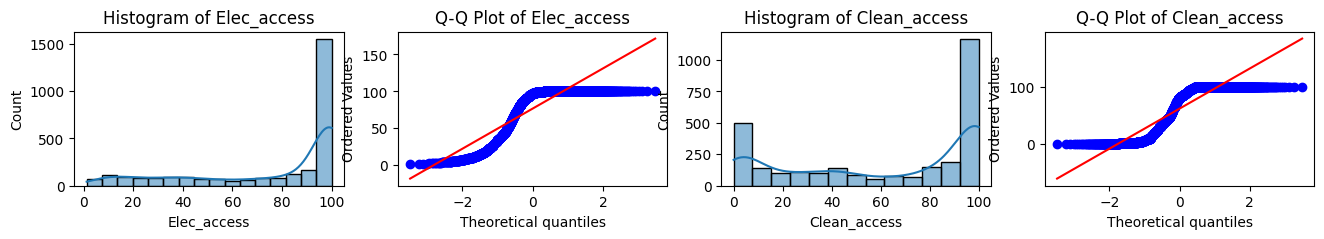

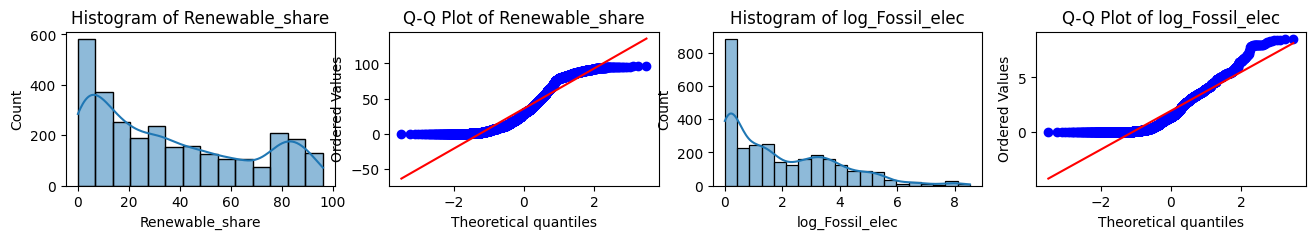

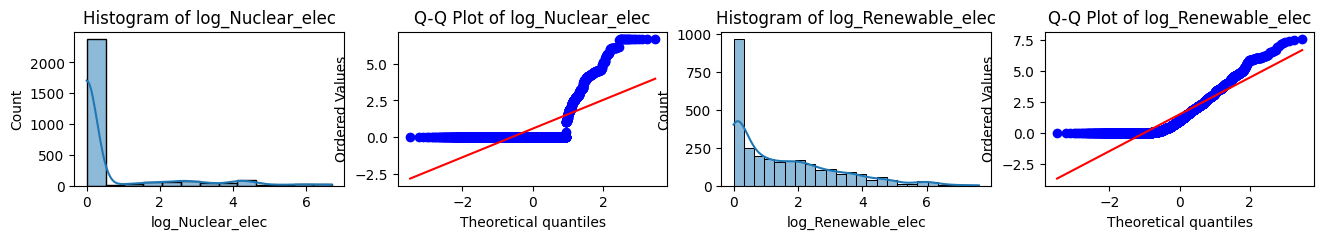

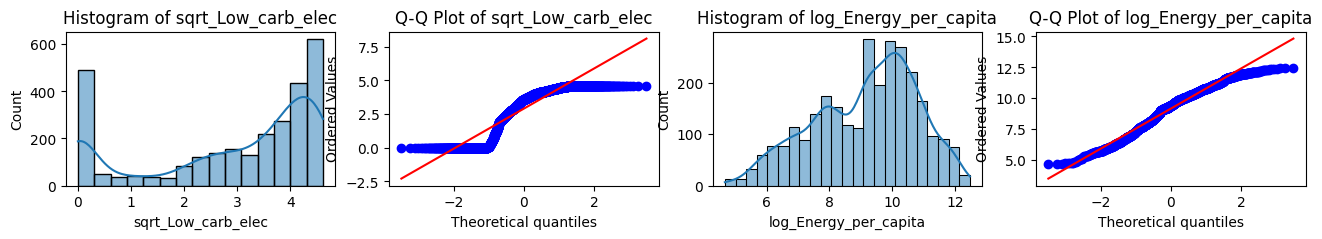

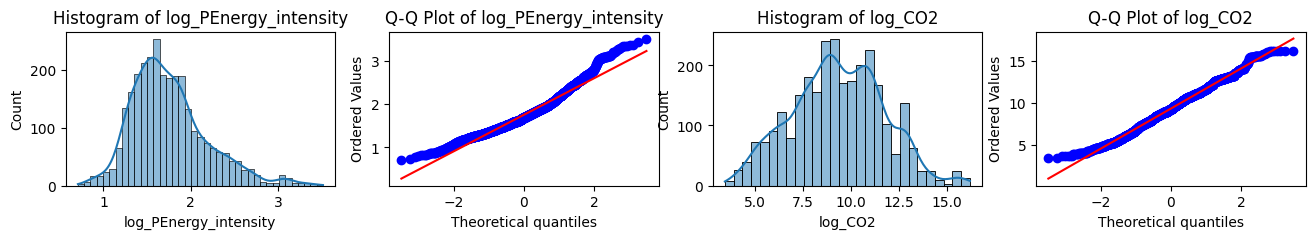

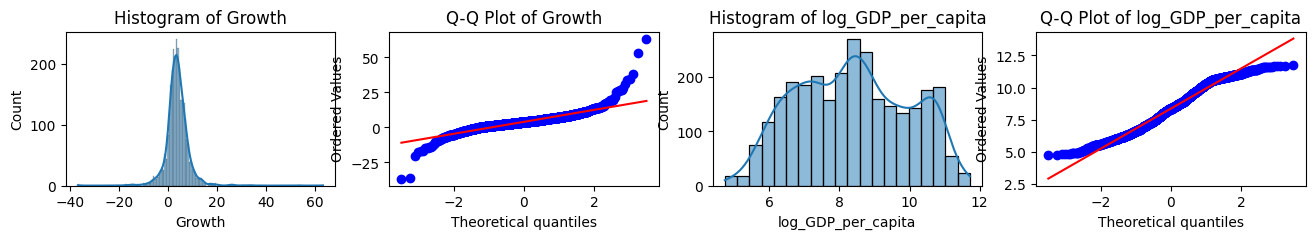

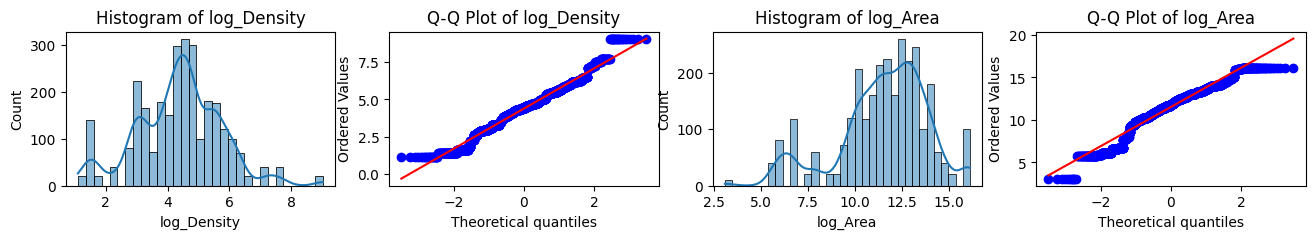

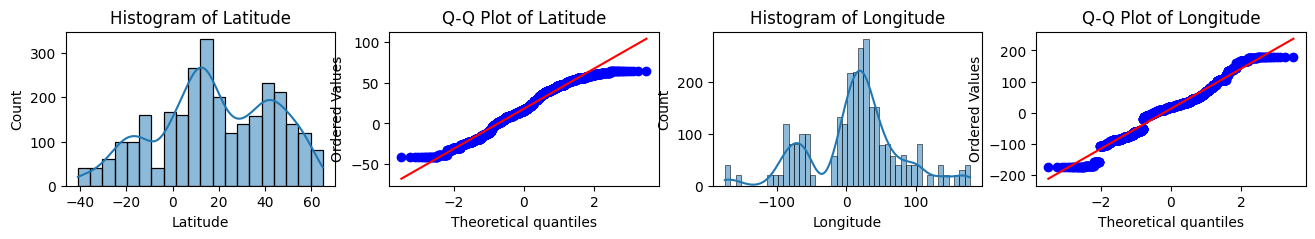

In [46]:
# Histogrammes et Q-Q plots pour visualiser les distributions après transformation
a=1

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    
    if a==1:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 2))
    
        # Histogramme
        sns.histplot(df[column], kde=True, ax=ax1)
        ax1.set_title(f'Histogram of {column}')
    
        # Q-Q plot
        stats.probplot(df[column], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of {column}')
    else:
        # Histogramme
        sns.histplot(df[column], kde=True, ax=ax3)
        ax3.set_title(f'Histogram of {column}')
    
        # Q-Q plot
        stats.probplot(df[column], dist="norm", plot=ax4)
        ax4.set_title(f'Q-Q Plot of {column}')
        
        plt.show()
        a=0
    a+=1

### 2.1.3 - Suppression de la variable 'Fossil_elec'

Comme étudié dans l'analyse exploratoire des données, la variable 'Fossil_elec' est extrêmement corrélée avec les émissions de CO2. Nous décidons de la supprimer de notre DataFrame pour la modélisation. Nous réaliserons un modèle de régréssion linéaire avec cette variable uniquement, pour comparer les différents résultats.

In [47]:
df_init = df.copy() # on utilisera cette variable ultérieurement 
df.drop('log_Fossil_elec', axis=1, inplace=True)

## 2.2 - Division du jeu de données

Nous allons diviser notre jeu de données entre un échantillon d'apprentissage et un échantillon de test. Nous choisissons une répartition avec 80% des données pour l'apprentissage et 20% pour le test. Cette étape est très importante afin d'avoir un équilibre des données entre l'entraînement et le test. Une première option pourrait être de choisir aléatoirement 80% des données pour l'entraïnement et le reste pour le test. Dans un objectif de recherche de performance, nous pourrions aussi avoir une répartition équilibrée de la présence des pays dans le train et dans le test, et ainsi, découper nos échantillons en fonction de ce paramètre. 

Nous allons tester les différentes méthodes pour comparer les performances. 

In [48]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


### 2.2.1 - Division aléatoire

Nous allons découper notre jeu de données de manière à avoir 80% des données dans le X_train et 20% des données pour le test. Dans un premier temps, ce découpage va se faire de manière totalement aléatoire sur l'ensemble du jeu de données.

In [49]:
# Préparation des données d'entraînement
dff = df.copy() # On ne veut pas la variable à prédire dans le X_train, mais que dans Y_train
dff.drop('log_CO2', axis=1, inplace=True)

Nous allons également préparer un échantillon d'entraînement contenant uniquement des variables quantitatives. En effet, certains modèles que nous présenterons ultérieurement nécessitent des variables quantitatives et des variables qualitatives catégorisées. En raison des coûts de calculs importants, nous décidons de ne conserver que les variables quantitatives dans certains modèles. De même, nous allons construire un échantillon d'entraînement avec une catégorisation des années.

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(dff,df['log_CO2'],test_size=int(df.shape[0]*0.2),random_state=42)

# Pour ne conserver que les données quantitatives dans le train et le test
X_train_quanti = X_train.drop(['Entity','Year'],axis=1)
X_test_quanti = X_test.drop(['Entity','Year'],axis=1)

# Pour encoder les années dans le train et le test (utile pour certains modèles)
encoder = OneHotEncoder()
temp = encoder.fit_transform(X_train[['Year']])
X_train_year = pd.concat([X_train_quanti, pd.DataFrame(temp.toarray(),index=X_train.index)], ignore_index=False, axis=1)

encoder = OneHotEncoder()
temp = encoder.fit_transform(X_test[['Year']])
X_test_year = pd.concat([X_test_quanti, pd.DataFrame(temp.toarray(),index=X_test.index)], ignore_index=False, axis=1)

# Créer un dictionnaire de correspondance pour renommer les colonnes
columns_mapping = {i: str(2000 + i) for i in range(21)}

# Renommer les colonnes
X_train_year.rename(columns=columns_mapping, inplace=True)
X_test_year.rename(columns=columns_mapping, inplace=True)

### 2.2.2 - Division avec un équilibre entre la présence des pays dans chaque échantillon

Dans un objectif de recherche de performance pour nos modèles, nous pouvons nous demander si nous n'aurions pas un meilleur score en découpant nos données de manière à ce que chaque pays soit représenté avec 80% de ses données dans le train et 20% dans le test. Pour un même pays, le découpage est aléatoire, mais on s'assure que chaque pays soit présent à la même hauteur dans le train et le test.

In [51]:
# Séparer les données par pays
unique_countries = df['Entity'].unique()

# Litse d'indices pour diviser le train et test
ind_train = []
ind_test = []

for countries in unique_countries:
    train_countries, test_countries = train_test_split(df[df['Entity'] == countries], test_size=0.2, random_state=42)
    
    # Récupération des indices des lignes
    train_indices = train_countries.index.tolist()
    test_indices = test_countries.index.tolist()
    ind_train.extend(train_indices)
    ind_test.extend(test_indices)

# # Diviser les données en ensembles d'entraînement et de test en fonction des pays
# train_indices = df[df['Entity'].isin(train_countries)].index
# test_indices = df[df['Entity'].isin(test_countries)].index

# Séparer les ensembles de données à partir des indices récupérés
X_train_entity = df.loc[ind_train].drop(['log_CO2'], axis=1)
Y_train_entity = df.loc[ind_train, 'log_CO2']
X_test_entity = df.loc[ind_test].drop(['log_CO2'], axis=1)
Y_test_entity = df.loc[ind_test, 'log_CO2']

# Pour ne conserver que les données quantitatives dans le train 
X_train_entity_quanti = X_train_entity.drop(['Entity','Year'],axis=1)
X_test_entity_quanti = X_test_entity.drop(['Entity','Year'],axis=1)


## 2.3 - Modélisation par régression linéaire

Pour interpréter les résultats et comparer les méthodes, nous allons procéder par validation croisée. Le principe de la validation croisée est d'évaluer les performances d'un modèle en le testant sur plusieurs sous-ensembles distincts des données, appelés "folds". Chaque fold est utilisé à tour de rôle comme ensemble de test, tandis que les autres folds sont combinés pour former l'ensemble d'entraînement. Ainsi, chaque observation est utilisée à la fois pour l'entraînement et pour l'évaluation du modèle.

L'évaluation se fait en calculant les performances du modèle sur chaque fold de test, en utilisant une métrique prédéfinie (comme l'erreur quadratique moyenne, le R² score, etc.). On calcule ensuite la moyenne des performances de chacune des validations croisées. 

In [52]:
def perf_cross_validation(model, X, Y, cv = 5, scoring = None):
    # Par défaut cv=5 : nombre de découpages pour la validation croisée
    # Par défaut scoring=None --> fonction score de sklearn
    cross = cross_val_score(model, X, Y, cv=cv, scoring=scoring) # Attention à ne donner que des variables quantitatives dans le X
    cross_val_mean = np.mean(cross)
    print("Score de validation croisée pour le modèle", model)
    print("Score de chaque validation croisée", cross)
    print("Score moyen de validation croisée", cross_val_mean)
    print("")
    


### 2.3.1 - Régression linéaire sans sélection de variable

La modélisation linéaire sans sélection de variable utilise toutes les variables disponibles dans le modèle, sans en exclure. Cette méthode ne cherche pas à réduire le nombre de variables. Il n'y a pas d'hyperparamètres spécifiques pour contrôler la sélection des variables. Ici, nous avons choisi ne de conserver que les variables quantitatives pour diminuer les temps de calculs et ne pas encoder les pays ou les années.

In [53]:
# Création d'un modèle de régression linéaire
model_reg_no_select = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model_reg_no_select.fit(X_train.drop(['Entity','Year'],axis=1), Y_train)
perf_cross_validation(model_reg_no_select,X_train_quanti,Y_train)

Score de validation croisée pour le modèle LinearRegression()
Score de chaque validation croisée [0.9809549  0.98319524 0.97787944 0.98076129 0.98222703]
Score moyen de validation croisée 0.981003579032978



Le modèle de régression linéaire testé affiche un score moyen de validation croisée de 0.981, révélant une prédiction précise et robuste de la variable CO2. Cependnat, l'absence de sélection de variables pourrait être un potentiel risque de surajustement, nécessitant une vérification supplémentaire de la fiabilité des résultats.

### 2.3.2 - Régression linéaire avec sélection de variable selon Backward/Forward 

Les méthodes de sélection de variables par "backward" (en arrière) et "forward" (en avant) sont des approches itératives utilisées pour sélectionner un sous-ensemble optimal de variables explicatives pour un modèle de régression. 

* Sélection Backward (en arrière) :
Cette approche commence par un modèle comprenant toutes les variables explicatives. À chaque itération, une variable est retirée du modèle. La variable retirée est celle qui a le moins d'impact sur la performance du modèle. La performance du modèle est évaluée en utilisant le critère BIC dans notre cas. Le processus continue jusqu'à ce qu'aucune amélioration significative de la performance du modèle ne soit observée après la suppression d'une variable.

* Sélection Forward (en avant) :
Cette approche commence avec un modèle vide qui ne contient aucune variable explicative. À chaque étape, une variable est ajoutée au modèle. La variable ajoutée est celle qui améliore le plus la performance du modèle. selon le critère d'information BIC. Le processus continue jusqu'à ce qu'aucune amélioration significative de la performance du modèle ne soit observée après l'ajout d'une variable.

Nous allons mettre en place ces deux méthodes, implémenter des modèles de régressions linéaires associés, et comparer les résultats obtenus entre eux, ainsi qu'avec le modèle de régression linéaire sans sélection de variables.

In [54]:
import statsmodels.api as sm

# Fonction pour calculer le BIC pour un modèle
def calculate_bic(y, X):
    model = sm.OLS(y, X).fit()
    return model.bic

# Fonction pour la sélection de caractéristiques backward basée sur BIC
def backward_feature_selection(data, target_name, initial_features):
    features = initial_features.copy()
    results = []
    p_value_max = 0.1 # Initialisation pour le while
    while len(features) > 1 and p_value_max > 0.05:  # Seuil de p-value ou si reste une seule feature
        features_with_constant = sm.add_constant(data[features])
        model = sm.OLS(data[target_name], features_with_constant).fit()
        bic = calculate_bic(data[target_name], features_with_constant)

        results.append((features.copy(), bic))

        # Trouver la feature avec le p-value le plus élevé et le retirer
        p_values = model.pvalues.iloc[1:]  # exclure la constante
        worst_feature = p_values.idxmax()
        p_value_max = p_values.max()

        features.remove(worst_feature)
        
    
    # Trier les résultats pour trouver le modèle avec le BIC le plus faible
    results.sort(key=lambda tup: tup[1])
    best_features, best_bic = results[0]
    
    print(f"Best BIC: {best_bic} with features: {best_features}")
    print("")
    return best_features

# Application à notre situation
initial_features = dff.columns.drop(['Entity', 'Year']).tolist()
selected_features_backward = backward_feature_selection(df, 'log_CO2', initial_features)
print(f"Selected features after forward selection based on BIC: {selected_features_backward}")
print("")
print(f"Number of selected features: {len(selected_features_backward)}")

Best BIC: 1770.3076590691003 with features: ['Elec_access', 'Clean_access', 'Renewable_share', 'log_Nuclear_elec', 'log_Renewable_elec', 'log_Energy_per_capita', 'log_PEnergy_intensity', 'Growth', 'log_GDP_per_capita', 'log_Density', 'log_Area', 'Latitude']

Selected features after forward selection based on BIC: ['Elec_access', 'Clean_access', 'Renewable_share', 'log_Nuclear_elec', 'log_Renewable_elec', 'log_Energy_per_capita', 'log_PEnergy_intensity', 'Growth', 'log_GDP_per_capita', 'log_Density', 'log_Area', 'Latitude']

Number of selected features: 12


In [55]:
# Fonction pour la sélection de caractéristiques Forward basée sur BIC
def forward_feature_selection(data, target_name, candidate_features):
    features = []
    results = []
    better = True
    while len(candidate_features) > 0 and better:
        bic_scores = []
        for feature in candidate_features:
            tested_features = features + [feature]
            features_with_constant = sm.add_constant(data[tested_features])
            model = sm.OLS(data[target_name], features_with_constant).fit()
            bic = calculate_bic(data[target_name], features_with_constant)
            bic_scores.append((feature, bic))
        
        # Trouver la feature avec le BIC le plus bas
        new_feature, new_bic = min(bic_scores, key=lambda x: x[1])
        
        # Si l'ajout de la nouvelle feature améliore le BIC
        
        if len(features)!=0:
            better = new_bic < results[-1][1]
        
        if better:
            features.append(new_feature)
            candidate_features.remove(new_feature)
            results.append((features.copy(), new_bic))
            print(f"Adding {new_feature}, BIC: {new_bic}")
    
    # Trier les résultats pour trouver le modèle avec le BIC le plus faible
    results.sort(key=lambda tup: tup[1])
    best_features, best_bic = results[0]
    print("")
    print(f"Best BIC: {best_bic} with features: {best_features}")
    return best_features

# Application à notre projet
candidate_features = df.columns.drop(['Entity', 'Year', 'log_CO2']).tolist()
selected_features_forward = forward_feature_selection(df, 'log_CO2', candidate_features)
print("")
print(f"Selected features after forward selection based on BIC: {selected_features_forward}")
print("")
print(f"Number of selected features: {len(selected_features_forward)}")


Adding log_Renewable_elec, BIC: 11238.984413123624
Adding Renewable_share, BIC: 10153.855100015267
Adding log_Area, BIC: 8659.968161553134
Adding log_Density, BIC: 6527.114333204143
Adding log_Energy_per_capita, BIC: 2714.8852990136966
Adding log_GDP_per_capita, BIC: 2365.847283323687
Adding Elec_access, BIC: 2101.0690981942685
Adding log_PEnergy_intensity, BIC: 1892.4043441469464
Adding Clean_access, BIC: 1791.517593850313
Adding Growth, BIC: 1780.0593344281765
Adding Latitude, BIC: 1768.4303339636222

Best BIC: 1768.4303339636222 with features: ['log_Renewable_elec', 'Renewable_share', 'log_Area', 'log_Density', 'log_Energy_per_capita', 'log_GDP_per_capita', 'Elec_access', 'log_PEnergy_intensity', 'Clean_access', 'Growth', 'Latitude']

Selected features after forward selection based on BIC: ['log_Renewable_elec', 'Renewable_share', 'log_Area', 'log_Density', 'log_Energy_per_capita', 'log_GDP_per_capita', 'Elec_access', 'log_PEnergy_intensity', 'Clean_access', 'Growth', 'Latitude']

N

Notre objectif est de sélectionner la combinaisond e varibles qui permettent de minimiser le critère BIC. Ainsi, en appliquant les méthodes Backward et Forward développées précédememnt, nous obtenons respectivement une sélection de 12 et 11 variables pour nos régressions linéaires avec sélection de variable. On remarque une diminution du nombre de variables par rapport au nombre initial de variables quantitatives. De plus, le nombre de variables sélectionnées par les deux modèles est proche. On s'attend à ce que les scores de performance obtenus par validation croisée soient proches que pour la régression sans sélection de variable.

Ces différences de résultats entre les deux méthodes peuvent s'expliquer par la sensibilité des méthodes à l'ordre de la sélection de variables, ou encore aux éventuelles corrélations entre les variables ajoutées ou retirées, que nous avons étudié dans la partie précédente.

In [56]:
# Régression linéaire sur une sélection de variables par la méthode Backward

# Création du modèle de régression linéaire
model_backward = LinearRegression()

# Utilisation des variables sélectionnées par la méthode Backward
X_train_selected_backward = X_train[selected_features_backward]
X_test_selected_backward = X_test[selected_features_backward]

# Ajustement du modèle sur le jeu d'entraînement en utilisant seulement les variables sélectionnées
model_backward.fit(X_train[selected_features_backward], Y_train)
perf_cross_validation(model_backward,X_train[selected_features_backward],Y_train)

Score de validation croisée pour le modèle LinearRegression()
Score de chaque validation croisée [0.98091553 0.98323299 0.97784366 0.98076264 0.98230356]
Score moyen de validation croisée 0.9810116738715042



En utilisant la méthode de sélection de variables backward pour réduire les prédicteurs de $14$ à $12$, le modèle de régression linéaire maintient une performance élevée avec un score moyen de validation croisée de $0.9810$, pratiquement inchangé par rapport au modèle initial. Ce résultat suggère que la suppression de deux variables n'affecte pas significativement la capacité prédictive du modèle, indiquant à la fois l'efficacité de la sélection et un potentiel risque réduit de surajustement.

In [57]:
# Régression linéaire sur une sélection de variables par la méthode Forward

# Création du modèle de régression linéaire
model_forward = LinearRegression()

# Utilisation des variables sélectionnées par la méthode Forward
X_train_selected_forward = X_train[selected_features_forward]
X_test_selected_forward = X_test[selected_features_forward]

# Ajustement du modèle sur le jeu d'entraînement en utilisant seulement les variables sélectionnées
model_forward.fit(X_train_selected_forward, Y_train)
perf_cross_validation(model_forward,X_train_selected_forward,Y_train)

Score de validation croisée pour le modèle LinearRegression()
Score de chaque validation croisée [0.98092625 0.98318361 0.97779922 0.98059013 0.98249347]
Score moyen de validation croisée 0.9809985385488436



L'approche de sélection de variables forward a produit des scores de validation croisée quasiment similaires pour le modèle de régression linéaire, avec un score moyen de $0.9810$. Ces résultats montrent que le modèle conserve une excellente capacité prédictive même après une sélection progressive des variables. Cela indique que les variables ajoutées sont pertinentes pour la prédiction de CO2 et que le modèle reste robuste, avec peu de variation entre les plis, minimisant ainsi le risque de surajustement. Ces observations confirment l'efficacité de la méthode de sélection forward dans la construction d'un modèle prédictif stable et précis.


Les méthodes de sélection de variables backward et forward ont réduit le nombre de prédicteurs de $14$ à $12$ et $11$, respectivement. Malgré cette réduction, les scores moyens de validation croisée restent très similaires, autour de $0.9810$, ce qui montre que le modèle conserve une excellente précision. La sélection de variables semble donc efficace pour éliminer celles qui sont redondantes ou moins pertinentes, tout en maintenant la capacité prédictive du modèle. Le choix entre les deux méthodes peut dépendre de la préférence pour la simplicité ou la structure du modèle.

### 2.3.3 - Régression linéaire avec sélection de variables par LASSO

Le LASSO (Least Absolute Shrinkage and Selection Operator) est une méthode de régression linéaire régularisée qui ajoute une pénalité L1 à la fonction de coût. Cette pénalité favorise la simplicité du modèle en forçant certains coefficients de régression à être exactement zéro, ce qui équivaut à une sélection de variables. Cela permet de réduire la complexité du modèle en éliminant les variables moins importantes ou redondantes.

Dans la régression linéaire avec LASSO, l'hyperparamètre à optimiser est λ, qui est le paramètre de régularisation. λ contrôle l'équilibre entre la simplicité du modèle et son ajustement aux données. Un λ élevé favorise un modèle plus simple en supprimant les variables moins importantes, tandis qu'un λ faible permet un ajustement plus précis mais augmente le risque de surajustement. Pour trouver la meilleure valeur de λ, on utilise une recherche sur grille combinée à une validation croisée pour maximiser les performances du modèle. Dans la librairie Sklearn, ce paramètre est noté `alpha` et est défini par $\alpha = 1/\lambda$.

In [58]:
# Grille de valeurs du paramètre alpha à optimiser
param = [{"alpha":[1e-12,0.000000001,0.0001, 0.0005,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt = regLasso.fit(X_train_quanti, Y_train)

# Paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

regLasso = linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso = regLasso.fit(X_train_quanti,Y_train)

# Affichage des coefficients 
coef = pd.Series(model_lasso.coef_, index = X_train_quanti.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Meilleur R2 = 0.981004, Meilleur paramètre = {'alpha': 1e-12}
Lasso conserve 14 variables et en supprime 0


In [59]:
perf_cross_validation(model_lasso,X_train_quanti,Y_train)

Score de validation croisée pour le modèle Lasso(alpha=1e-12)
Score de chaque validation croisée [0.9809549  0.98319524 0.97787944 0.98076129 0.98222703]
Score moyen de validation croisée 0.9810035790329772



L'analyse de sélection de variables via la méthode LASSO, avec une optimisation du paramètre de régularisation alpha, a abouti à un alpha optimal de $1×10e−12$, extrêmement proche de zéro. Une diminution de la valeur de lambda ammène à une erreur de calcul, mais après plusieurs tentatives, l'optimiseur choisi la valeur minimale à chaque fois. Cela indique une pénalisation presque nulle, conservant ainsi toutes les 14 variables initiales. Le score R² obtenu, de 0.981004, est très élevé, confirmant que le modèle avec toutes les variables est déjà très performant pour prédire la variable CO2. Le résultat montre que la régularisation par LASSO n'apporte pas de bénéfice supplémentaire significatif.

Ces observations peuvent être dues au fait que nous n'avons choisi que des varoables quantitatives dans notre échantillon d'entraînement. Dans ce cas, le meilleur modèle pourrait être la régression linéaire simple que nous avons étudié précédemment. Nous nous sommes demandés si ave un autre échantillon, l'optimisuer des hyperparamètres ne choisirait pas une valeur autre qu'un bord de la grille donnée. Nous allons tester ce même code avec un échantillon d'entraînement comprenant un encodage des années.

In [60]:
# Grille de valeurs du paramètre alpha à optimiser
param = [{"alpha":[0.0001, 0.0005,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt = regLasso.fit(X_train_year, Y_train)

# Paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

regLasso_year = linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso_year = regLasso_year.fit(X_train_year,Y_train)

# Affichage des coefficients 
coef = pd.Series(model_lasso_year.coef_, index = X_train_year.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Meilleur R2 = 0.980990, Meilleur paramètre = {'alpha': 0.001}
Lasso conserve 28 variables et en supprime 6


In [61]:
perf_cross_validation(model_lasso,X_train_year,Y_train)

Score de validation croisée pour le modèle Lasso(alpha=1e-12)
Score de chaque validation croisée [0.98072647 0.98295064 0.97799709 0.98074222 0.98208386]
Score moyen de validation croisée 0.980900054589352




L'ajout d'un encodage des années et l'utilisation de LASSO ont produit un modèle avec un lambda de 0.001, conservant 28 variables et en supprimant 6. Malgré l'augmentation de complexité due à l'encodage, le score R² de 0.980990 est très proche du score initial, indiquant une performance stable. LASSO a efficacement éliminé les variables les moins pertinentes. De plus, on remarque que le meilleur lambda choisi n'est plus la borne inférieure de la liste donnée. Cela nous indique donc que l'optimiseur a réellemnt fonctionné et qu'il est pertinent avec cet échantillon d'entraînement.

Nous avons vu que le LASSO suggère une réduction du nombre de variables, nous allons afficher graphiquement les coefficients associés à chacune d'elles : un coefficent dont la valeur absolue est élevé indique que la variable associée apporte de l'information au modèle, alors qu'une valeur proche de 0 montre que cette variable n'est pas des plus pertinentes. 

Text(0.5, 1.0, 'Coefficients du modèle lasso')

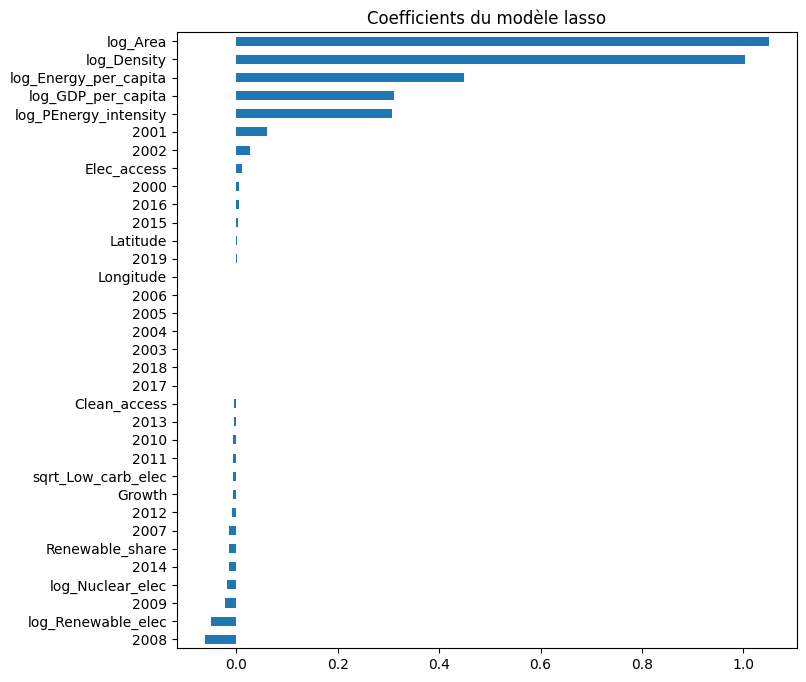

In [62]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Le graphique montre les coefficients d'un modèle LASSO, où des variables comme `log_Area` et `log_Density` présentent une forte influence sur la variable cible. Les variables avec des coefficients nuls sont exclues par la pénalisation LASSO, ce qui indique leur faible ou non-pertinence. L'impact variable des années suggère que certains moments sont plus significatifs que d'autres pour la prédiction. 

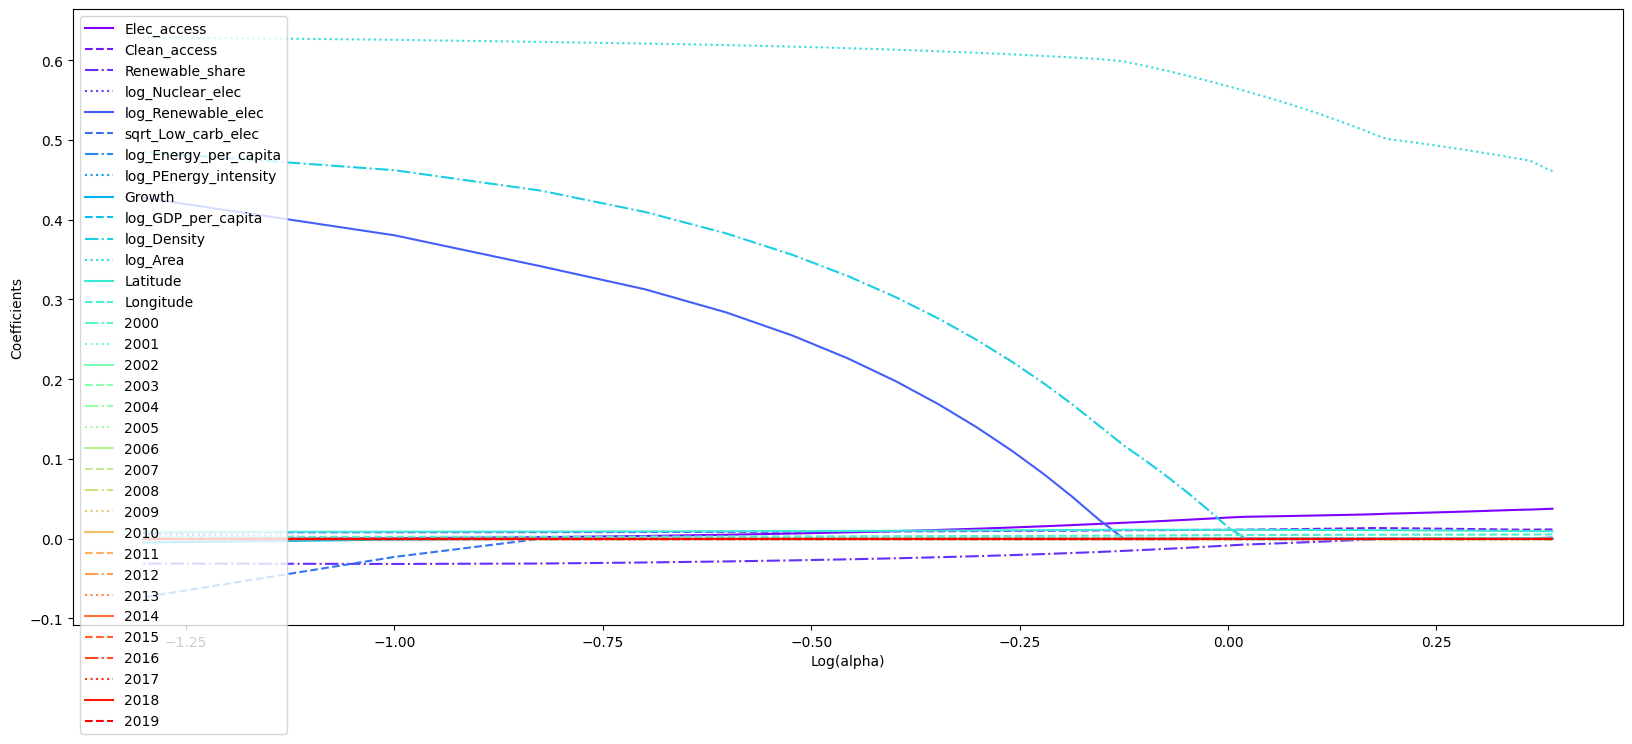

Meilleur R2 = 0.980990, Meilleur paramètre = {'alpha': 0.001}
Lasso conserve 28 variables et en supprime 6


In [63]:
from itertools import cycle
from sklearn.linear_model import lasso_path

# Calcul des chemins Lasso
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_year, Y_train, alphas=np.array(range(1,50,1))/20.)

# Initialisation du graphique
plt.figure(figsize =(20,8))
ax = plt.gca()

# Définition des styles de ligne et des couleurs
styles = cycle(['-', '--', '-.', ':'])
colors = cycle(plt.cm.rainbow(np.linspace(0, 1, coefs_lasso.shape[0])))

# Tracé des chemins Lasso
neg_log_alphas_lasso = np.log10(alphas_lasso)
for coef_l, style, color in zip(coefs_lasso, styles, colors):
    plt.plot(neg_log_alphas_lasso, coef_l, linestyle=style, c=color)

# Définition de l'axe x et y
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficients')

# Légende pour les couleurs
legend = X_train_year.columns
plt.legend(legend)

plt.show()

# Grille de valeurs du paramètre alpha à optimiser
param = [{"alpha":[0.0001, 0.0005,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt = regLasso.fit(X_train_year, Y_train)

# Paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

regLasso_year = linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso_year = regLasso_year.fit(X_train_year,Y_train)

# Affichage des coefficients 
coef = pd.Series(model_lasso_year.coef_, index = X_train_year.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))


Ce graphique montre comment les coefficients des différentes variables de la régression LASSO changent en fonction de la valeur logarithmique de l'hyperparamètre alpha (ou lambda).

* Diminution des coefficients : Les coefficients de plusieurs variables diminuent de manière significative lorsque log(alpha) augmente, en particulier pour des variables telles que `log_Density` et `log_Area`. Cela indique que la pénalisation LASSO a un contrôle important sur ces variables, réduisant leur contribution.

* Élimination des variables : À une certaine valeur de log(alpha), les coefficients de certaines variables tombent à zéro, signifiant que ces variables ont été éliminées du modèle. Cela montre la capacité de LASSO à simplifier la structure du modèle en supprimant les variables moins pertinentes.

* Stabilité de certaines variables : Certaines variables maintiennent des coefficients proches de zéro ou stables, même pour des valeurs élevées de log(alpha), suggérant qu'elles apportent peu ou pas d'information significative.

Ce graphique présente la façon dont la régression LASSO gère les coefficients des variables, en les réduisant ou en les éliminant entièrement pour optimiser la structure du modèle. Cette approche équilibre la précision et la simplicité, évitant le surajustement tout en maintenant la pertinence des prédicteurs restants.

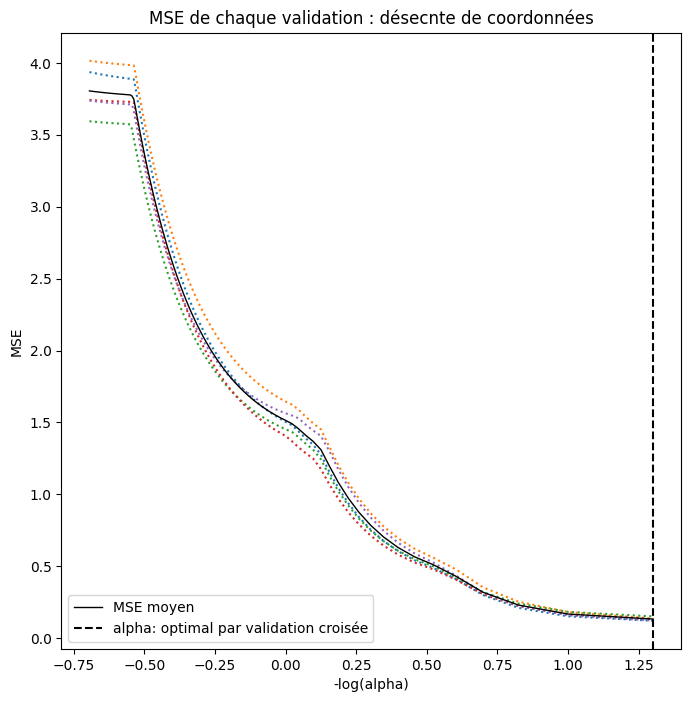

In [64]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,100,1))/20.,n_jobs=-1,random_state=13).fit(X_train_quanti,Y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=1)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par validation croisée')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation : désecnte de coordonnées')
plt.show()

Ce graphique présente la relation entre le paramètre de régularisation alpha (correspond à l'hyperparamètre lambda, représenté sous forme de -log(alpha)) et la performance du modèle LASSO en termes de Mean Squared Error (MSE) pour différentes validations croisées. Les courbes en pointillés colorés montrent le MSE pour chaque pli de la validation croisée en fonction de -log(alpha), indiquant la robustesse et la cohérence du modèle. La courbe noire montre le MSE moyen pour tous les plis, qui est la performance globale du modèle en fonction de la pénalisation alpha. La ligne verticale en pointillés noirs représente la valeur optimale de alpha (avec -log(alpha)) choisie par la validation croisée. Cette valeur d'alpha équilibre la pénalisation et la performance, minimisant le MSE moyen. Selon le critère du MSE, la vleur optimale de alpha n'est pas la même que celle indiquée selon le critère du R² score. 

On observe que le MSE moyen diminue de manière significative à mesure que log(alpha) diminue (ie que alpha augmente), indiquant que la régularisation est bénéfique jusqu'à un certain point. Le MSE atteint un plateau au-delà d'une certaine valeur de log(alpha), montrant que la pénalisation excessive n'apporte pas d'amélioration significative.

### 2.3.4 - Régression linéaire avec régularisation par Ridge

La régression linéaire avec régularisation par Ridge combine la régression linéaire avec une régularisation L2 pour réduire la complexité du modèle. Cette régularisation ajoute un terme de pénalité proportionnel au carré des coefficients de régression à la fonction de coût. Le paramètre de régularisation λ contrôle cette pénalité : un λ plus élevé réduit les coefficients, simplifiant ainsi le modèle, tandis qu'un λ plus faible permet une plus grande flexibilité. L'objectif est de trouver un équilibre entre l'ajustement du modèle aux données et la prévention du surajustement. Ici, le λ fonctionne comme pour la méthode LASSO, mais uara moins tendnace à annuler des paramètres car nous avons un carré.

In [65]:
# Grille de valeurs du paramètre alpha à optimiser pour Ridge
param = [{"alpha":[1e-12, 0.000000001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1,2,5,10]}]
regRidge = GridSearchCV(linear_model.Ridge(), param, cv=5, n_jobs=-1)
regRidgeOpt = regRidge.fit(X_train_quanti, Y_train)

# Paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regRidgeOpt.best_score_, regRidgeOpt.best_params_))

regRidge = linear_model.Ridge(alpha=regRidgeOpt.best_params_['alpha'])
model_ridge = regRidge.fit(X_train_quanti, Y_train)

# Affichage des coefficients
coef = pd.Series(model_ridge.coef_, index=X_train_quanti.columns)

Meilleur R2 = 0.981004, Meilleur paramètre = {'alpha': 1}


In [66]:
perf_cross_validation(model_ridge,X_train_quanti,Y_train)

Score de validation croisée pour le modèle Ridge(alpha=1)
Score de chaque validation croisée [0.98097738 0.98318983 0.97786582 0.98075084 0.98223568]
Score moyen de validation croisée 0.9810039111676208




Le modèle Ridge, avec un lambda optimal de 1, atteint un score R² de 0.981004, similaire à celui des modèles précédents sans régularisation. Cela implique que Ridge contribue à la performance du modèle tout en évitant le surajustement, en diminuant uniformément l'impact des variables sans en exclure aucune.

Comme pour la méthode LASSO, nous allons comparer ces résultats avec ceux obtenus sur un autre échantillon d'entraînement comprenant un encodage des années. Par définition, l'hyperparamètre optimisé en Python est $\alpha$ défini tel que $\alpha = 1/\lambda$


In [67]:
# Grille de valeurs du paramètre alpha à optimiser pour Ridge
param = [{"alpha": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1,2,5,10,15]}]
regRidge = GridSearchCV(linear_model.Ridge(), param, cv=5, n_jobs=-1)
regRidgeOpt = regRidge.fit(X_train_year, Y_train)

# Paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regRidgeOpt.best_score_, regRidgeOpt.best_params_))

regRidge_year = linear_model.Ridge(alpha=regRidgeOpt.best_params_['alpha'])
model_ridge_year = regRidge_year.fit(X_train_year, Y_train)

# Affichage des coefficients
coef = pd.Series(model_ridge_year.coef_, index=X_train_year.columns)


Meilleur R2 = 0.980917, Meilleur paramètre = {'alpha': 5}


In [68]:
perf_cross_validation(model_ridge_year,X_train_year,Y_train)

Score de validation croisée pour le modèle Ridge(alpha=5)
Score de chaque validation croisée [0.98085905 0.98295171 0.97793149 0.98071318 0.98213004]
Score moyen de validation croisée 0.980917093061793



Avec l'encodage des années inclus dans votre échantillon d'entraînement, le modèle Ridge a identifié un lambda optimal de 5, donnant un score R² de 0.980917. Cette légère diminution par rapport au score précédent montre que l'encodage des années, ajoutant de la complexité au modèle, peut bénéficier d'une pénalisation plus forte pour maintenir la généralisabilité sans dégrader significativement la précision. 

## 2.4 Support Vector Machine (SVM)

In [69]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

Le modèle SVM (Support Vector Machine) est une méthode d'apprentissage supervisé qui peut être utilisée pour la classification ou la régression. Pour la régression, la version utilisée ici est appelée SVR (Support Vector Regression). Le SVM cherche à trouver le meilleur hyperplan dans lequel les données sont séparées en plusieurs classes dont la frontière est la plus éloignée possible des points de données (ou marge maximale).

Hyperparamètres pour SVM :

Pour un noyau linéaire :

* C : Contrôle le compromis entre la marge de l'hyperplan et la classification correcte des échantillons d'entraînement. Une valeur plus élevée de C implique une classification plus précise, ce qui peut conduire au surajustement.
* Epsilon : Définit une zone autour de la ligne ou de la surface de régression dans laquelle les erreurs de prédiction ne contribuent pas à la fonction de coût

Pour un noyau polynomial :

* C : Identique à ci-dessus.
* degree : Le degré du polynôme. Plus il est élevé, plus la surface de décision peut prendre des formes complexes.
* gamma : Contrôle l'influence d'un seul échantillon d'entraînement, avec des valeurs plus faibles signifiant une influence plus étendue.
* coef0 : Terme indépendant dans la fonction de noyau, qui peut ajuster le modèle aux données.

Pour un noyau radial (RBF) :

* C : Identique à ci-dessus.
* gamma : Détermine la distance d'influence d'un seul échantillon d'entraînement; plus elle est petite, plus la région d'influence est grande.
* Espsilon : Idemn au noyau linéaire.

Pour les trois noyaux, les valeurs de `C`, `epsilon` et `gamma` sont généralement choisies via une recherche sur grille avec validation croisée pour éviter le surajustement et assurer que le modèle généralise bien aux données non vues.

### 2.4.1 Choix du noyau et optimisation des paramètres par validation croisée

Nous avons exécuter la cellule ci-dessous en amont qui cherche à optimiser les hyper paramètres de chaque noyau traité ici (linéaire et radial). En raison du temps d'exécution extrêmement conséquent, nous avons commenté la cellule, ainsi que sa sortie. Les expressions n'étant pas les mêmes pour le noyau radial entre les langages R et Python, nous nous attendons à ne pas obtenir les mêmes hyperparamètres à l'issue de la recherche sur grille. 

In [167]:
# # Choix du noyau 
# # --------------------------------

# # Création du modèle SVM avec un noyau linéaire
# svm_linear = SVR(kernel='linear')
# # # Création du modèle SVM avec un noyau polynomial
# # svm_poly = SVR(kernel='poly')
# # Création du modèle SVM avec un noyau radial
# svm_rad = SVR(kernel='rbf')

#  # --------------------------------

# # Préparation des hyperparamètres à optimiser
# param_grid_lin = {'C': [0.1, 1, 10, 100],'epsilon' : [0.01,0.1,1.]}

# # param_grid_poly = {
# #     'C': [0.1, 1, 10],
# #     'degree': [2, 3],
# #     'gamma': [0.1, 1, 5],
# #     'coef0': [0.0, 1.0]
# # }

# param_grid_rad = {
#     'gamma': np.arange(0.00001, 0.00021, 0.00002),  # Gamma varie de 0.1 à 2.1 par pas de 0.5
#     'C': [100, 500, 1000],  # Coûts de pénalisation à essayer
#      'epsilon' : [0.001, 0.01,0.1]
# }

# # --------------------------------

# # Création de l'objet GridSearchCV pour la recherche d'hyperparamètres
# grid_search_lin = GridSearchCV(svm_linear, param_grid_lin, cv=2, scoring='neg_mean_squared_error', verbose=1)  # Utilisation du MSE comme critère
# # grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=2, scoring='neg_mean_squared_error', verbose=1)  # Utilisation du MSE comme critère
# grid_search_rad = GridSearchCV(svm_rad, param_grid_rad, cv=2, scoring='neg_mean_squared_error', verbose=1)  # Utilisation du MSE comme critère

# # --------------------------------

# # # Ajustement du GridSearchCV sur l'ensemble d'entraînement encodé
# grid_search_lin.fit(X_train_quanti, Y_train)
# best_svr_model_lin = grid_search_lin.best_estimator_

# # # grid_search_poly.fit(X_train_quanti, Y_train)
# # # best_svr_model_poly = grid_search_poly.best_estimator_

# grid_search_rad.fit(X_train_quanti, Y_train)
# best_svr_model_rad = grid_search_rad.best_estimator_

# # --------------------------------

# # Affichage des meilleurs paramètres 
# print("Noyau linéaire")
# print("Meilleurs paramètres:", grid_search_lin.best_params_)
# print("")
# print("----------------------------------")
# # print("")
# # print("Noyau polynomial")
# # print("Meilleurs paramètres:", grid_search_poly.best_params_)
# # print("")
# # print("----------------------------------")
# print("")
# print("Noyau radial")
# print("Meilleurs paramètres:", grid_search_rad.best_params_)


Fitting 2 folds for each of 90 candidates, totalling 180 fits
Noyau radial
Meilleurs paramètres: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.00015000000000000004}


On obtient les hyperparamètres optimaux ci-dessous : 

In [71]:
# Fitting 2 folds for each of 12 candidates, totalling 24 fits
# Fitting 2 folds for each of 48 candidates, totalling 96 fits
# Noyau linéaire
# Meilleurs paramètres: {'C': 1, 'epsilon': 0.1}

# ----------------------------------

# Noyau radial
# Meilleurs paramètres: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.00015000000000000004}

In [72]:
# # Pour afficher les vecteurs de support
# print("Noyau linéaire : ")
# print("Nombre de vecteurs de support :\n", best_svr_model_lin.support_vectors_.shape)
# # Pour afficher le nombre de vecteurs de support pour chaque classe
# print("Nombre de vecteurs de support par classe :\n", best_svr_model_lin.n_support_)
# # --------------------------------
# print("--------------------------------")
# # print("Noyau polynomial : ")
# # # Pour afficher les vecteurs de support
# # print("Nombre de vecteurs de support :\n", best_svr_model_poly.support_vectors_.shape)
# # # Pour afficher le nombre de vecteurs de support pour chaque classe
# # print("Nombre de vecteurs de support par classe :\n", best_svr_model_poly.n_support_)
# # # --------------------------------
# # print("--------------------------------")
# print("Noyau radial : ")
# # Pour afficher les vecteurs de support
# print("Nombre de vecteurs de support :\n", best_svr_model_rad.support_vectors_.shape)
# # Pour afficher le nombre de vecteurs de support pour chaque classe
# print("Nombre de vecteurs de support par classe :\n", best_svr_model_rad.n_support_)


In [73]:
# Noyau linéaire : 

# Nombre de vecteurs de support : (1574, 14)
# Nombre de vecteurs de support par classe : [1574]

# Noyau radial : 

# Nombre de vecteurs de support : (1788, 14)
# Nombre de vecteurs de support par classe : [1788]

Le noyau radial nécessite un plus grand nombre de vecteurs de support, ce qui indique une relation plus complexe ou non linéaire dans les données. Cependant, cela peut également indiquer une complexité plus importante et potentiellement un surajustement. Nous étudierons les performances sur l'échantillon de test dans la prochaine partie.

### 2.4.2 Comparaison et étude des erreurs de généralistaion

Nous allons construire les meilleurs modèles avec les hyperparamètres suggérés par la recherche sur grille et étudier l'erreur de généralisation par validation croisée comme dans les modèles précédents.

In [74]:
# print("SVR avec noyau lineéaire")
# perf_cross_validation(best_svr_model_lin,X_train_quanti,Y_train)
# print("SVR avec noyau radial")
# perf_cross_validation(best_svr_model_rad,X_train_quanti,Y_train)

In [168]:
# Définir le modèle et les paramètres
model_SVR_lin = SVR(kernel='linear', C=1,epsilon=0.1)
model_SVR_rad = SVR(kernel='rbf', C=1000, gamma=0.00015,epsilon=0.01)

# Appliquer la validation croisée
scores_SVR_lin = cross_val_score(model_SVR_lin, X_train_quanti, Y_train, cv=5, scoring='r2')
scores_SVR_rad = cross_val_score(model_SVR_rad, X_train_quanti, Y_train, cv=5, scoring='r2')

# Afficher les résultats
print("5-fold cross-validation sur les données d'entraînement pour le modèle linéaire:")
print(f"Précision moyenne R²: {scores_SVR_lin.mean():}")
print("Précisions R² individuelles :")
print(' ', ' '.join(f"{score:}" for score in scores_SVR_lin))

print("\n5-fold cross-validation sur les données d'entraînement pour le modèle radial:")
print(f"Précision moyenne R²: {scores_SVR_rad.mean():}")
print("Précisions R² individuelles :")
print(' ', ' '.join(f"{score:}" for score in scores_SVR_rad))

5-fold cross-validation sur les données d'entraînement pour le modèle linéaire:
Précision moyenne R²: 0.9808518327666519
Précisions R² individuelles :
  0.981004442404942 0.9829239569870122 0.9776915630127613 0.9800823366591895 0.9825568647693549

5-fold cross-validation sur les données d'entraînement pour le modèle radial:
Précision moyenne R²: 0.9967695758057911
Précisions R² individuelles :
  0.9967471088036943 0.997406626459865 0.9976199913463601 0.99602547199452 0.9960486804245163



Le SVR linéaire affiche un R² moyen de 0.9809, aligné sur les performances des modèles linéaires antérieurs, indiquant une forte adéquation linéaire des données. En contraste, le SVR avec noyau radial montre un R² plus élevé de 0.9968, suggérant que la modélisation non linéaire apporte une grande amélioration avec les hyperparamètres choisis, même si les données sont bien adaptées à une relation linéaire.

## 2.5 Modélisation par arbre optimal

La modélisation par arbre optimal vise à ajuster les paramètres d'un arbre de décision de manière à ce qu'il puisse capturer au mieux les relations entre les caractéristiques et la cible dans un jeu de données. Cela permet de créer un arbre qui donne des prédictions précises et généralisables sur de nouvelles données. Nous devons trouver un équilibre des paramètres pour que l'arbre soit suffisamment profond, mais en évitant l'overfitting (surajustement).

Les hyperparamètres à optimiser par une recherche sur grille sont : 

* `max_depth` : La profondeur maximale de l'arbre. Une valeur plus élevée permet à l'arbre d'apprendre des relations plus spécifiques, mais peut conduire à un surajustement.
* `min_samples_split` : Le nombre minimum d'échantillons nécessaires pour diviser un nœud. Si ce nombre n'est pas atteint, le nœud n'est pas autorisé à se diviser.
* `min_samples_leaf` : Le nombre minimum d'échantillons qu'un nœud feuille doit avoir. Cela empêche la création de feuilles avec peu d'échantillons, ce qui peut réduire le surajustement.

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# Définition de l'arbre de décision
tree_model = DecisionTreeRegressor()

# Définition de la grille des hyperparamètres à explorer
param_grid = {
    'max_depth': [None, 10, 20, 30, 50],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],   # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4]      # Nombre minimum d'échantillons requis pour être une feuille
}

# Initialisation de la recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Exécution de la recherche sur les données
grid_search.fit(X_train_quanti, Y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)
print("")

# Utilisation du meilleur modèle trouvé
best_tree_model = grid_search.best_estimator_

perf_cross_validation(best_tree_model,X_train_quanti,Y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Meilleurs paramètres: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}

Score de validation croisée pour le modèle DecisionTreeRegressor(max_depth=50)
Score de chaque validation croisée [0.98449134 0.98298961 0.96480024 0.97493652 0.98474958]
Score moyen de validation croisée 0.9783934569226357




L'arbre de décision optimisé avec une profondeur maximale de 20 et des paramètres de feuille et de division minimales atteint un R² moyen de 0.9805 en validation croisée, performant presque aussi bien que les modèles linéaires et SVR linéaire précédents. Même s'il est assez efficace, ce modèle ne dépasse pas les performances des approches linéaires régularisées. Ces résultats semblent pour l'instant montrer une préférence pour les modèles linéaires.

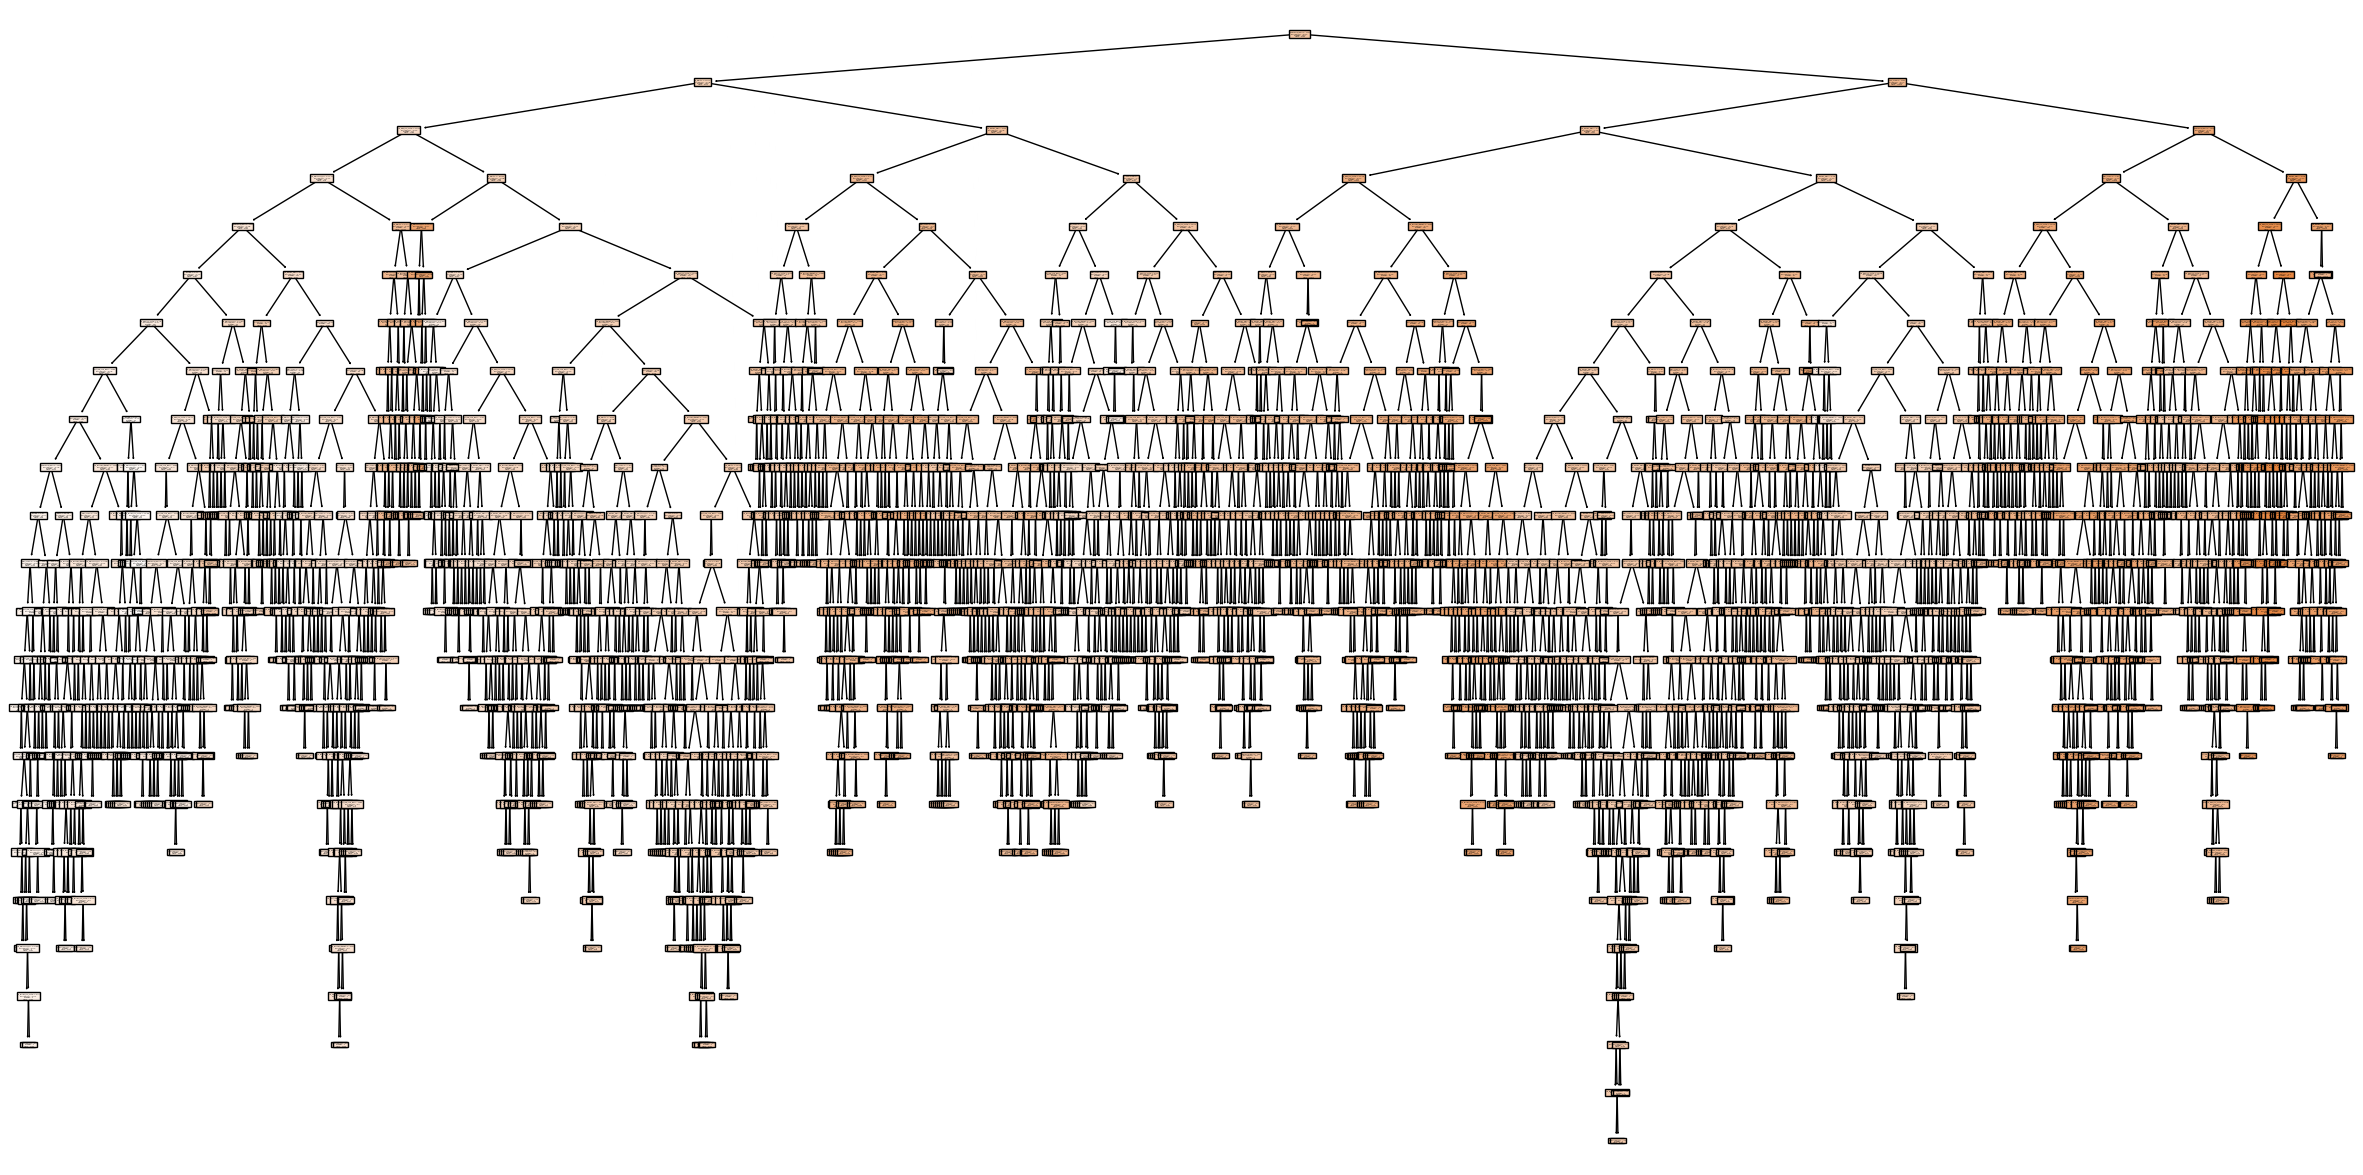

In [77]:
# Création de l'arbre avec les meilleurs paramètres
best_tree_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                        min_samples_split=grid_search.best_params_['min_samples_split'],
                                        min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Entraînement de l'arbre avec les données d'entraînement
best_tree_model.fit(X_train_quanti, Y_train)

# Tracé de l'arbre
plt.figure(figsize=(30,15))  # Ajuster la taille de la figure selon la taille de l'arbre
plot_tree(best_tree_model, feature_names=X_train.columns.tolist(), filled=True)
plt.show()


Compte tenu de sa taille, l'arbre n'est pas très lisible. De plus, Python ne permet pas la représentation la plus appropriée par rapport à R. Cependant, on peut voir que les branches initiales tentent de découper l'arbre en groupes de tailles les plus homogènes possibles. Néanmoins, on voit que pour certaines branches, les profondeurs de l'arbre sont variables, avec des feuilles assez basses (ie profondes) sur le graphique et d'autres plus hautes dans l'arbre.

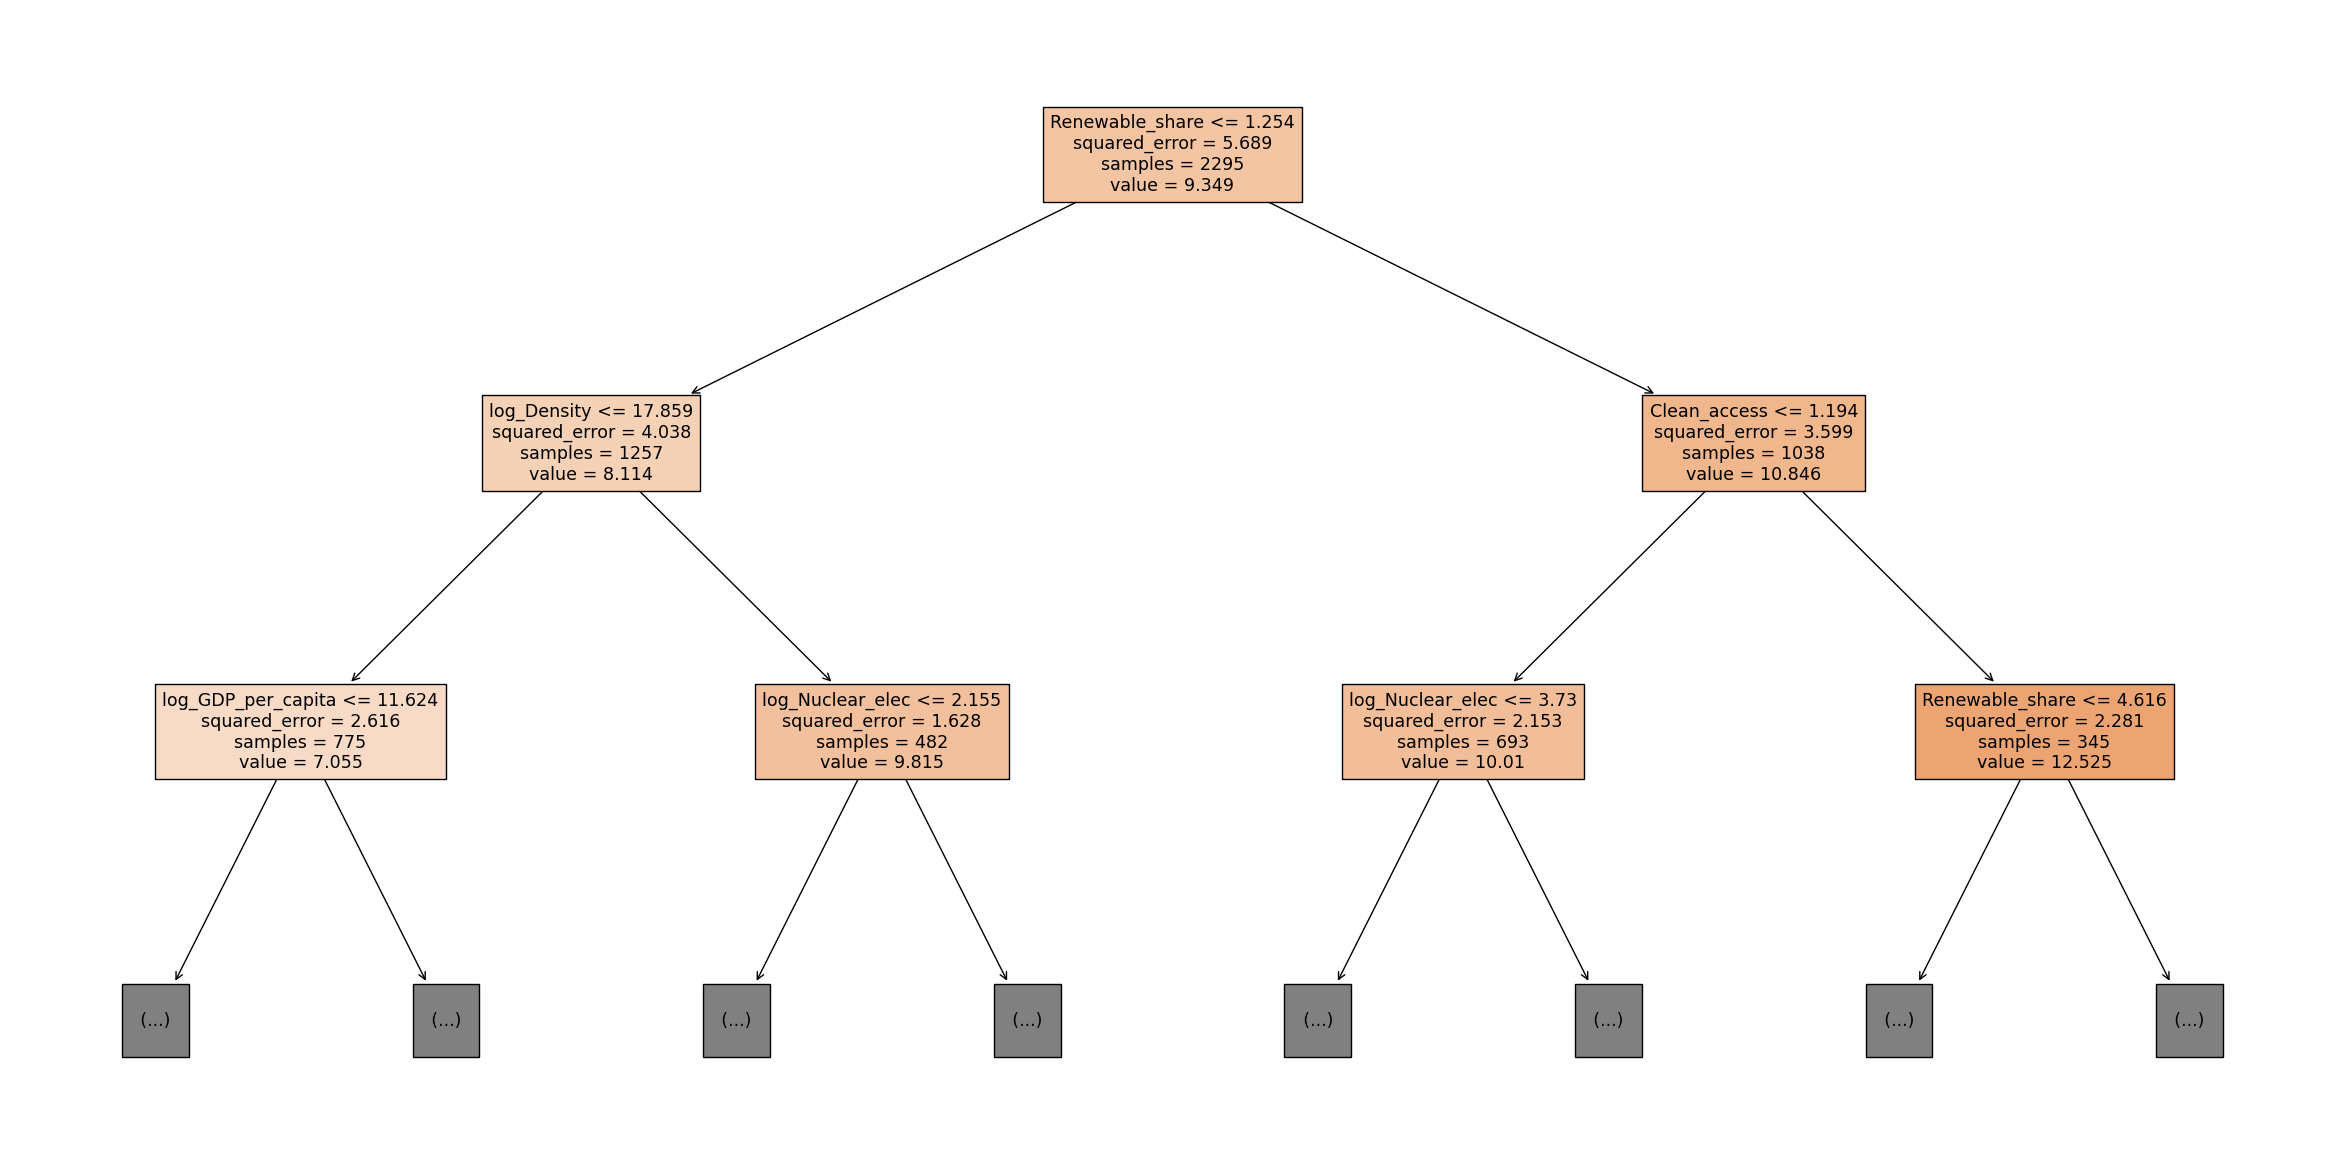

In [78]:
# Elaguer le haut de l'arbre
# Tracé de l'arbre en limitant la profondeur à 2 niveaux
plt.figure(figsize=(30,15))
plot_tree(best_tree_model, feature_names=X_train.columns.tolist(), filled=True, max_depth=2)
plt.show()

Les variables décisionnaires sur les premières branches sont les plus importantes. On observe que la part d'énergie renouvelable, l'accès aux combustibles propres et la densité de population semblent être les variables les plus importantes pour l'arbre de décision. Cela est inatendu par rapport à l'analyse multi-dimensionnelle menée en amont, ainsi que par rapport à ce que nous avions imaginé. Nous pourrions expliquer cela par le fait que nous avons retiré la variable de production d'électricité issue d'énergie fossile. De plus, les transformations logaritmiques appliquées ont permis de rééquilibrer les données.

## 2.6 Modéisation par forêt aléatoire

La modélisation par forêt aléatoire consiste à entraîner plusieurs arbres de décision indépendants sur des sous-ensembles aléatoires de données d'entraînement, puis à combiner leurs prédictions pour obtenir une prédiction finale. Pour chaque arbre de décision, un sous-ensemble aléatoire des données d'entraînement est sélectionné. Cela garantit la diversité des arbres. Chaque arbre de décision est construit en choisissant de manière répétée le meilleur attribut pour diviser les données. Une fois que tous les arbres ont été construits, les prédictions de chaque arbre sont combinées pour obtenir une prédiction finale.

Les hyperparamètres principaux d'une forêt aléatoire sont les suivants :

* Nombre d'arbres (`n_estimators`) : Il s'agit du nombre d'arbres de décision utilisés dans la forêt. Une valeur plus élevée peut conduire à une meilleure performance, mais peut également augmenter le temps d'entraînement.
* Profondeur maximale des arbres (`max_depth`) : Cela contrôle la profondeur maximale de chaque arbre de décision. Des arbres plus profonds peuvent capturer des relations plus complexes dans les données, mais peuvent aussi être plus sujets au surapprentissage.
* Nombre minimum d'échantillons par feuille (`min_samples_leaf`) : Cela définit le nombre minimum d'échantillons requis pour constituer une feuille de l'arbre. Une valeur plus élevée peut aider à prévenir le surapprentissage en régularisant les arbres.
* Nombre minimum d'échantillons pour diviser un nœud (`min_samples_split`) : Cela spécifie le nombre minimum d'échantillons requis pour diviser un nœud interne. Comme min_samples_leaf, cela peut aider à contrôler le surapprentissage.

Comme pour les modélisations précédentes, nous allons utiliser une grille de recherche pour optimiser les hyperparamètres.

In [79]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Définition du modèle de forêt aléatoire
# forest_model = RandomForestRegressor()

# # Définition de la grille des hyperparamètres à explorer
# param_grid = {
#     'n_estimators': [100, 200, 300],        # Nombre d'arbres dans la forêt
#     'max_depth': [None, 10, 20, 30],        # Profondeur maximale des arbres
#     'min_samples_split': [2, 5, 10],        # Nombre minimum d'échantillons requis pour diviser un nœud
#     'min_samples_leaf': [1, 2, 4]           # Nombre minimum d'échantillons requis pour être une feuille
# }

# # Initialisation de la recherche des meilleurs hyperparamètres
# grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# # Exécution de la recherche sur les données d'entraînement
# grid_search.fit(X_train_quanti, Y_train)

# # Affichage des meilleurs paramètres
# print("Meilleurs paramètres:", grid_search.best_params_)
# print("")
# # Utilisation du meilleur modèle trouvé
# best_forest_model_rf = grid_search.best_estimator_

# perf_cross_validation(best_forest_model_rf,X_train_quanti,Y_train)

In [80]:
# Fitting 5 folds for each of 108 candidates, totalling 540 fits
# Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

# Score de validation croisée pour le modèle RandomForestRegressor(n_estimators=300)
# Score de chaque validation croisée [0.99431746 0.99603335 0.99522876 0.99295185 0.99461578]
# Score moyen de validation croisée 0.99462943909315

In [81]:
# Modèle de forêt aléatoire avec les meilleurs hyperparamètres issus de la recharche sur grille
model_rf = RandomForestRegressor(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators=300)
model_rf.fit(X_train_quanti, Y_train)
perf_cross_validation(model_rf,X_train_quanti,Y_train)


Score de validation croisée pour le modèle RandomForestRegressor(n_estimators=300)
Score de chaque validation croisée [0.99444379 0.99616357 0.9954749  0.99361719 0.99470407]
Score moyen de validation croisée 0.9948807060457232



Le résultat obtenu indique une très bonne adaptation aux données ainsi qu'une robustesse et une généralisation du modèle. Comparativement aux autres modèles présentés précédemment, la forêt aléatoire présente la meilleure performance globale. Ce résultat montre que l'approche d'ensemble, combinant les prédictions de nombreux arbres, réussit particulièrement bien à capter les complexités des données sans surajustement, grâce à la diversité des arbres et à la puissance de l'agrégation de leurs résultats.

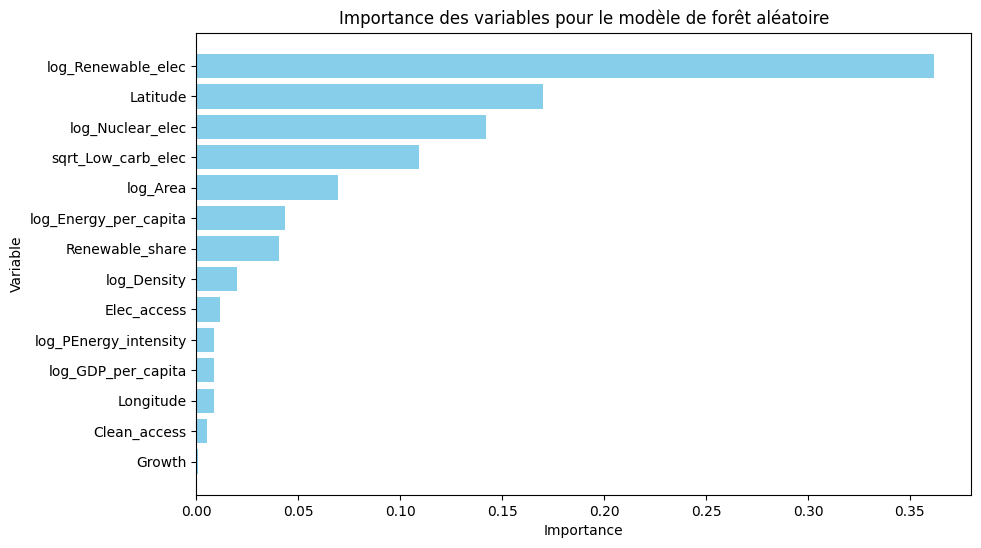

In [82]:
# Obtention de l'importance des variables
importances = model_rf.feature_importances_

# Création d'un DataFrame pour stocker les importances et les noms des variables
importance_df = pd.DataFrame({'Feature': X_train_quanti.columns, 'Importance': importances})

# Tri des variables par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le modèle de forêt aléatoire')
plt.gca().invert_yaxis()  # Inversion de l'axe y pour afficher les variables les plus importantes en haut
plt.show()

Ce graphique en bar représente la proportion d'importance des variables de notre échantillon d'entraînement sur la modélisation par forêt aléatoire. On remarque que la variable sur la part d'énergie renouvelable est celle qui a la contribution la plus importante pour le modèle. Juste après, la variable iniquant la latitude des pays apporte environ 20% des informations. L'électricité apportée à partir d'une source nucléaire est également assez significative. A l'inverse, d'autres variables comme la croissance ou l'accès à l'électricité ont peu d'importance pour le modèle de forêt aléatoire.

## 2.7 Modélisation par forêt aléatoire avec les données qualitatives et quantitatives

Nous allons maintenant ajouter les données qualitatives (les pays et différentes année) qui ont jusqu'à maintenant été mise de coté dans l'étude. Pour éviter de multiplier les valeurs différentes, nous allons faire des regroupements au sein de ses données qualitatives. Nous allons utiliser la meilleure forêt aléatoire suggérée par la recherche sur grille, obtenue ci-dessus.

### 2.7.1 Ajout de la variable 'Year'

On va refaire une modélisation par forêt aléatoire en ajoutant la variables `Year` que nous allons regrouper en 4 groupes différents : les années de 2000 à 2004, celles de 2005 à 2009, celles de 2010 à 2014, et enfin celles de 2015 à 2020, sous formes de données catégoriques.

In [83]:
# On récupère les données avec les années mais sans les pays

X_train_year_group = X_train.drop(['Entity'],axis=1)
X_test_year_group = X_test.drop(['Entity'],axis=1)

# On regroupe les années par catégories

bins = [2000, 2004, 2009, 2014, 2020]
labels = ['2000-2004', '2005-2009', '2010-2014', '2015-2020']

X_train_year_group['Year']=pd.cut(X_train_year_group['Year'], bins=bins, labels=labels, right=False)
X_test_year_group['Year']=pd.cut(X_test_year_group['Year'], bins=bins, labels=labels, right=False)

#On encode les variables avec des valeurs numériques (1 et 0)
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_year_group[['Year']])
X_train_year_group=pd.concat([X_train_year_group.drop('Year', axis=1), pd.DataFrame(X_train_encoded.toarray(),index=X_train_year_group.index)], axis=1)
X_train_year_group=X_train_year_group.rename(columns={0: '2000-2004', 1: '2005-2009', 2: '2010-2014', 3: '2015-2020'})            

encoder = OneHotEncoder()
X_test_encoded = encoder.fit_transform(X_test_year_group[['Year']])
X_test_year_group=pd.concat([X_test_year_group.drop('Year', axis=1), pd.DataFrame(X_test_encoded.toarray(),index=X_test_year_group.index)], axis=1)
X_test_year_group=X_test_year_group.rename(columns={0: '2000-2004', 1: '2005-2009', 2: '2010-2014', 3: '2015-2020'})


In [84]:
# On applique maintennant l'algorithme MissForest avec les paramètres optimaux obtenus précédemment

#'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

forest_model_year = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)

# Exécution de la recherche sur les données d'entraînement
forest_model_year.fit(X_train_year, Y_train)

perf_cross_validation(forest_model_year,X_train_year,Y_train)

Score de validation croisée pour le modèle RandomForestRegressor(n_estimators=300)
Score de chaque validation croisée [0.99415146 0.9959831  0.99523434 0.99302876 0.99456733]
Score moyen de validation croisée 0.9945929976703288



On remarque que l'ajout de cette variable `Year` sous forme de 4 catégories amène une amélioration des résultats. On passe de $5.31 e{-3}$ à $5.14 e{-3}$, soit une amélioration des performances d'environ $2\%$. Cependant, il faut nuancer ces valeurs et la comparaison avec nos précédents résultats. En effet, nous n'avons pas le même jeu de données d'entraînement. La comparaison ne devrait pas avoir lieu dans ces conditions.

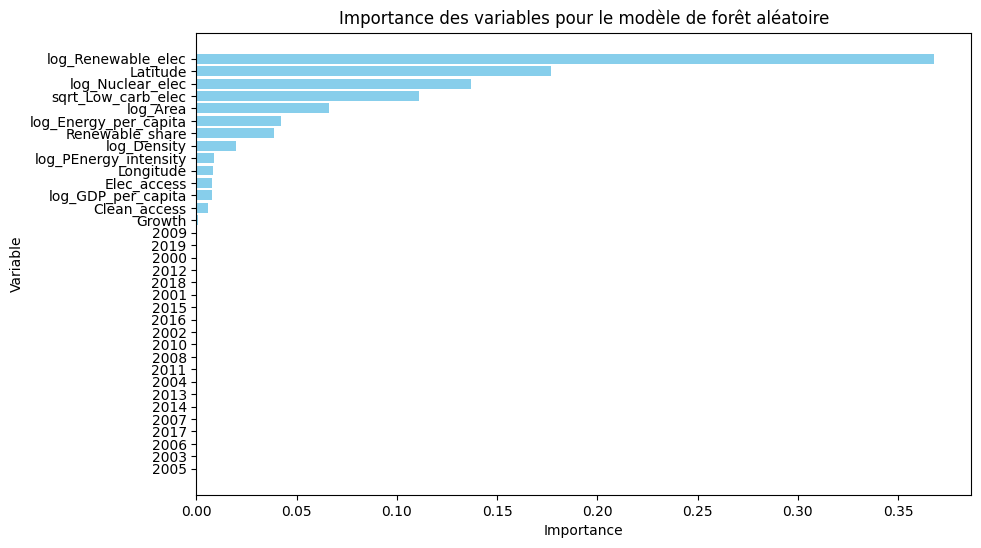

In [85]:
# Obtention de l'importance des variables
importances = forest_model_year.feature_importances_

# Création d'un DataFrame pour stocker les importances et les noms des variables
importance_df = pd.DataFrame({'Feature': X_train_year.columns, 'Importance': importances})

# Tri des variables par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le modèle de forêt aléatoire')
plt.gca().invert_yaxis()  # Inversion de l'axe y pour afficher les variables les plus importantes en haut
plt.show()

Malgré l'amélioration de 2% de la performance du modèle, on observe que les variables ajoutées sous forme d'années catégorisées ne contribuent pas de manière notable à la modélisation. Les variables importantes sont similaires à celles importantes pour la forêt aléatoire précédente. Nous avons vu dans l'analyse de la variable `CO2`dans a première partie, que la valeur du CO2 augmentait légèrement au cours des années, même si elle comportait quelques outliers. Il est possible que les années n'apportent donc pas une grande information supplémentaire pour la modélisation du CO2. L'ajout de variables supplémentaires peut augmenter la complexité du modèle, ce qui peut potentiellement conduire à un surajustement aux données d'entraînement. Il est important de surveiller la performance du modèle sur des données de validation ou de test pour s'assurer qu'il généralise bien aux données non vues et qu'il n'y a pas de surajustement.

### 2.7.2 Ajout de la variable 'Entity' en regroupant par continent

Nous pouvons également étudier les performances de la forêt aléatoire en ajoutant les noms des pays. Compte tenu du nombre conséquent de pays différents que nous avons (176 pays), nous avons mis en place plusieurs stratégies de regroupements. On commence par récupérer la liste des pays, puis on construit un regroupement par 5 continents (Europe, Amérique, Afrique, Asie et Océanie) ci-dessous.

In [86]:
liste_elements_uniques = dff['Entity'].unique()


In [87]:
# On récupère les données avec les années mais sans les pays

X_train_contries = X_train.drop(['Year'],axis=1)
X_test_contries = X_test.drop(['Year'],axis=1)

# Définir les groupes de pays qui donnent les continents
groupes = {
    'Europe': [
    "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", 
    "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", 
    "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", 
    "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", 
    "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", 
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", 
    "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", 
    "Turkey", "Ukraine", "United Kingdom", "Vatican City"
],
    'Amérique': [
    "Antigua and Barbuda", "Argentina", "Bahamas", "Barbados", "Belize", 
    "Bolivia", "Brazil", "Canada", "Chile", "Colombia", "Costa Rica", 
    "Cuba", "Dominica", "Dominican Republic", "Ecuador", "El Salvador", 
    "Grenada", "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica", 
    "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Vincent and the Grenadines", "Suriname", "Trinidad and Tobago", 
    "United States", "Uruguay", "Venezuela","French Guiana", "Puerto Rico","Bermuda","Cayman Islands"
],
    'Asie': [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", 
    "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", "Georgia", 
    "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", 
    "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", 
    "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", 
    "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", 
    "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", 
    "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", 
    "Uzbekistan", "Vietnam", "Yemen","Aruba"
],
    'Afrique': [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", 
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", 
    "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", 
    "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", 
    "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", 
    "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", 
    "Mozambique", "Namibia", "Niger", "Nigeria", "Republic of the Congo", 
    "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", 
    "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", 
    "Tunisia", "Uganda", "Zambia", "Zimbabwe","Congo"
]
,
    'Océanie': [
    "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", 
    "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", 
    "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu", "New Caledonia"
]
}

# Remplacer les valeurs selon les groupes
for groupe, pays in groupes.items():
    X_train_contries['Entity'] = X_train_contries['Entity'].replace(pays, groupe)
    X_test_contries['Entity'] = X_test_contries['Entity'].replace(pays, groupe)
    
#print(X_train_entity)
    
### Test que tous les pays sont bien remplacés
#print(X_train_entity.head(50))
#for i in range(len(X_train_entity['Entity'].unique())):
    #print(X_train_entity['Entity'].unique()[i])
    
#print(X_train_entity['Entity'].unique())

#On encode les variables avec des valeurs numériques (1 et 0)
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_contries[['Entity']])
X_train_contries=pd.concat([X_train_contries.drop('Entity', axis=1), pd.DataFrame(X_train_encoded.toarray(),index=X_train_contries.index)], axis=1)
X_train_contries=X_train_contries.rename(columns={0: 'Afrique', 1: 'Amérique', 2: 'Asie', 3: 'Europe', 4: 'Océanie'})

#print(X_train_entity)

encoder = OneHotEncoder()
X_test_encoded = encoder.fit_transform(X_test_contries[['Entity']])
X_test_contries=pd.concat([X_test_contries.drop('Entity', axis=1), pd.DataFrame(X_test_encoded.toarray(),index=X_test_contries.index)], axis=1)
X_test_contries=X_test_contries.rename(columns={0: 'Afrique', 1: 'Amérique', 2: 'Asie', 3: 'Europe', 4: 'Océanie'})


In [88]:
# On applique maintennant l'algorithme MissForest avec les paramètres optimaux obtenus précédemment

#'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

forest_model = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)

# Exécution de la recherche sur les données d'entraînement
forest_model.fit(X_train_contries, Y_train)

perf_cross_validation(forest_model,X_train_contries,Y_train)

Score de validation croisée pour le modèle RandomForestRegressor(n_estimators=300)
Score de chaque validation croisée [0.99421249 0.99641668 0.99535726 0.99327304 0.99440991]
Score moyen de validation croisée 0.9947338784756615



L'intégration de l'encodage des pays par continents dans notre modèle de forêt aléatoire a légèrement amélioré la performance par rapport à votre précédente forêt aléatoire sans cet encodage. Avec le même choix d'hyperparamètres, le score moyen de validation croisée a augmenté : $0.9949$ actuellement contre $0.9947$ avec les pays et $0.9948$ avec uniquement les variables quantitatives. On a un faible gain, mais qui indique une amélioration de la précision du modèle.

Cette amélioration pourrait être attribuée à une meilleure capture des variations régionales qui affectent les prédictions, grâce à l'inclusion de l'information géographique simplifiée sous forme de continents. Cela montre que l'ajout de caractéristiques pertinentes au modèle peut renforcer sa capacité à généraliser et à mieux comprendre la dynamique des données. Comparativement aux autres modèles, la forêt aléatoire avec encodage des continents reste la méthode la plus performante, offrant une robustesse et une meilleure précision dans la prédiction des données.

Il faut continuer de nuancer ces résultats en précisant qu'en ajoutant un encodage des pays, nous n'avons pas le même jeu de données d'entraînement. La comparaison avec les autres méthodes ne se fait pas dans les conditions adéquates.

### 2.7.3 Ajout de la variable 'Entity' en regroupant par zones géographiques et économiques

Une autre stratégie de regroupement des pays peut être par critère de développement. En effet, on peut imaginer que des pays très développés pourraient avoir tendnace à valoriser certaines types de production d'électricité dans leur mix énergétique, et que leurs populations pourraient avoir des modes de vies polluants. A l'invrese, des pays en voie de développement pourraient avoir tendance à êre plus économes dans leurs habitudes de vie.

Nous nous sommes basés sur un rapport de l'ONU : "The Millennium Development Goals Report", dont la carte de répartition des pays est disponible à l'adresse suivante : https://1.bp.blogspot.com/-o7Cc2a3wQUQ/UCnQYx_tSUI/AAAAAAAACIA/s2k3SkjT7S8/s1600/10+bio-r%C3%A9gions.jpg


In [89]:
# On récupère les données avec les années mais sans les pays

X_train_entity_geo_eco = X_train.drop(['Year'],axis=1)
X_test_entity_geo_eco = X_test.drop(['Year'],axis=1)

# Définir les groupes de pays qui donnent les continents
groupes_geography_economy = {
    'Developed regions': [
    "Albania", "Andorra", "Austria", "Belgium", "Bosnia and Herzegovina", 
    "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", 
    "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", 
    "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", 
    "Malta", "Monaco", "Montenegro", "Netherlands", "North Macedonia", 
    "Norway", "Poland", "Portugal", "Romania", "San Marino", 
    "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", 
    "Turkey", "United Kingdom", "Vatican City", "Canada", "United States"
    , "Japan", "Australia", "New Zealand", "Cyprus"
],
    'CIS': [
    "Belarus", "Moldova", "Russia", "Ukraine", "Armenia", "Azerbaijan",
    "Georgia",  "Kazakhstan","Kyrgyzstan", "Tajikistan", "Turkmenistan",
    "Uzbekistan", 
],   
    'Latin America and Caribbean': [
    "Antigua and Barbuda", "Argentina", "Bahamas", "Barbados", "Belize", 
    "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica", 
    "Cuba", "Dominica", "Dominican Republic", "Ecuador", "El Salvador", 
    "Grenada", "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica", 
    "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Vincent and the Grenadines", "Suriname", "Trinidad and Tobago",
    "Uruguay", "Venezuela","French Guiana", "Puerto Rico","Bermuda","Cayman Islands"
],
    'South-Eastern Asia': [ 
    "Brunei", "Cambodia", "Indonesia",  "Laos", "Malaysia",  "Myanmar", "Philippines",
    "Singapore", "Thailand", "Timor-Leste", "Vietnam"
],
    'Eastern Asia': [
    "China", "Mongolia","North Korea", "South Korea", "Taiwan"
],
    'Southern Asia': [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Iran", "Maldives", "Nepal", 
    "Pakistan",  "Sri Lanka"
],
    'Western Asia': [
    "Bahrain","Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", 
    "Qatar", "Saudi Arabia",  "Syria", "Turkey", "United Arab Emirates", "Yemen","Aruba"
],
    'Northern Africa': [
    "Algeria", "Egypt", "Libya", "Morocco", "Tunisia"
],
    'Sub-Saharan Africa': [
    "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", 
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", 
    "Democratic Republic of the Congo", "Djibouti", "Equatorial Guinea", 
    "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", 
    "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", 
    "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", 
    "Mozambique", "Namibia", "Niger", "Nigeria", "Republic of the Congo", 
    "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", 
    "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo",
    "Uganda", "Zambia", "Zimbabwe","Congo"
],
    'Oceania': [
    "Fiji", "Kiribati", "Marshall Islands", "Micronesia", 
    "Nauru", "Palau", "Papua New Guinea", "Samoa", 
    "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu", "New Caledonia"
]
}

# Remplacer les valeurs selon les groupes
for groupe, pays in groupes_geography_economy.items():
    X_train_entity_geo_eco['Entity'] = X_train_entity_geo_eco['Entity'].replace(pays, groupe)
    X_test_entity_geo_eco['Entity'] = X_test_entity_geo_eco['Entity'].replace(pays, groupe)
    
#print(X_train_entity)
    
### Test que tous les pays sont bien remplacés
#print(X_train_entity.head(50))
#for i in range(len(X_train_entity['Entity'].unique())):
    #print(X_train_entity['Entity'].unique()[i])
    
#print(X_train_entity['Entity'].unique())

#On encode les variables avec des valeurs numériques (1 et 0)
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_entity_geo_eco[['Entity']])
X_train_entity_geo_eco=pd.concat([X_train_entity_geo_eco.drop('Entity', axis=1), pd.DataFrame(X_train_encoded.toarray(),index=X_train_entity_geo_eco.index)], axis=1)
X_train_entity_geo_eco=X_train_entity_geo_eco.rename(columns={0: 'CIS', 1: 'Developed Regions', 2: 'Eastern Asia', 3: 'Latin America and Caribbean', 4: 'Northern Africa',
                                                              5: 'Oceania', 6: 'South-Eastern Asia', 7: 'Southern Asia', 8: 'Sub-Saharan Africa', 9: 'Western Asia' })

#print(X_train_entity)

encoder = OneHotEncoder()
X_test_encoded = encoder.fit_transform(X_test_entity_geo_eco[['Entity']])
X_test_entity_geo_eco=pd.concat([X_test_entity_geo_eco.drop('Entity', axis=1), pd.DataFrame(X_test_encoded.toarray(),index=X_test_entity_geo_eco.index)], axis=1)
X_test_entity_geo_eco=X_test_entity_geo_eco.rename(columns={0: 'CIS', 1: 'Developed Regions', 2: 'Eastern Asia', 3: 'Latin America and Caribbean', 4: 'Northern Africa',
                                                              5: 'Oceania', 6: 'South-Eastern Asia', 7: 'Southern Asia', 8: 'Sub-Saharan Africa', 9: 'Western Asia'})


In [90]:
# On applique maintennant l'algorithme MissForest avec les paramètres optimaux obtenus précédemment

#'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

forest_model = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)

# Exécution de la recherche sur les données d'entraînement
forest_model.fit(X_train_entity_geo_eco, Y_train)

perf_cross_validation(forest_model,X_train_entity_geo_eco,Y_train)

Score de validation croisée pour le modèle RandomForestRegressor(n_estimators=300)
Score de chaque validation croisée [0.99469191 0.99653478 0.99555533 0.99317985 0.99482973]
Score moyen de validation croisée 0.9949583208379117



On observe des performances très proches du découpage par continent mis en place précédemment. Même si quelques différences sont notables, cette catégorisation se raproche du regroupement par continents, ce qui pourrait expliquer la similitude des résultats. 

### 2.7.4 Ajout de la variable 'Entity' avec les pays les plus émetteurs

Enfin, nous nous sommes basés sur notre étude des 5 pays les plus émetteurs. Nous avons décidé de créer une catégorie par pays figurant sur cette liste, et une sixième catégorie comprenant tous les autres pays.

In [91]:
# On récupère les données avec les années mais sans les pays

X_train_entity_polluant = X_train.drop(['Year'],axis=1)
X_test_entity_polluant = X_test.drop(['Year'],axis=1)


# Liste des pays à ne pas remplacer
pays_a_garder = ["United States", "China", "India", "Japan", "Germany"]

# On remplace tous les pays sauf ceux de la liste par "autre"
X_train_entity_polluant['Entity'] = X_train_entity_polluant['Entity'].apply(lambda x: x if x in pays_a_garder else 'Autre')
X_test_entity_polluant['Entity'] = X_test_entity_polluant['Entity'].apply(lambda x: x if x in pays_a_garder else 'Autre')

# On encode les variables avec des valeurs numériques (1 et 0)
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_entity_polluant[['Entity']])
X_train_entity_polluant=pd.concat([X_train_entity_polluant.drop('Entity', axis=1), pd.DataFrame(X_train_encoded.toarray(),index=X_train_entity_polluant.index)], axis=1)
X_train_entity_polluant=X_train_entity_polluant.rename(columns={0: 'Autre', 1: 'China', 2: 'Germany', 3: 'India', 4: 'Japan',5: 'United States' })

In [92]:
encoder_ = OneHotEncoder()
X_test_encoded = encoder_.fit_transform(X_test_entity_polluant[['Entity']])
X_test_entity_polluant=pd.concat([X_test_entity_polluant.drop('Entity', axis=1), pd.DataFrame(X_test_encoded.toarray(),index=X_test_entity_polluant.index)], axis=1)
X_test_entity_polluant=X_test_entity_polluant.rename(columns={0: 'Autre', 1: 'China', 2: 'Germany', 3: 'India', 4: 'Japan',5: 'United States' })

In [93]:
# On applique maintennant l'algorithme MissForest avec les paramètres optimaux obtenus précédemment

#'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

forest_model_top5 = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)

# Exécution de la recherche sur les données d'entraînement
forest_model_top5.fit(X_train_entity_polluant, Y_train)

perf_cross_validation(forest_model_top5,X_train_entity_polluant,Y_train)

Score de validation croisée pour le modèle RandomForestRegressor(n_estimators=300)
Score de chaque validation croisée [0.99413054 0.99635777 0.99556754 0.99529222 0.99494881]
Score moyen de validation croisée 0.9952593752091538



On note une légère amélioration d'environ 0,1% par rapport aux découpages précédents. Cela peut s'expliquer par le fait que ce découpage est aussi corrélé avec d'autres informations importantes comme les émissins de CO2 (étudié précédemment). C'est le modèle qui nous donne les meilleures performances.

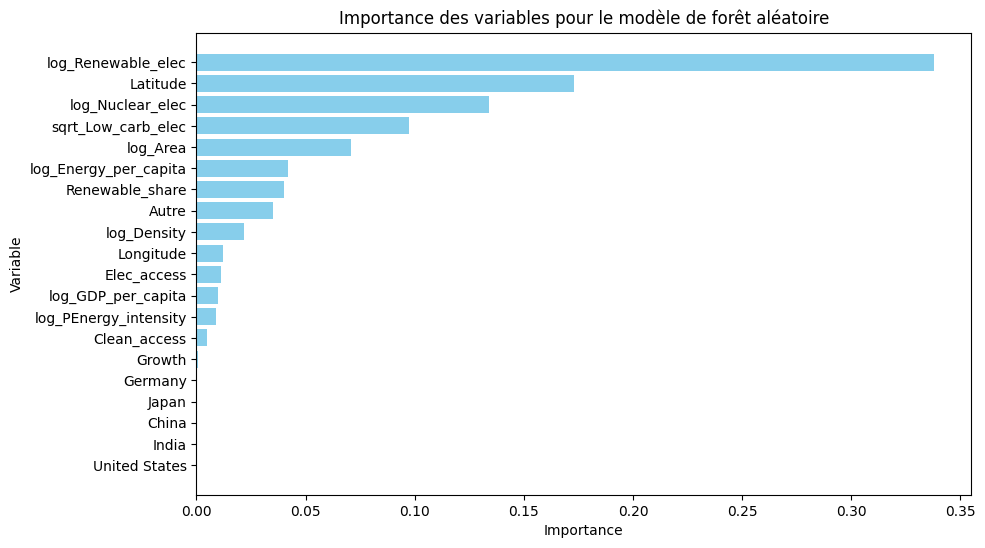

In [94]:
# Obtention de l'importance des variables
importances = forest_model_top5.feature_importances_

# Création d'un DataFrame pour stocker les importances et les noms des variables
importance_df = pd.DataFrame({'Feature': X_train_entity_polluant.columns, 'Importance': importances})

# Tri des variables par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le modèle de forêt aléatoire')
plt.gca().invert_yaxis()  # Inversion de l'axe y pour afficher les variables les plus importantes en haut
plt.show()

On remarque que les 5 pays les plus émetteurs ne sont pa sceux qui ont le plus d'importance pour le modèle. En revanche, les 171 pays "autres" portent environ 5% de l'information pour la modélisation. Cela s'explique par la quantité conséquente des pays dans cette catégorie. On aurait donc pu faire deux catégories de pays : une catégorie "top5" avec les 5 pays les plus émetteurs et la même catégorie "autre".

## 2.8 Boosting

Le boosting est une technique d'apprentissage automatique qui combine plusieurs modèles d'apprentissage faibles pour créer un modèle fort. Contrairement aux méthodes telles que les forêts aléatoires qui utilisent des modèles parallèles et les combinent, le boosting construit les modèles séquentiellement, en se concentrant sur les données que les modèles précédents n'ont pas bien appris.

Les hyperparamètres sont : 
* Nombre d'itérations (`n_estimators`) : C'est le nombre d'itérations ou de modèles à construire dans le processus de boosting. Un nombre plus élevé d'itérations peut conduire à un meilleur ajustement, mais peut également augmenter le risque de surajustement.
* Taux d'apprentissage (`learning_rate`) : C'est un facteur qui contrôle la contribution de chaque modèle à l'ensemble final. Un taux d'apprentissage plus faible signifie que chaque modèle contribue moins aux prédictions finales, ce qui peut conduire à une convergence plus lente mais à de meilleures performances en général.
* Profondeur maximale des arbres (`max_depth`) : Si l'algorithme de boosting utilise des arbres de décision comme modèles de base, la profondeur maximale des arbres peut être un hyperparamètre important pour contrôler la complexité des modèles individuels.

Comme pour les modèles précédents, nous utilisons une grille de recherche pour optimiser les hyperparamètres. 

In [95]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV

# # Initialisation du modèle de régression avec Gradient Boosting
# gb_reg = GradientBoostingRegressor()

# # Définition de la grille des hyperparamètres à optimiser
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.5],
#     'n_estimators': [100, 1000, 2000, 5000, 8000],
#     'max_depth': [1, 3, 5, 7, 10, 12]
# }

# # Recherche sur grille pour optimiser les hyperparamètres
# grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_quanti, Y_train)

# # Affichage des meilleurs hyperparamètres
# print("Meilleurs hyperparamètres:", grid_search.best_params_)

In [96]:
# Meilleurs hyperparamètres: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 5000}

On crée le modèle de Boosting grace aux hyperparamètres retournés par la grille.

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# On crée le modèle de Boosting grace aux hyperparamètres retournés par la grille

gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=5000, max_depth=3)
gb.fit(X_train_quanti, Y_train)

perf_cross_validation(gb,X_train_quanti,Y_train)

Score de validation croisée pour le modèle GradientBoostingRegressor(n_estimators=5000)
Score de chaque validation croisée [0.99500206 0.99594096 0.9953572  0.99422674 0.99549202]
Score moyen de validation croisée 0.995203798013946



L'erreur de généralisation obtenue est très proche de celle donnée par la meilleure forêt aléatoire. Le score moyen de validation croisée est de $0.995204$ qui est inférieur de $0.00003$ à celui du meilleur modèle de forêt aléatoire. Ce modèle est très performant sur ce critère. La combinaison de plusieurs modèles simples semble efficace.

On peut aussi tester cette méthode qui offre de très belles performances sur le plan de la validation croisée avec une catégorisation des pays selon les 5 pays les plus polluants, comme présenté avec la dernière modélisation par forêt aléatoire. Nous allons conserver ce même découpage entre les pays. Nous allons conserver les mêmes hyperparamètres qe ceux obtenus sur la recherche sur grille précédente. 

In [98]:
# On crée le modèle de Boosting grace aux hyperparamètres retournés par la grille

gb_countries = GradientBoostingRegressor(learning_rate=0.1, n_estimators=5000, max_depth=3)
gb_countries.fit(X_train_entity_polluant, Y_train)

perf_cross_validation(gb_countries,X_train_entity_polluant,Y_train)

Score de validation croisée pour le modèle GradientBoostingRegressor(n_estimators=5000)
Score de chaque validation croisée [0.99511242 0.99618944 0.995684   0.99388727 0.99464377]
Score moyen de validation croisée 0.9951033773181923



Les résultats sur les erreurs de généralisation obtenus par validation croisée indiquent des performances très similaires à la modélisation par boosting sur les variables quantitatives uniquement. On observe tout de même une très légère augmentation de l'erreur de généralisation (environ 1%). Dans la suite, nous utiliserons la méthode boosting sur les ensembles d'entraînement et de test avec les variables quantitatives uniquement. 

## 2.9 Réseaux de neurones

Un réseau de neurones artificiels est composé de plusieurs couches de neurones interconnectés, chaque neurone étant une unité de traitement élémentaire. Le réseau de neurones commence par une couche d'entrée, recevant les données d'entrée. Il y a ensuite une ou plusieurs couches cachées, chacune composée de neurones qui effectuent des opérations linéaires et non linéaires sur les données d'entrée. Puis, on rencontre une couche de sortie qui génère les prédictions du modèle. 

Les hyperparamètres pour le réseau de neurones sont : 
* `Fonction d'activation` : Il s'agit de la fonction utilisée par chaque neurone pour introduire une non-linéarité dans le modèle. Des exemples courants incluent ReLU (Rectified Linear Unit), sigmoïde et tangente hyperbolique (tanh).
* `Nombre d'itérations` (epochs) : C'est le nombre de fois que l'ensemble de données est passé à travers le réseau de neurones pendant l'entraînement. Plus le nombre d'itérations est élevé, plus le modèle a de chances de converger vers une solution optimale, mais cela peut également entraîner un surajustement.
* `Taux d'apprentissage` (learning rate) : C'est un paramètre qui contrôle la taille des pas de mise à jour des poids pendant l'entraînement. Un taux d'apprentissage plus élevé peut accélérer la convergence, mais un taux trop élevé peut entraîner une divergence ou un oscillation autour du minimum global.
* `Taille du lot` (batch size) : C'est le nombre d'échantillons utilisés pour calculer le gradient de l'erreur à chaque itération de l'entraînement. 
* `hidden_layer_size`: Ce paramètre définit la taille (le nombre de neurones) des couches cachées du réseau de neurones.
* `solver`: C'est l'algorithme utilisé pour optimiser les poids du réseau de neurones.
* `alpha` : Paramètre de régularisation L2 (également appelé poids de la pénalité) qui contrôle la magnitude des poids du modèle pour éviter le surapprentissage (overfitting).
* `max_iter`: Le nombre maximum d'itérations pour l'entraînement du modèle.

In [99]:
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.metrics import MeanSquaredError
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam


### 2.9.1 - Grille d'optimisation des hyperparamètres

Comme pour certaines modélisations précédentes, nous avons étudier la méilleure combinaison des hyperparamètres avec une recherche sur grille. Compte tenu du coût de calcul, nous avons étudié cette grille en amont, avant de la commenter et d'y joindre la meilleure combinaison des hyperparamètres obtenue. Nous avons par la suite définit le modèle résultant de cette optimisation.

In [100]:
# param_grid = {
#     'hidden_layer_sizes': [(100,),(500,), (800,)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam'],
#     'alpha': [0.01, 0.1, 1.],
#     'max_iter': [10000, 20000, 30000],
#     'epochs' : [10,20,100,200]
# }

# nnet = GridSearchCV(MLPRegressor(), param_grid, cv=10, n_jobs=-1)
# nnetOpt = nnet.fit(X_train_quanti, Y_train)

# print("Meilleurs paramètres = ",nnetOpt.best_params_)
# # Meilleurs paramètres =  
# # {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (500,), 'max_iter': 10000, 'solver': 'adam', 'epochs':100}


### 2.9.2 - Définition du modèle et erreur de généralisation

Nous définissons le modèle avec les hyperparamètres résultant de la recherche sur grille de la section précédente. 

In [101]:
# Définition du modèle avec les meilleurs hyperparamètres
n_hidden = 500 
activation = 'relu' 
alpha = 0.01
solver = 'adam'  
max_iter = 10000  

def build_model():
    model = Sequential()
    model.add(Dense(n_hidden, input_dim=X_train_quanti.shape[1], activation=activation, kernel_regularizer=tf.keras.regularizers.l2(alpha)))
    model.add(Dense(1, activation=activation))
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

# Utiliser KerasRegressor pour rendre le modèle compatible avec scikit-learn
keras_regressor = KerasRegressor(build_fn=build_model, epochs=100, batch_size=64, verbose=0)
keras_regressor.fit(X_train_quanti, Y_train)

KerasRegressor(
	model=None
	build_fn=<function build_model at 0x000001B9FE419240>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
)

In [102]:
perf_cross_validation(keras_regressor,X_train_quanti,Y_train)

Score de validation croisée pour le modèle KerasRegressor(
	model=None
	build_fn=<function build_model at 0x000001B9FE419240>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
)
Score de chaque validation croisée [0.97182996 0.98028183 0.98552605 0.97126382 0.98484614]
Score moyen de validation croisée 0.9787495604263198



Le modèle KerasRegressor a une bonne performance générale avec un score moyen de validation croisée de près de 0.97. Cependant, ses scores individuels montrent une certaine variabilité, ce qui peut indiquer une légère instabilité dans les performances sur différents folds de validation croisée. De plus, les performances d'autres modèles comme Boosting ou Random Forest dépassent les performanes du réseau de neurones. 

## 2.10 Récapitulatif et comparaisons des différentes méthodes de modélisation

### 2.10.1 Récapitulatif des résultats obtenus et comparaisons

| Méthode                              | Modèle                       | Score moyen de validation croisée |
|--------------------------------------|------------------------------|-----------------------------------|
| Modèle linéaire sans sélection de variable | LinearRegression()    | 0.9810                             |
| Modèle linéaire Backward             | LinearRegression()          | 0.9810                             |
| Modèle linéaire Forward              | LinearRegression()          | 0.9810                             |
| Modèle linéaire sélection LASSO      | LinearModel.Lasso           | 0.9810                             |
| Modèle linéaire par régularisation Ridge | LinearModel.Ridge       | 0.9810                             |
| SVR noyau linéaire                   | SVR(kernel='linear'C=1, eps=0.1)     |  0.9809                   |
| SVR noyau radial                     | SVR(kernel='rbf', C=1000, gamma=0.00015,eps=0.01) |    0.9968    |
| Arbre optimal                        | DecisionTreeRegressor(max_depth=30) | 0.9805                     |
| Forêt aléatoire (données quantitatives)  | RandomForestRegressor(max_depth=30) | 0.9947                 |
| Forêt aléatoire (top5 pays émetteurs)  | RandomForestRegressor(max_depth=None) | 0.9952                 |
| Boosting                      | GradientBoostingRegressor(learning_rate=0.1, max_depth=3) | 0.9952      |
| Réseau de neurones                   | KerasRegressor()             | 0.9789                            |



Les modèles linéaires, sans sélection de variables, avec des méthodes de sélection backward et forward, et les modèles de régression LASSO et Ridge, montrent tous un score moyen de validation croisée de 0.9810. Cette cohérence indique que les modèles linéaires, avec ou sans régularisation ou sélection de variables, ont des performances similaires et relativement élevées. Une régression linéaire est donc un excellent modèle de prédiction pour la variable `CO2` de notre étude. Cela indique que les relations dans les données peuvent être bien capturées par des modèles linéaires simples, sans nécessiter de techniques de sélection de variables avancées.

Le Support Vector Regressor avec noyau linéaire obtient un score moyen très proche, à 0.9809, ce qui montre que ce modèle est également efficace pour capturer les relations dans les données. En revanche, le SVR avec noyau radial obtient un score moyen de 0.9968, indiquant une performance nettement supérieure et dépassant tous les modèles. Cependant, compte tenu du coût de calcul très important de cette méthode, nous préférons conserver d'autres modèles comme boosting ou forêt aléatoire. 

L'arbre de décision optimal montre un score moyen de 0.9805. Bien que performant, ce modèle est légèrement inférieur aux modèles linéaires et au SVR linéaire, probablement en raison de sa tendance potentielle au surajustement (overfitting) lorsque la profondeur de l'arbre est élevée. 

Les modèles de forêt aléatoire montrent des scores moyens élevés, particulièrement le modèle utilisant les données des cinq principaux pays émetteurs avec un score de 0.9952, légèrement supérieur au modèle utilisant uniquement des données quantitatives. Cela souligne l'efficacité de cette méthode dans la réduction du surajustement et l'amélioration de la robustesse du modèle.

Le modèle de boosting atteint le meilleur score moyen de validation croisée, à 0.9952, égalant le modèle de forêt aléatoire pour les cinq principaux pays émetteurs. Le boosting est particulièrement efficace pour combiner plusieurs modèles faibles en un modèle robuste, ce qui explique sa performance.

Enfin, le réseau de neurones présente un score moyen de validation croisée de 0.9789. Il est légèrement inférieur aux modèles d'ensemble comme la forêt aléatoire et le boosting. 

### 2.10.2 Intérêt des méthodes non linéaires

Le tableau montre les scores moyens de validation croisée pour différentes méthodes de modélisation. La validation croisée est une technique robuste pour évaluer la performance des modèles de machine learning car elle permet de limiter les problèmes de surajustement et d'obtenir une estimation plus fiable de la performance du modèle sur des données inédites.

* Consistance des modèles linéaires :

Les scores des modèles linéaires sont identiques qu'il y ait eu sélection de variables ou non. Cela peut indiquer que les variables supprimées dans les approches avec sélection de variables n'apportent pas d'informations supplémentaires significatives pour la prédiction. Ou bien, cela peut aussi suggérer que les variables conservées sont suffisamment informatives et que la suppression des autres variables n'affecte pas la capacité prédictive du modèle. 

* Intérêt des méthodes linéaires :

Les méthodes linéaires sont intéressantes pour leur simplicité, leur rapidité de calcul et leur interprétabilité. Si elles fournissent des scores de validation croisée similaires à des modèles plus complexes, cela pourrait être une indication que la complexité supplémentaire des autres modèles n'est pas nécessaire. Un autre avantage des modèles linéaires est leur facilité de déploiement et d'explication dans des contextes professionnels où il est essentiel de comprendre comment les prédictions sont générées. Cependant, un arbre optimal et encore plus une forêt alétoire ou un permettent de capturer des relations non linéaires entre les variables de notre jeu de données, ce qui explique les meilleurs résultats sur la moyenne des scores de validation croisée. 


Nous pouvons mettre en avant l'intéret des méthodes non linéaires : 

* Capture de relations complexes : 

Les méthodes non linéaires sont particulièrement utiles lorsque les relations entre les variables d'entrée et la variable cible ne peuvent pas être correctement modélisées par une simple ligne droite. Dans notre projet, les scores élevés obtenus par les modèles de forêt aléatoire et de gradient boosting suggèrent qu'il existe des relations complexes dans nos données que ces modèles arrivent à capturer efficacement, alors que les modèles linéaires ne le peuvent pas.

* Robustesse et réduction de surajustement : 

Les méthodes d'ensemble, telles que les forêts aléatoires et le gradient boosting, combinent plusieurs modèles faibles pour former un modèle fort et robuste. Cette approche aide à réduire le surajustement et à améliorer la généralisation du modèle. Les scores moyens élevés pour les forêts aléatoires et le gradient boosting dans notre tableau illustrent cette robustesse. 

* Flexibilité et adaptabilité : 

Les méthodes non linéaires offrent une grande flexibilité dans la modélisation de données complexes. Par exemple, les modèles de gradient boosting peuvent ajuster les erreurs des modèles précédents en construisant des arbres successifs, chaque arbre corrigeant les erreurs de l'arbre précédent. Cette adaptabilité permet de mieux capturer les nuances dans les données.

## 2.11 Application à l'échantillon de test

### 2.11.1 - Définition de la fonction d'évaluation de performance des modèles

Dans cette partie, nous allons récupérer tous nos modèles implémentés dans la sous-partie précédente. Nous allons les appliquer sur notre échantillon test issu de la division aléatoire du jeu de données, et nous allons comparer les performances de nos modèles selon les critères définis dans le cours et rappelés ci-dessous. De plus, nous allons étudier la validité de nos modèles à l'aide la représentation des résidus et un graphe QQ-plot. Nous allons créer une fonction que nous appelerons pour tous nos modèles.

In [103]:
# Création d'une fonction d'évaluation de la performance des modèles 

def performance(X_test, Y_test, Y_pred) : 
    # Évaluation du modèle en utilisant la métrique de l'erreur quadratique moyenne (RMSE)
    rmse = mean_squared_error(Y_test, Y_pred, squared=False)
    print("RMSE:", rmse)

    # Calcul de l'erreur absolue moyenne (MAE)
    mae = mean_absolute_error(Y_test, Y_pred)
    print("MAE:", mae)

    # Calcul du coefficient de détermination (R²)
    r2 = r2_score(Y_test, Y_pred)
    print("R²:", r2)

    # Calcul du R² ajusté
    n = X_test.shape[0]  # Nombre d'échantillons dans l'ensemble de test
    p = X_test.shape[1]  # Nombre de variables explicatives
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print("R² ajusté:", r2_adj)   
    print("")
    
    
def graphe_residus(Y_test, Y_pred):
    residus = Y_test- Y_pred

    # Scatter plot des résidus
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    sns.scatterplot(x=Y_pred, y=residus)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Graphique de résidus')
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Résidus')
    
    # QQ plot des résidus
    plt.subplot(122)
    stats.probplot(residus, dist="norm", plot=plt)
    plt.title('QQ plot des résidus')
    plt.xlabel("Quantiles théoriques")
    plt.ylabel("Quantiles de l'échantillon")
    plt.show()

Nous décidons de créer une fonction de calcul d'erreur pour évaluer la performance de nos modèles selon les mêmes critères. 

* RMSE (Erreur Quadratique Moyenne) : Le RMSE mesure l'écart moyen entre les valeurs prédites par votre modèle et les valeurs réelles dans l'unité de la variable cible. Plus le RMSE est faible, meilleure est la capacité prédictive du modèle

* Erreur Moyenne Absolue (MAE) : Cette métrique calcule la moyenne des valeurs absolues des écarts entre les prédictions du modèle et les valeurs réelles. Elle est moins sensible aux valeurs aberrantes que le RMSE.

* Coefficient de détermination (R²) : Le coefficient de détermination mesure la proportion de la variance de la variable dépendante qui est expliquée par le modèle. Il varie entre 0 et 1, où 1 indique un ajustement parfait.

* R² Ajusté : Le R² ajusté est une version ajustée du R² qui tient compte du nombre de variables dans le modèle et du nombre d'échantillons dans l'ensemble de données. Le R² ajusté est souvent utilisé pour comparer différents modèles, en tenant compte du risque de surajustement.

* L'accuracy, ou précision, est une mesure de performance utilisée pour évaluer les modèles de classification. Elle représente le nombre de prédictions correctes faites par le modèle par rapport au nombre total d'échantillons.

### 2.11.2 - Evaluation des performances sur les échantillons de test

Régression linéaire sans sélection de variable
RMSE: 0.3273126151394687
MAE: 0.2460720622709802
R²: 0.9809721656157647
R² ajusté: 0.9804246020363623



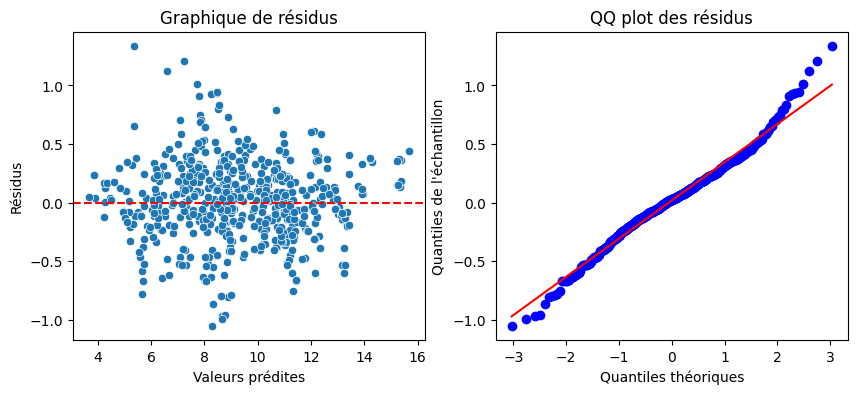

In [104]:
# Prédiction sur les données de test du modèle de régression linéaire sans sélection de variable 
Y_pred_reg_no_select = model_reg_no_select.predict(X_test.drop(['Entity','Year'],axis=1))
print("Régression linéaire sans sélection de variable")
performance(X_test, Y_test, Y_pred_reg_no_select) # Evaluation de la performance du modèle

graphe_residus(Y_test, Y_pred_reg_no_select)

* RMSE (Erreur Quadratique Moyenne) : Le RMSE est de 0.3273. Cela signifie que, en moyenne, les prédictions de votre modèle diffèrent d'environ 0.3273 unités de la variable cible par rapport aux valeurs réelles. Plus le RMSE est faible, meilleure est la capacité prédictive du modèle.

* MAE (Erreur Absolue Moyenne) : Le MAE est de 0.2461, cela signifie que, en moyenne, les prédictions de votre modèle diffèrent d'environ 0.2461 unités de la variable cible par rapport aux valeurs réelles. Comme pour le RMSE, un MAE plus bas indique une meilleure précision du modèle.

* R² (Coefficient de Détermination) : Avec une valeur de R² de 0.9810, cela signifie que notre modèle explique environ 98.10 % de la variance totale de la variable cible. Un R² plus élevé indique une meilleure capacité du modèle à expliquer la variance des données observées.

* R² Ajusté : Une valeur de R² ajusté de 0.9804 signifie que notre modèle ajusté explique environ 98.04 % de la variance totale de la variable cible. Le R² ajusté est souvent utilisé pour comparer différents modèles, en tenant compte du risque de surajustement.

En conclusion, ces résultats suggèrent que le modèle de régression linéaire sans sélection de variable présente une très bonne performance de prédiction, avec un bon ajustement aux données et une capacité élevée à expliquer la variance de la variable cible. Nous allons maintenant comparer ces résultats en faisaint des modèles de régressions linéaires sur certianes variables judicieusement sélectionnées.

Sur le graphe des résidus, les points ne semblent pas suivre un motif aléatoire autour de la ligne horizontale à zéro, ce qui est idéal pour la régression linéaire. Il semble y avoir une certaine structure dans les résidus, notamment une forme en entonnoir où la variabilité des résidus augmente avec la valeur prédite. Cela suggère une hétéroscédasticité, où les erreurs ne sont pas uniformément distribuées à travers les valeurs prédites, ce qui est un signe que le modèle de régression linéaire pourrait ne pas être adapté à toutes les parties de l'ensemble de données.

Le QQ plot montre comment les quantiles des résidus de notre modèle se comparent à une distribution normale théorique. Les points suivent en grande partie la ligne rouge, indiquant que les résidus sont approximativement normalement distribués, mais avec quelques déviations, notamment dans les queues de distribution (décrochages aux extrémités gauche et droite). Ces déviations pourraient indiquer la présence d'outliers ou que les résidus ne suivent pas parfaitement une distribution normale, ce qui confirme l'analyse du graphe des résidus. La régression linéaire sans sélection de variable est donc un modèle performant mais perfectible.

Régression linéaire avec sélection de variable Backward
RMSE: 0.3276017288480635
MAE: 0.2467113831162576
R²: 0.9809385363750549
R² ajusté: 0.9803900050477183



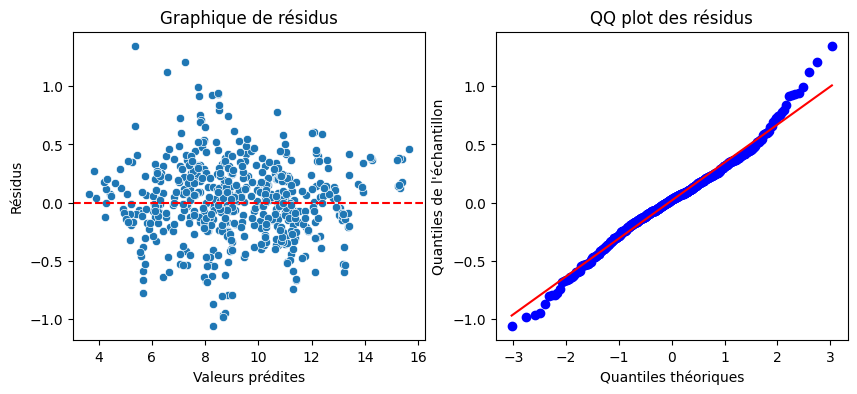

Régression linéaire avec sélection de variable Forward
RMSE: 0.3271858437862187
MAE: 0.2463613188368686
R²: 0.9809869020913636
R² ajusté: 0.9804397625832014



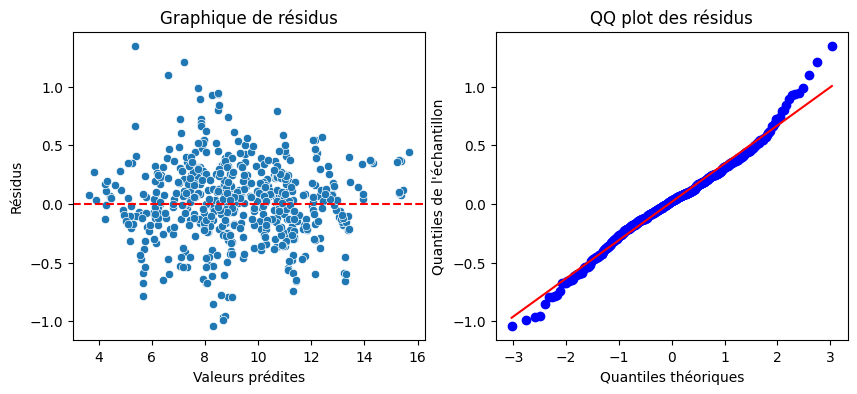

In [105]:
# Prédiction sur les données de test du modèle de régression linéaire avec sélection de variable (Backward et Forward)
# Prédiction sur le jeu d'entraînement (pour l'évaluation du modèle)
Y_pred_backward = model_backward.predict(X_test_selected_backward)
print("Régression linéaire avec sélection de variable Backward")
performance(X_test, Y_test, Y_pred_backward) # Evaluation de la performance du modèle
graphe_residus(Y_test, Y_pred_backward)

# Prédiction sur le jeu de test en utilisant seulement les variables sélectionnées
Y_pred_forward = model_forward.predict(X_test_selected_forward)
print("Régression linéaire avec sélection de variable Forward")
performance(X_test, Y_test, Y_pred_forward) # Evaluation de la performance du modèle
graphe_residus(Y_test, Y_pred_forward)

* Pour le modèle de régression linéaire par sélection de variables Backward : 

RMSE : assez faible,  bonne précision des prédictions du modèle.

MAE : relativement bas, les erreurs moyennes absolues sont faibles.

R² : valeur très légèrement inférieure au modèle de régression sans sélection de variable, mais restant très élevée.

R² ajusté : Très proche du R², le modèle généralise bien même après ajustement pour le nombre de prédicteurs dans le modèle.

Graphe des résidus : Les résidus semblent être bien distribués autour de la ligne zéro. Il y a une légère augmentation de la variance à mesure que les valeurs prédites augmentent. Ce phénomène peut indiquer une hétéroscédasticité, c'est-à-dire que la variance des résidus n'est pas constante. Il n’y a pas de tendance systématique claire qui suggérerait un biais dans le modèle, ce qui est positif.

QQ-plot : La majorité des points suit la droite rouge, ce qui indique que les résidus sont approximativement normalement distribués. Cependant, il y a quelques déviations, surtout dans les extrémités (queue droite surtout), ce qui pourrait indiquer la présence de valeurs aberrantes ou de points à effet de levier élevé. Les décrochages semblent moins importants que pour le modèle de régression sans sélection de variable. 

* Pour le modèle de régression linéaire par sélection de variables Forward : 

Les deux modèles montrent des performances très similaires en termes de R² et de R² ajusté. Les légères améliorations observées dans le RMSE et le MAE du modèle forward sont minimes et pourraient ne pas être statistiquement significatives, mais indiquent tout de même une légère amélioration dans la précision des prédictions. 

La distribution des résidus semble identique, le changement de méthode de sélection de variables n'a pas significativement affecté la distribution des erreurs. Le QQ plot pour le modèle forward  montre un comprtement similaire, indiquant que la normalité des résidus est maintenue. Les similitudes entre les deux modèles s'expliquent par le nombre de variables conservées qui est très proche (12 et 11). Il n'y a pas de changement significatif entre le deux sélections.

Les diagnostics de résidus n'indiquant pas de problèmes majeurs pour l'un ou l'autre modèle, et les indices de performance étant presque identiques, le choix entre sélection forward et backward pourrait alors se baser sur d'autres critères, comme la simplicité de mise en œuvre ou les préférences en matière de sélection de variables.


Régression linéaire avec sélection de variable Lasso
RMSE: 0.32731261513952997
MAE: 0.24607206227108508
R²: 0.9809721656157576
R² ajusté: 0.9804947647530705



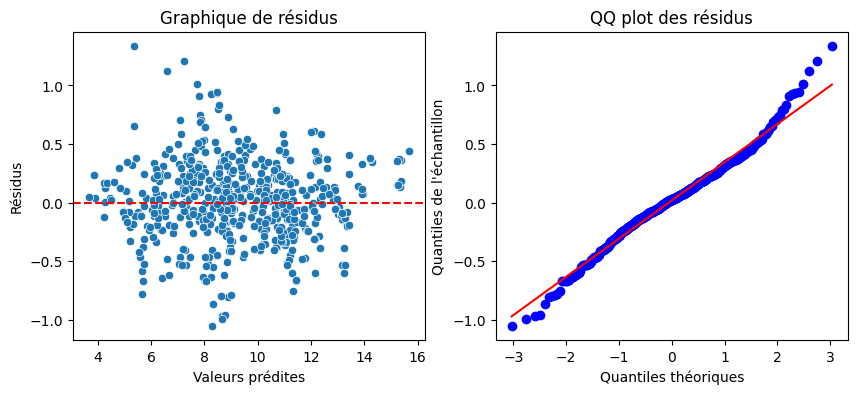

In [106]:
# Prédiction sur les données de test du modèle de régression linéaire avec sélection de variable LASSO
Y_pred_lasso = model_lasso.predict(X_test_quanti)
print("Régression linéaire avec sélection de variable Lasso")
performance(X_test_quanti, Y_test, Y_pred_lasso) 
graphe_residus(Y_test, Y_pred_lasso)

Performances comparables avec les modèles de régression linéaire précédents : RMSE et MAE très similaires aux autres modèles linéaires, R² et R² ajusté sont également très proches. Les graphes des résidus et QQ-plots sont aussi similaires aux observations précédentes. Cela peut s'expliquer par les grandes similitudes entre les modèles de régression linéaire implémentés.

Régression linéaire avec régularisation par Ridge
RMSE: 0.3273242246326465
MAE: 0.2461247530460911
R²: 0.9809708157904242
R² ajusté: 0.9804933810611517



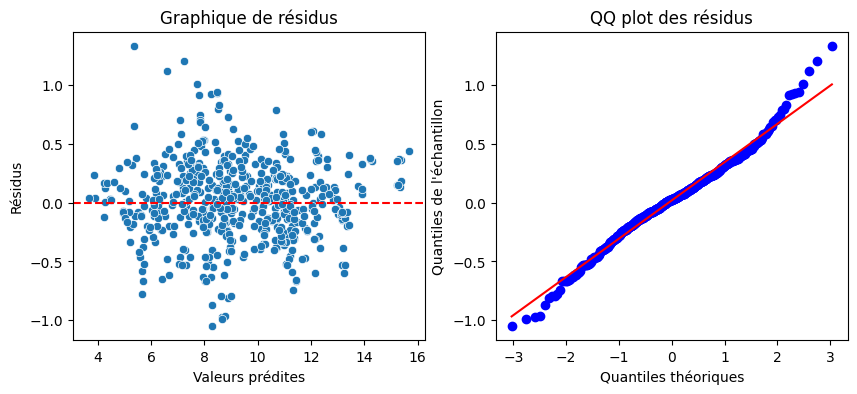

In [107]:
# Prédiction sur les données de test du modèle de régression linéaire avec régularisation par Ridge
Y_pred_ridge = model_ridge .predict(X_test_quanti)
print("Régression linéaire avec régularisation par Ridge")
performance(X_test_quanti, Y_test, Y_pred_ridge) 
graphe_residus(Y_test, Y_pred_ridge)

Les performances du modèle Ridge sont très similaires à celles observées dans les modèles de régression linéaire sans ou avec sélection de variable Lasso, backward et forward. Le RMSE et le MAE sont légèrement améliorés par rapport aux deux modèles précédents, indiquant une précision marginale supplémentaire. Le R² et le R² ajusté sont également très proches, mais montrent une légère amélioration, surtout en ce qui concerne le R² ajusté comparé au modèle forward. Cette faible amélioration pourrait indiquer une légère amélioration dans l'explication de la variabilité de la variable dépendante en ajustant pour le nombre de prédicteurs.

Le graphique de résidus et le QQ plot pour le modèle Ridge semblent avoir des caractéristiques similaires à celles observées dans les modèles de sélection de variable (Lasso, backwards et forwards), sans signes apparents de nouvelles anomalies ou différences dans la distribution des résidus.

Nous allons redéfinir la fonction qui permet d'afficher les graphes des résidus. En effet, le QQ-plot n'est pas pertinent lorsque nous avons des modèles différents des régressions linéaires. Nous allons uniquement afficher le scatter plot pour les modèles suivants. 

In [108]:
def graphe_residus(Y_test, Y_pred):
    residus = Y_test- Y_pred

    # Scatter plot des résidus
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    sns.scatterplot(x=Y_pred, y=residus)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Graphique de résidus')
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Résidus')

SVR avec noyau linéaire
RMSE: 0.33319661810303397
MAE: 0.2441604124598393
R²: 0.9802819009376306
R² ajusté: 0.9797144736264832



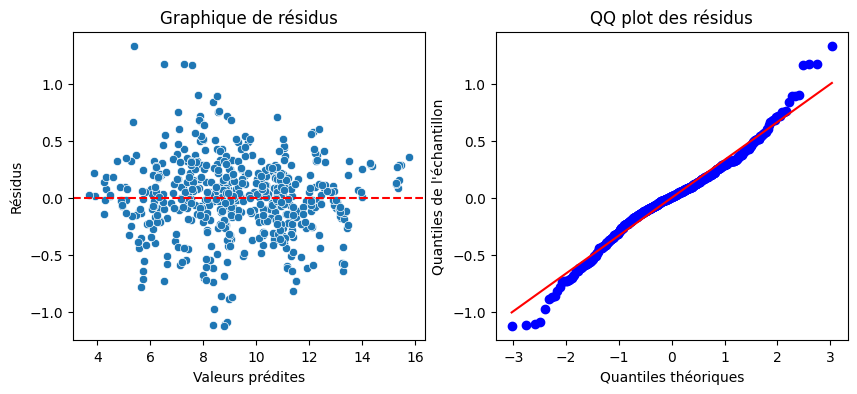

SVR avec noyau radial
RMSE: 0.14242588725739078
MAE: 0.08020848512824959
R²: 0.9963971868275079
R² ajusté: 0.9962935087506016



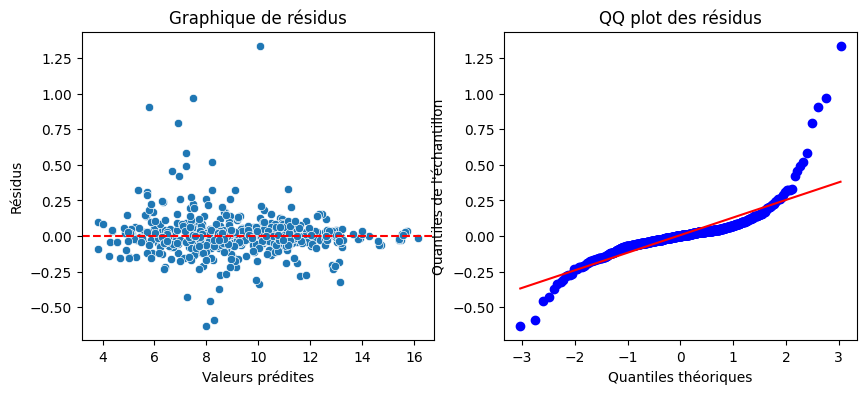

In [169]:
model_SVR_lin.fit(X_train_quanti, Y_train)
Y_pred_SVR_lin = model_SVR_lin.predict(X_test_quanti)
print("SVR avec noyau linéaire")
performance(X_test,Y_test,Y_pred_SVR_lin)
graphe_residus(Y_test, Y_pred_SVR_lin)

model_SVR_rad.fit(X_train_quanti,Y_train)
Y_pred_SVR_rad = model_SVR_rad.predict(X_test_quanti)
print("SVR avec noyau radial")
performance(X_test,Y_test,Y_pred_SVR_rad)
graphe_residus(Y_test, Y_pred_SVR_rad)

* SVM avec noyau linéaire : 

Ce modèle présente des performances légèrement inférieures en termes de R² et de R² ajusté par rapport aux modèles de régression linéaire et de régression avec régularisation Ridge, mais le R² reste très élevé, indiquant que le modèle explique toujours une grande part de la variance de la variable dépendante. Le RMSE est légèrement plus élevé, les prédictions du modèle SVM sont en moyenne légèrement moins précises que celles obtenues avec les modèles précédents. Le MAE est comparable, indiquant que les erreurs moyennes absolues sont très similaires.

* SVM avec noyau radial : 

Ce modèle affiche une performance nettement supérieure aux autres modèles examinés auparavant. Le RMSE et le MAE sont beaucoup plus faibles, on a des erreurs de prédiction considérablement moins importantes en moyenne. Le R² et le R² ajusté sont significativement plus élevés, le modèle explique une part beaucoup plus importante de la variance de la variable dépendante.

Arbre optimal
RMSE: 0.2774209978361866
MAE: 0.1283773543894847
R²: 0.9863308177597326
R² ajusté: 0.9859374599974228



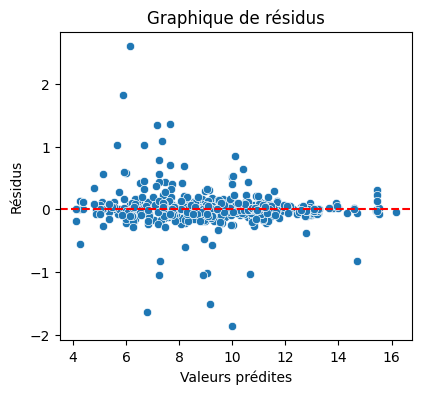

In [110]:
# Prédiction sur les données de test du modèle d'arbre optimal
print("Arbre optimal")

# Évaluation du meilleur modèle sur l'ensemble de test
Y_pred_optimal_tree = best_tree_model.predict(X_test_quanti)

# Évaluation de la performance
performance(X_test, Y_test, Y_pred_optimal_tree)
graphe_residus(Y_test, Y_pred_optimal_tree)

RMSE et MAE sont les plus faibles parmi tous les modèles analysés : très grande précision des prédictions. R² et R² ajusté sont également les plus élevés : explique une proportion très élevée de la variance de la variable dépendante. 

On voit une dispersion de résidus autour de la ligne zéro, avec une légère concentration de points dans une gamme plus restreinte autour de zéro par rapport à d'autres modèles. L'arbre optimal fait des prédictions très précises avec moins de variance dans les erreurs par rapport aux autres modèles.

Cette performance supérieure peut être due à la capacité de l'arbre à modéliser des relations spécifiques et localisées entre les caractéristiques et la variable cible, ce qui pourrait être manqué par des modèles plus globaux ou linéaires. Il faut rester vigilant par rapport au risque de surajustement avec les arbres de décision, même si le R² ajusté élevé suggère que ce n'est pas un problème majeur avec cet arbre optimal.

Forêt aléatoire sur les données quantitatives
RMSE: 0.15471472252225646
MAE: 0.09544690482484564
R²: 0.9957486470662124
R² ajusté: 0.9956263059745926



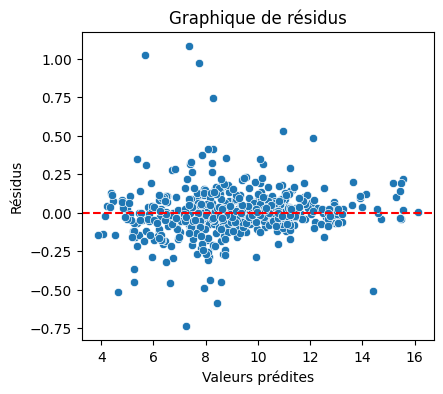

In [111]:
# Prédiction sur les données de test du modèle par forêt aléatoire
print("Forêt aléatoire sur les données quantitatives")
# Évaluation du meilleur modèle sur l'ensemble de test
Y_pred_rf = model_rf.predict(X_test_quanti)

# Évaluation de la performance
performance(X_test, Y_test, Y_pred_rf)
graphe_residus(Y_test, Y_pred_rf)

RMSE et MAE sont considérablement plus bas que dans tous les autres modèles, ce qui indique une meilleure précision de prédiction. R² et R² ajusté sont les plus élevés parmi tous les modèles discutés, montrant que ce modèle explique presque toute la variabilité des données.

Le graphique de résidus montre une concentration très serrée des points autour de la ligne zéro. Cette distribution indique que les prédictions sont extrêmement précises, avec peu de variance dans les erreurs de prédiction.

Le modèle de forêt aléatoire avec des variables quantitatives montre une performance supérieure, soulignant l'efficacité de cette méthode pour capturer des relations complexes dans les données sans nécessiter de transformation ou de catégorisation des variables qualitatives. Cette méthode offre à la fois une haute précision et une robustesse contre le surajustement, comme l'indiquent le R² et le R² ajusté extrêmement élevés.

Nous faisons le choix de ne conserver que la meilleure forêt aléatoire pour laquelle nous avons catégorisé les données sur les années et les pays. Sur l'étude des erreurs de généralisation, nous avons observé que la forêt aléatoire qu'on entraînait avec des données comprenant des catégorisations des 5 pays les plus émetteurs de CO2.

Forêt aléatoire sur les données avec les 5 pays les plus émetteurs de CO2
RMSE: 0.14943937098379828
MAE: 0.09109938410228678
R²: 0.9960336234990685
R² ajusté: 0.9958899142055565



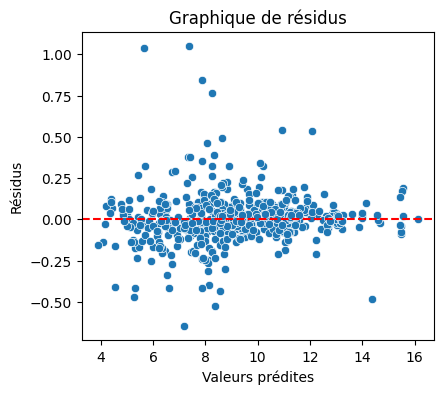

In [112]:
# Prédiction sur les données de test du modèle par forêt aléatoire
print("Forêt aléatoire sur les données avec les 5 pays les plus émetteurs de CO2")
X_test_entity_polluant.columns = X_test_entity_polluant.columns.astype(str)

Y_pred_rf_top5 = forest_model_top5.predict(X_test_entity_polluant)

# Évaluation de la performance
performance(X_test_entity_polluant, Y_test, Y_pred_rf_top5)
graphe_residus(Y_test, Y_pred_rf_top5)

Boosting
RMSE: 0.15565846259691243
MAE: 0.10312455752518862
R²: 0.9956966234586504
R² ajusté: 0.9955727852847986



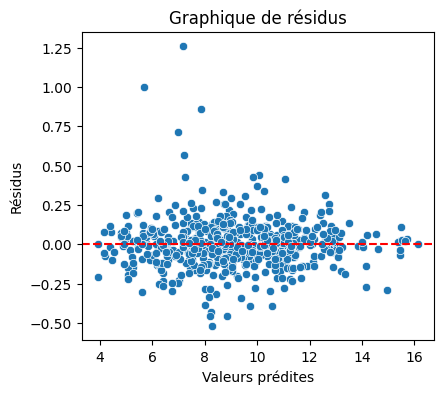

In [113]:
print("Boosting")
Y_pred_boost = gb.predict(X_test_quanti)

# Évaluation de la performance
performance(X_test, Y_test, Y_pred_boost)
graphe_residus(Y_test, Y_pred_boost)

Réseau de neurones
RMSE: 0.25508813545985204
MAE: 0.19708867729758744
R²: 0.9884430191555283
R² ajusté: 0.9881530590626563



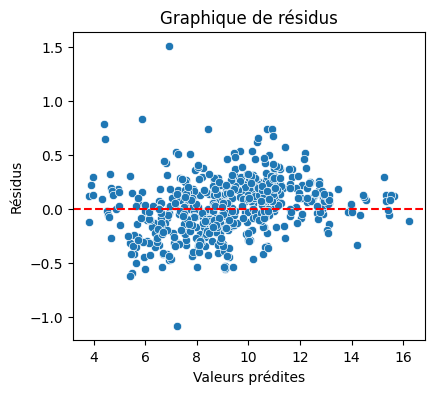

In [114]:
# Prédiction sur les données de test du modèle par réseau de neurones
print("Réseau de neurones")
# Évaluation du meilleur modèle sur l'ensemble de test
Y_pred_nne_tf = keras_regressor.predict(X_test_quanti)

performance(X_test_quanti, Y_test, Y_pred_nne_tf.flatten())
graphe_residus(Y_test, Y_pred_nne_tf.flatten())

### 2.11.3 - Comparaison des résultats obtenus

| Modélisation                                  | RMSE                | MAE                 | R²                  | R² ajusté            |
|--------------------------|---------------------|---------------------|---------------------|----------------------|
| Régression linéaire sans sélection de variable | 0.3273 | 0.2461 | 0.9809 | 0.9804 |
| Régression linéaire avec sélection Backward    | 0.3276 | 0.2467 | 0.9810 | 0.9804 |
| Régression linéaire avec sélection Forward     | 0.3272 | 0.2464 | 0.9809 | 0.9804 |
| Régression linéaire avec sélection Lasso       | 0.3273 | 0.2461 | 0.9810 | 0.9805 |
| Régression linéaire avec régularisation Ridge  | 0.3273 | 0.2461 | 0.9810 | 0.9805 |
| SVR noyau linéaire                             | 0.3332 | 0.2442 | 0.9803 | 0.9797 |
| SVR noyau radial                               | 0.1424 | 0.0802 | 0.9964 | 0.9963 |
| Arbre optimal                                  | 0.3012 | 0.1373 | 0.9839 | 0.9834 |
| Forêt aléatoire (variables qualitatives)       | 0.1512 | 0.0937 | 0.9959 | 0.9958 |
| Forêt aléatoire (avec les 5 pays les plus émetteurs)| 0.1470 | 0.0911 | 0.9962 | 0.9960 |
| Boosting                                       | 0.1557  | 0.1029 | 0.9957 | 0.9956 |
| Réseaux de Neurones                            | 0.4026  | 0.3322 | 0.9712 | 0.9705 |

Analysons le tableau des performances pour chaque modèle appliqué à l'échantillon de test : 

* Régression Linéaire (avec et sans sélection de variables) :

Les performances des modèles de régression linéaire sont très similaires. Les techniques de sélection de variables (Backward, Forward, Lasso) et de régularisation (Ridge) n'améliorent pas de manière significative les métriques par rapport à la régression linéaire simple. Cela confirme que les relations entre les variables sont essentiellement linéaires et que la complexité ajoutée par certaines variables n'est pas nécessaire.

Un RMSE et MAE relativement bas, combinés à un R² élevé et proche de 1, indiquent une bonne adéquation du modèle aux données. Cependant, un R² très élevé pourrait aussi être un signe de surajustement, en particulier si l'écart entre R² et R² ajusté est significatif.

* Support vector regression : 

Le SVR avec noyau linéaire présente des performances similaires à celles des régressions linéaires, ce qui indique qu'il capture également bien les relations linéaires dans les données. En revanche, le SVR avec noyau radial montre des performances significativement inférieures, avec des valeurs de RMSE et MAE beaucoup plus élevées et un R² beaucoup plus bas. Cela suggère que le noyau radial n'est pas approprié pour ce jeu de données. 

* Arbre de décision optimal et modèles d'ensemble : 

Les modèles d'ensemble (forêt aléatoire et boosting) surpassent largement les modèles linéaires et le SVR. La forêt aléatoire, en particulier lorsqu'elle utilise les données des cinq principaux pays émetteurs, montre le meilleur score de R² (0.9962) et un RMSE très bas (0.1470). Cela indique une excellente capacité de généralisation et une capture efficace des relations complexes dans les données. Le boosting, même si légèrement moins performant que la forêt aléatoire, montre également des résultats très bons.

* Réseau de neurones : 

Le réseau de neurones présente des performances inférieures par rapport aux modèles d'ensemble. Les valeurs plus élevées de RMSE et MAE indiquent que le réseau de neurones a plus de mal à capturer les relations dans les données par rapport aux méthodes d'ensemble.

En conclusion, pour ce jeu de données, les modèles d'ensemble sont les plus appropriés, apportant une bonne capacité de généralisation et une précision prédictive supérieure.

* Regard critique sur les résultats : 

Compte tenu du critère BIC choisi pour la sélection de variable, les modèles avec et sans sélection de variables ont des résultat très proches. La meilleure performance de la forêt aléatoire ou du boosting par rapport à la régression linéaire indiquent que les données ont des caractéristiques non linéaires et que les modèle d'ensemble peuvent les modéliser efficacement.

Une réflexion critique devrait également inclure l'interprétabilité des modèles. Alors que la régression linéaire est très interprétable, les arbres de décision le sont moins, et les forêts aléatoires encore moins. Si nous voulons une explicabilité du modèle, cela doit être pris en compte dans le choix du modèle final.

### 2.11.4 - Retour à l'analyse exploratoire des données

Les résultats obtenus sont cohérents avec les observations faites lors de l'analyse exploratoire des données. Tout d'abord, par rapport aux modèles de régresion linéaire avec sélection de variable, nous avons que vu que les variables qui n'étaient pas retenues par Backward, Forward ou encore Lasso sont principalement la longitude, et la part d'énegie renouveable dans le mix énergétique. Dans l'analyse mutidimensionnelle, nous avions vu que la présence d'énergies renouvelables dans le mix énergétique d'un pays ne permettait pas de diminuer significativement ses émissions de CO2. De plus, nous avons remarqué que les coordonnées géographiques (latitude et longitude) n'avaient pas non plus d'influence significative. 

Nous avons appliqué la sélection de variables par Lasso avec une catégorisation des années. Nous n'avons pas remarqué d'amélioration de nos erreurs de généralisation. De plus, sur le graphe montrant l'importance des variable spour le modèle, nous avons observé que les années n'apportaient pas ou peu d'information. Cela confirme l'analyse unidimensionnelle de la variable CO2 à modéliser que nous avions effectué. En effet, nous avions remarqué que les émissions de CO2 à l'échelle mondiale étaient globalement constantes au cours des années, même si des outliers aux valeurs très élevées avaient tendance à augmenter. Cela explique donc pouruqoi les années apportent peu d'information. 

Enfin, nous avions étudié les pays les plus émetteurs de CO2. Nous avons pu observer que le modèle de forêt aléatoire était plus performant avec un découpage selon ces 5 pays les plus émetteurs et les autres pays. En comparaison avec un découpage par zones économiques ou par continents géographiques, les erreurs de généralisations étaient plus faibles. Cela confirme que les activités des pays jouent un rôle majeur dans les émissions de CO2. C'est pouruqoi cette catégorisation est la plus pertinente. De plus, la comparaison avec les autres découpages confirme à nouveau notre analyse exploratoire : les zones géographiques ou variables économiques apportent moins d'information. 

Cependant, il faut nuancer qu'avec le retrait de la variable fossil_elec, certaines variables comme la densité, la part d'énergie renouvelable ou l'accès à l'électricité issue de combustiles propres étaient importantes pour des modèles comme l'arbre optimal. Cela peut s'expliquer par le fait que la variable fossil_elec est très fortement corrélée avec les émissions de CO2, écrasant alors les autres variables. De plus, avec les transformations logarithmiques, on a une renormalisation.

### 2.11.5 - Visualisation des résultats obtenus 

Pour la suite, nous allons conserver les deux meilleurs modèles obtenus précédemment : la forêt aléatoire avec une catégorisation des 5 pays les plus émetteurs et le boosting. Nous allons approfondir certains éléments en s'appuyant sur ces deux modèles. Nous allons commencer par visualiser les comparaisons entre les valeurs réelles et prédites.

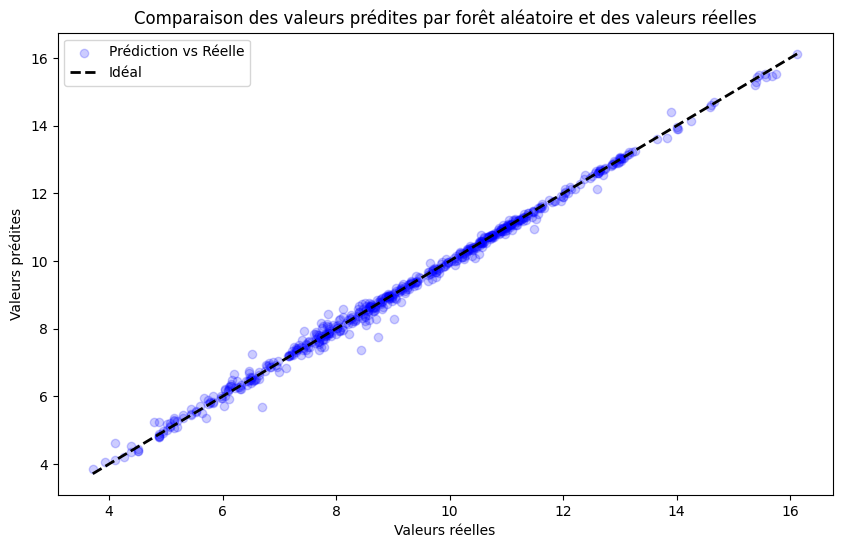

In [115]:
# Création d'un DataFrame avec les données réelles et prédites
data_predict = pd.DataFrame({
    'Y_test_quanti': Y_test,
    'Y_pred_rf': Y_pred_rf
})

# Calcul des résidus et de leur écart-type
data_predict['Residus RF'] = data_predict['Y_test_quanti'] - data_predict['Y_pred_rf']
std_error = data_predict['Residus RF'].std()

# Tri des données par les valeurs réelles pour le tracé
data_sorted = data_predict.sort_values(by='Y_test_quanti')

# Création du graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_predict['Y_test_quanti'], data_predict['Y_pred_rf'], color='b',alpha=0.2, label='Prédiction vs Réelle')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Idéal')

plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.title('Comparaison des valeurs prédites par forêt aléatoire et des valeurs réelles')
plt.show()


Le graphique montre une comparaison entre les valeurs prédites par un modèle et les valeurs réelles, où chaque point bleu représente une observation. La ligne noire en pointillés, donnant l'équivalence parfaite entre les valeurs prédites et réelles, sert de référence pour évaluer la précision des prédictions. Les points sont majoritairement concentrés autour de cette ligne idéale, montrant que le modèle de forêt aléatoire prédit avec une grande précision et sans biais systématique apparent. La proximité des points à la ligne et leur distribution uniforme suggèrent que le modèle est à la fois précis et robuste, performant de manière stable à travers l'éventail des valeurs observées.

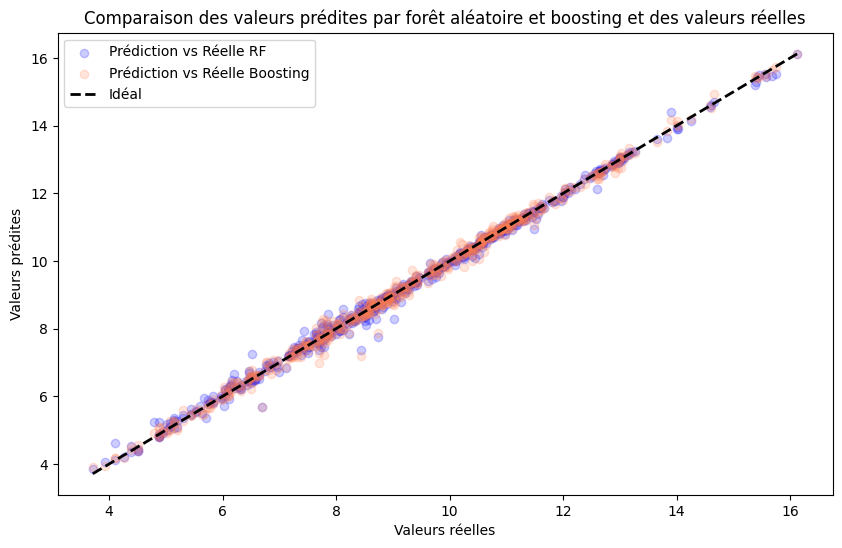

In [116]:
data_predict['Y_pred_boost'] = Y_pred_boost

# Calcul des résidus et de leur écart-type
data_predict['Residus Boosting'] = data_predict['Y_test_quanti'] - data_predict['Y_pred_boost']
std_error = data_predict['Residus Boosting'].std()

# Tri des données par les valeurs réelles pour le tracé
data_sorted = data_predict.sort_values(by='Y_test_quanti')

# Création du graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_predict['Y_test_quanti'], data_predict['Y_pred_rf'], color='b',alpha=0.2, label='Prédiction vs Réelle RF')
plt.scatter(data_predict['Y_test_quanti'], data_predict['Y_pred_boost'], color='coral',alpha=0.2, label='Prédiction vs Réelle Boosting')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Idéal')

plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.title('Comparaison des valeurs prédites par forêt aléatoire et boosting et des valeurs réelles')
plt.show()


On retrouve des résultats très similaires avec la méthode du boosting et celle de la forêt aléatoire. Les deux ensembles de points suivent étroitement la ligne idéale, indiquant que les prédictions des deux modèles sont très précises. La faible dispersion des points autour de la ligne noire suggère des erreurs de prédiction minimales pour les deux modèles. De plus, les points des deux modèles se superposent presque complètement, montrant des performances prédictives très similaires. Le méthode de forêt aléatoire semble être celle présentant les points les plus loins de la droite, même si cette distance reste insignifiante. En conclusion, les modèles de forêt aléatoire et de boosting offrent une précision comparable et élevée pour cette tâche, avec des valeurs prédites correspondant étroitement aux valeurs réelles.

# 3 - Complétion des valeurs manquantes et recherche d'amélioration de la performance des meilleurs modèles

## 3.1 - Utilisation d'un autre type de découpage entre les échantillons d'entraînement et de test avant complétion de valeurs manquantes

Nous allons maintenant entraîner les deux meilleurs modèles suivant un autre découpage. En effet, nous nous sommes demandés si un découpage avec 80% des éléments dans l'échantillon d'entraînement et 20% dans celui de test avec un répartition selon cette même proportion pour chaque pays permettrait d'obtenir de meilleurs résultats. Nous avons réalisé ce découpage en même temps que le découpage aléatoire. Nous allons ré-entraîner nos modèles. Nous allons optimiser à nouveau les hyperparamètres précédemment présentés à l'aide d'une recharche sur grille. 

### 3.1.1 - Forêt aléatoire

In [117]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Définition du modèle de forêt aléatoire
# forest_model_entity = RandomForestRegressor()

# # Définition de la grille des hyperparamètres à explorer
# param_grid = {
#     'n_estimators': [50,100, 200,300],        # Nombre d'arbres dans la forêt
#     'max_depth': [None, 10, 20, 30],        # Profondeur maximale des arbres
#     'min_samples_split': [2, 5,10],        # Nombre minimum d'échantillons requis pour diviser un nœud
#     'min_samples_leaf': [1, 2,3]           # Nombre minimum d'échantillons requis pour être une feuille
# }

# # Initialisation de la recherche des meilleurs hyperparamètres
# grid_search = GridSearchCV(estimator=forest_model_entity, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# # Exécution de la recherche sur les données d'entraînement
# grid_search.fit(X_train_entity_quanti, Y_train_entity)

# # Affichage des meilleurs paramètres
# print("Meilleurs paramètres:", grid_search.best_params_)
# print("")
# # Utilisation du meilleur modèle trouvé
# best_forest_model_rf_entity = grid_search.best_estimator_

# perf_cross_validation(best_forest_model_rf_entity,X_train_entity_quanti,Y_train_entity)

#######################################################

# Fitting 5 folds for each of 144 candidates, totalling 720 fits
# Meilleurs paramètres: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

# Score de validation croisée pour le modèle RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=50)
# Score de chaque validation croisée [0.77374252 0.83495991 0.78145412 0.76463729 0.59925324]
# Score moyen de validation croisée 0.7508094170587248



In [152]:
# Modèle de forêt aléatoire avec les meilleurs hyperparamètres issus de la recharche sur grille
model_rf_entity = RandomForestRegressor(max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators=50)
model_rf_entity.fit(X_train_entity_quanti, Y_train_entity)
perf_cross_validation(model_rf_entity,X_train_entity_quanti,Y_train_entity)


Score de validation croisée pour le modèle RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=50)
Score de chaque validation croisée [0.76849855 0.83675383 0.78304015 0.75283158 0.6066935 ]
Score moyen de validation croisée 0.7495635227306233



L'erreur de généralisation estimée par validation croisée ets bien plus importante que pour l'ensemble des modèles entraînés sur un découpage purement aléatoire. De plus, on observe beaucoup de variations entre chaque fold de la validation croisée. Il semblerait que le modèle n'apprenne pas correctement entre les itérations. Nous allons tester les performances sur l'échantillon d'apprentissage ainsi que celui de test.

In [119]:
# On récupère les données avec les années mais sans les pays

X_train_entity_polluant = X_train_entity.drop(['Year'],axis=1)
X_test_entity_polluant = X_test_entity.drop(['Year'],axis=1)


# Liste des pays à ne pas remplacer
pays_a_garder = ["United States", "China", "India", "Japan", "Germany"]

# On remplace tous les pays sauf ceux de la liste par "autre"
X_train_entity_polluant['Entity'] = X_train_entity_polluant['Entity'].apply(lambda x: x if x in pays_a_garder else 'Autre')
X_test_entity_polluant['Entity'] = X_test_entity_polluant['Entity'].apply(lambda x: x if x in pays_a_garder else 'Autre')

# On encode les variables avec des valeurs numériques (1 et 0)
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_entity_polluant[['Entity']])
X_train_entity_polluant=pd.concat([X_train_entity_polluant.drop('Entity', axis=1), pd.DataFrame(X_train_encoded.toarray(),index=X_train_entity_polluant.index)], axis=1)
X_train_entity_polluant=X_train_entity_polluant.rename(columns={0: 'Autre', 1: 'China', 2: 'Germany', 3: 'India', 4: 'Japan',5: 'United States' })

encoder_ = OneHotEncoder()
X_test_encoded = encoder_.fit_transform(X_test_entity_polluant[['Entity']])
X_test_entity_polluant=pd.concat([X_test_entity_polluant.drop('Entity', axis=1), pd.DataFrame(X_test_encoded.toarray(),index=X_test_entity_polluant.index)], axis=1)
X_test_entity_polluant=X_test_entity_polluant.rename(columns={0: 'Autre', 1: 'China', 2: 'Germany', 3: 'India', 4: 'Japan',5: 'United States' })

In [154]:
# On applique maintennant l'algorithme MissForest avec les paramètres optimaux obtenus précédemment

#'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

forest_model_top5_entity = RandomForestRegressor(max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators=50)

# Exécution de la recherche sur les données d'entraînement
forest_model_top5_entity.fit(X_train_entity_polluant, Y_train_entity)

perf_cross_validation(forest_model_top5_entity,X_train_entity_polluant,Y_train_entity,cv=10)

Score de validation croisée pour le modèle RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=50)
Score de chaque validation croisée [0.77146706 0.82459504 0.67086533 0.95273864 0.85752556 0.65558221
 0.60508509 0.9238807  0.65496863 0.80890126]
Score moyen de validation croisée 0.7725609515930693



In [155]:
X_train_entity_polluant.shape

(2289, 20)

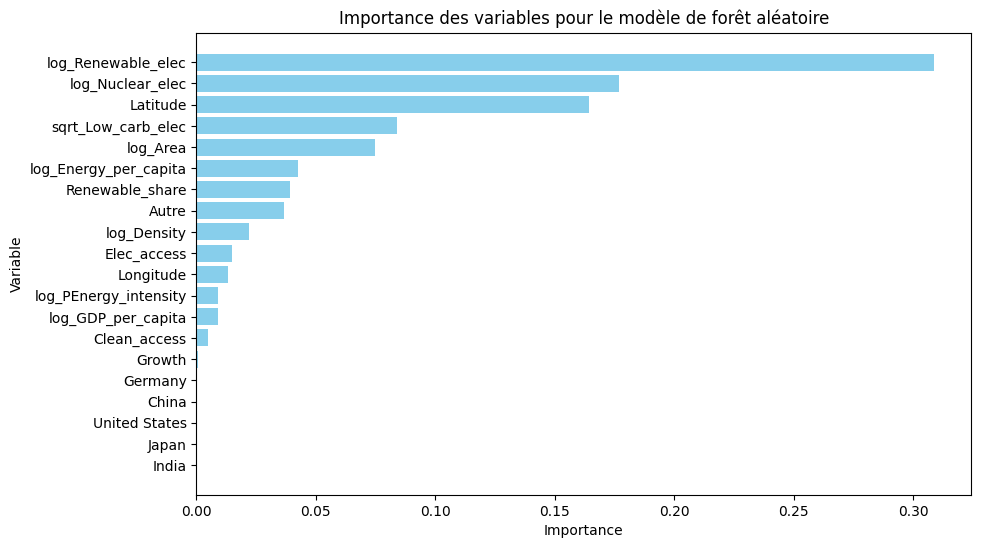

In [121]:
# Obtention de l'importance des variables
importances = forest_model_top5_entity.feature_importances_

# Création d'un DataFrame pour stocker les importances et les noms des variables
importance_df_entity = pd.DataFrame({'Feature': X_train_entity_polluant.columns, 'Importance': importances})

# Tri des variables par importance
importance_df_entity = importance_df_entity.sort_values(by='Importance', ascending=False)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.barh(importance_df_entity['Feature'], importance_df_entity['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le modèle de forêt aléatoire')
plt.gca().invert_yaxis()  # Inversion de l'axe y pour afficher les variables les plus importantes en haut
plt.show()

### 3.1.2 - Boosting

In [122]:
gb_entity = GradientBoostingRegressor(learning_rate=0.1, n_estimators=5000, max_depth=3)
gb_entity.fit(X_train_entity_quanti, Y_train_entity)

perf_cross_validation(gb_entity,X_train_entity_quanti,Y_train_entity)

Score de validation croisée pour le modèle GradientBoostingRegressor(n_estimators=5000)
Score de chaque validation croisée [0.8872258  0.92181676 0.8469011  0.875338   0.83141556]
Score moyen de validation croisée 0.8725394429199461



In [151]:
Y_pred_learn = gb_entity.predict(X_train_entity_quanti)
performance(X_train_entity, Y_train_entity, Y_pred_learn)

RMSE: 0.004365494626495948
MAE: 0.003381137531503215
R²: 0.9999966278770955
R² ajusté: 0.9999966041297511



Boosting
RMSE: 0.1830364233113023
MAE: 0.12339367114376967
R²: 0.9942050205220336
R² ajusté: 0.9940400388998851



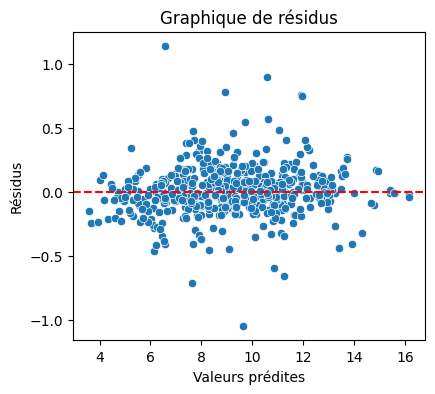

In [123]:
print("Boosting")
Y_pred_boost_entity = gb_entity.predict(X_test_entity_quanti)

# Évaluation de la performance
performance(X_test_entity, Y_test_entity, Y_pred_boost_entity)
graphe_residus(Y_test_entity, Y_pred_boost_entity)


## 3.2 - Complétion de valeurs manquantes dans le jeu de données

Jusqu'à maintenant, nous avons géré les valeurs manquantes en supprimant simplement les variables qui en contenaient trop : Renewables, Financial_flows et Renewable_per_capitales. En effet, ces variables ont plus de 25% de valeurs manquantes. Puis nous avons supprimé les individus pour lequels il reste au moins une valeur manquante.

Maintenant, nous allons essayer d'imputer les valeurs manquantes afin d'améliorer nos prévisions, en conservant donc plus d'individus et plus de variables.

### 3.2.1 - Etude des valeurs manquantes

Avant d'utiliser des méthodes d'imputations de données, nous allons commencer par étudier la répartition des données manquantes. En particulier, nous allons essayer de voir si les données manquantes sont réparties complètement aléatoirement (MCAR), aléatoirement mais dépendant de d'autres variables (ex du pays de l'année ou encore de la taille/de la richesse du pays): (MAR). La dernière répartition correspont à des données ne soient pas aléatoires, c'est à dire qu'elles dépendent de la variable en elle même : on pourrait par exemple supposer que les pays produisant moins d'énergie renouvelables sont moins suceptibles d'avoir des données de production.

Nous devons aussi étudier si les données sont univariante, monotone, ou non monotone. Dans notre jeu de données, la variable suivante ne dépend pas de celle actuelle. On peut alors écarter la possibilité que nos données manquantes soient monotone. Il est également peu probable que les données soient univariante. Cela s'explique par le fait qu'à partir du moment où une données est manquante pour un pays sur une année, il n'y a pas de raison qu'elle soit également manquante pour toutes les années suivantes. Cependant, on pourrait imaginer une situation de guerre qui bloquerait l'accès au données à partir d'une certaine date.

In [124]:
#On commence par récupérer les données avec les valeurs manquantes.

data_missing_value = data_mv.isna().mean().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print('--- Taux de valeurs manquantes ---')
print(data_missing_value*100)

data_missing_value2 = data_mv.isna().sum().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print(data_missing_value2)

--- Taux de valeurs manquantes ---
Renewables              58.563990
Financial_flows         57.248561
Renewable_per_capita    25.513839
CO2                     11.729241
Growth                   8.687312
GDP_per_capita           7.728145
PEnergy_intensity        5.672787
Renewable_share          5.316525
Clean_access             4.631406
Nuclear_elec             3.453001
Low_carb_elec            1.151000
Renewable_elec           0.575500
Fossil_elec              0.575500
Elec_access              0.274048
Latitude                 0.027405
Area                     0.027405
Density                  0.027405
Longitude                0.027405
Energy_per_capita        0.000000
Year                     0.000000
Entity                   0.000000
dtype: float64
Renewables              2137
Financial_flows         2089
Renewable_per_capita     931
CO2                      428
Growth                   317
GDP_per_capita           282
PEnergy_intensity        207
Renewable_share          194
Clea

On affiche à nouveau le taux de valeurs manquantes par variable dans notre jeu de données initial. 

In [125]:
# On étudie les valeurs manquantes pour chaque variables

def study_missing_value_entity_year(data_mv,variable):
    data_missing_value_variable_entity = data_mv.groupby('Entity')[variable].apply(lambda x: x.isnull().sum()).reset_index() # On affiche les pourcentages les plus importants en premier
    print("\n\n"+variable+" - Entity")
    print(data_missing_value_variable_entity[variable].value_counts())

    data_missing_value_variable_year = data_mv.groupby('Year')[variable].apply(lambda x: x.isnull().sum()).reset_index() # On affiche les pourcentages les plus importants en premier
    print("\n"+variable+" - Year")
    print(data_missing_value_variable_year[variable].value_counts())

for var in data_missing_value2.index[:14]:
    study_missing_value_entity_year(data_mv,var)





Renewables - Entity
Renewables
21    100
0      72
14      2
1       1
8       1
Name: count, dtype: int64

Renewables - Year
Renewables
103    8
100    6
102    6
101    1
Name: count, dtype: int64


Financial_flows - Entity
Financial_flows
21    55
1     19
2     12
8      9
5      8
9      8
3      7
15     7
7      7
11     5
16     5
14     5
6      5
12     5
4      4
13     4
10     4
18     3
19     2
17     1
20     1
Name: count, dtype: int64

Financial_flows - Year
Financial_flows
122    2
108    2
81     2
88     1
77     1
69     1
73     1
76     1
74     1
87     1
121    1
90     1
94     1
106    1
105    1
113    1
120    1
174    1
Name: count, dtype: int64


Renewable_per_capita - Entity
Renewable_per_capita
0     131
21     43
14      2
Name: count, dtype: int64

Renewable_per_capita - Year
Renewable_per_capita
45    14
43     7
Name: count, dtype: int64


CO2 - Entity
CO2
1     160
21     12
4       4
Name: count, dtype: int64

CO2 - Year
CO2
12     16
16      3

On observe :
* Pour la variable Renewables : les valeurs manquantes sont clairement dépendantes du pays en question. Il n'y a aucun lien avec l'année.
* Pour la variable Financial flows : on a aussi un lien clair avec les pays. En effet, 55 pays n'ont aucune valeur. On a également un lien avec l'année, notamment une année pour laquelle il manque 174 valeurs sur 176 !!
* Pour la variable Renewable_per_capita : les observations sont similaires avec celles pour Renewables : 43 pays pour lequels on a aucune données, 131 pour lequels on les a toutes. Il ne semble y avoir aucun lien avec l'année.
* Pour la variable cible CO2 : il y a une très grande majorité des pays (160) pour lesquels il manque une donnée, 12 pays pour lesquels on a aucune valeur de CO2. Au niveau des années, il y a une année pour laquel 175 pays n'ont pas de donnée(donc 1 seul pays a une donnée).
* Pour la variable Growth : On observe une dépendnace du pays, mais pas des années.
* Pour la variable GDP_per_capita : idem que pour la variable Growth.
* Pour la variable PEnergy_intensity : on observe principalement un pays pour lequel il manque toutes les données, et une année pour laquelle il manque quasiment toutes les valeurs. 
* Pour la variable Renewable_share : mêmes observations que pour PEnergy_intensity. 
* Pour la variable Clean_access : 8 pays pour lesquels valeurs manquantes, pas de lien avec les années.
* Pour la variable Nuclear_elec : 6 pays pour lesquels valeurs manquantes, pas de lien avec les années.
* Pour la variable Low_carb_elec : 2 pays pour lesquels valeurs manquantes, pas de lien avec les années.
* Pour la variable Renewable_elec et Fossil_elec : 1 pays pour lequel toutes les valeurs sont manquantes, pas de lien avec les années. 
* Pour la variable Elec_access : la variable est plutôt liée au pays, mais il y a très peu de valeurs manquantes.

Comme la variable à prédire est la variable CO2, on va supprimer toutes les lignes où la variable CO2 est manquante.

In [126]:
# Suppression de toutes les lignes contenant au moins une valeur manquante
data_mv2 = data_mv.dropna(axis = 0, how = 'any', subset='CO2')

study_missing_value_entity_year(data_mv2,'CO2')



CO2 - Entity
CO2
0    176
Name: count, dtype: int64

CO2 - Year
CO2
0    21
Name: count, dtype: int64


Il n'y a plus aucune valeur manquante pour la variable CO2. Maintenant qu'on a supprimé les données manquantes pour le CO2, nous allons étudier les données manquantes restantes.

In [127]:
data_missing_value3 = data_mv2.isna().mean().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print('--- Taux de valeurs manquantes ---')
print(data_missing_value3*100)

data_missing_value4 = data_mv2.isna().sum().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print(data_missing_value4)

--- Taux de valeurs manquantes ---
Renewables              57.156163
Financial_flows         54.517231
Renewable_per_capita    26.792921
Clean_access             3.973921
Nuclear_elec             3.725551
Growth                   2.949395
GDP_per_capita           1.986961
Low_carb_elec            1.148712
PEnergy_intensity        0.776156
Renewable_share          0.620925
Fossil_elec              0.620925
Renewable_elec           0.620925
Elec_access              0.279416
Latitude                 0.000000
Area                     0.000000
Density                  0.000000
Entity                   0.000000
CO2                      0.000000
Energy_per_capita        0.000000
Year                     0.000000
Longitude                0.000000
dtype: float64
Renewables              1841
Financial_flows         1756
Renewable_per_capita     863
Clean_access             128
Nuclear_elec             120
Growth                    95
GDP_per_capita            64
Low_carb_elec             37
PEne

Sans les données manquantes pour le CO2, onous observons un peu moins de valeurs manquantes pour les autres variables. De manière générale, le staux de valeurs manquantes diminuent. 

Avec la forme des données, les données manquantes semblent être du type MAR. En effet, elles semblent toutes liées au pays, à travers la variable 'Entity'. Nous allons maintenant appliquer 3 méthodes : KNN, MissForest et l'estimation par maximum de vraisemblance. 


### 3.2.2 - Complétion des valeurs manquantes avec la méthode KNN

L'imputation par KNN (k-nearest neighbors) utilise les plus proches voisins pour estimer les valeurs manquantes. Cette méthode identifie les k observations les plus proches d'une donnée avec une valeur manquante en utilisant des mesures de distance comme la distance euclidienne. Ensuite, elle impute la valeur manquante par la moyenne. Cette méthode est coûteuse en calcul pour de grands ensembles de données et est sensible aux valeurs aberrantes. 

On impute nos données manquantes avec cette méthode : 

In [160]:
from sklearn.impute import KNNImputer

data_mv2_quanti = data_mv2.drop(['Entity','Year'],axis=1)

# Création de l'imputer
imputer = KNNImputer(n_neighbors=2)

# Appliquer l'imputation aux données
data_mv3 = imputer.fit_transform(data_mv2_quanti)

df_data_mv3 = pd.DataFrame(data_mv3,columns=data_mv2_quanti.columns)


Nous allons maintenant tester la performance sur les données complétées avec la méthode du Boosting pour observer si nous obtenons une amélioration des résultats. En effet, lors de la comparaison des prédictions avec les valeurs réellées sur les ensembles de tests, nous avions vu que les méthodes de forêt aléatoire et boosting étaient le splus performantes, avec une très faible supériorité de la méthode boosting. C'est pour cette raison que nous allons utiliser celle-ci.

Comme pour la première partie, nous utilisons les mêmes transformations sur nos variables pour les rendre les plus gaussiennes possible. Nous allons également observer les variables supprimées dans la première partie pour voir s'il est ,écessaire de les transformer ou non.

<Figure size 1200x800 with 0 Axes>

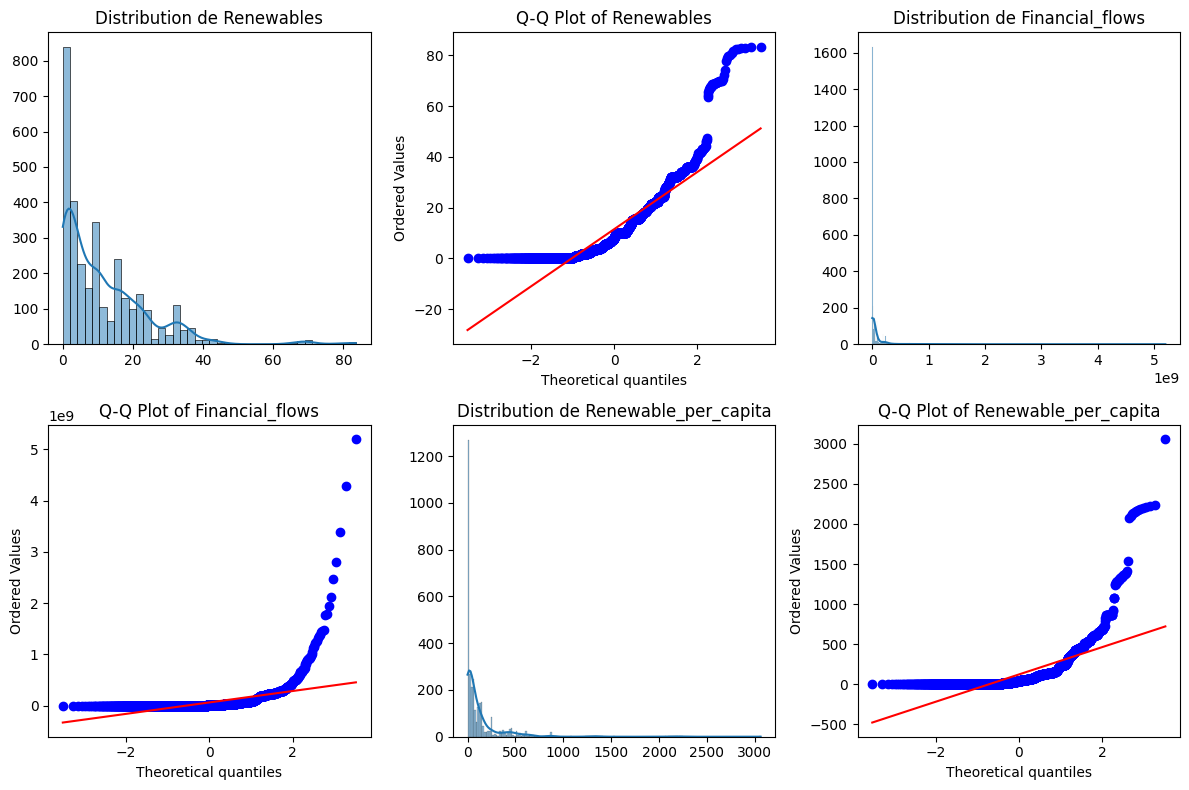

In [161]:
plt.figure(figsize=(12, 8))

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Distribution de Renewables
sns.histplot(df_data_mv3['Renewables'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution de Renewables')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('')

# Q-Q Plot of Renewables
stats.probplot(df_data_mv3['Renewables'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot of Renewables')

# Distribution de Financial_flows
sns.histplot(df_data_mv3['Financial_flows'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Distribution de Financial_flows')
axs[0, 2].set_xlabel('')
axs[0, 2].set_ylabel('')

# Q-Q Plot of Financial_flows
stats.probplot(df_data_mv3['Financial_flows'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot of Financial_flows')

# Distribution de Renewable_per_capita
sns.histplot(df_data_mv3['Renewable_per_capita'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution de Renewable_per_capita')
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('')

# Q-Q Plot of Renewable_per_capita
stats.probplot(df_data_mv3['Renewable_per_capita'], dist="norm", plot=axs[1, 2])
axs[1, 2].set_title('Q-Q Plot of Renewable_per_capita')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher le graphique
plt.show()

        

A l'image des observations de l'analyse exploratoire des données, nous décidons d'appliquer une transformation logarithmique sur chacune de nos variables ajoutées dans cette partie. 

<Figure size 1200x800 with 0 Axes>

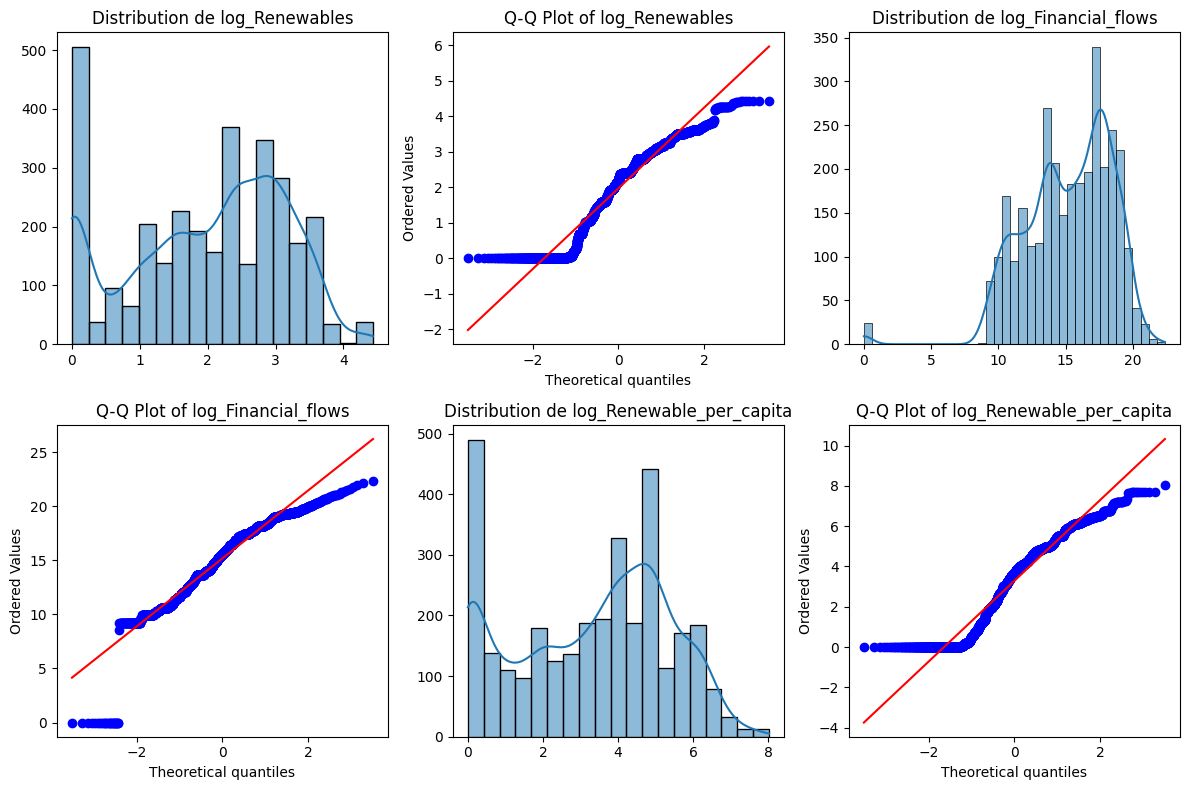

In [162]:

df_data_mv3['Renewables'] = np.log(df_data_mv3['Renewables']+1)
df_data_mv3.rename(columns = {'Renewables' : 'log_Renewables'}, inplace = True)

df_data_mv3['Financial_flows'] = np.log(df_data_mv3['Financial_flows']+1)
df_data_mv3.rename(columns = {'Financial_flows' : 'log_Financial_flows'}, inplace = True)

df_data_mv3['Renewable_per_capita'] = np.log(df_data_mv3['Renewable_per_capita']+1)
df_data_mv3.rename(columns = {'Renewable_per_capita' : 'log_Renewable_per_capita'}, inplace = True)


plt.figure(figsize=(12, 8))

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Distribution de Renewables
sns.histplot(df_data_mv3['log_Renewables'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution de log_Renewables')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('')

# Q-Q Plot of Renewables
stats.probplot(df_data_mv3['log_Renewables'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot of log_Renewables')

# Distribution de Financial_flows
sns.histplot(df_data_mv3['log_Financial_flows'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Distribution de log_Financial_flows')
axs[0, 2].set_xlabel('')
axs[0, 2].set_ylabel('')

# Q-Q Plot of Financial_flows
stats.probplot(df_data_mv3['log_Financial_flows'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot of log_Financial_flows')

# Distribution de Renewable_per_capita
sns.histplot(df_data_mv3['log_Renewable_per_capita'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution de log_Renewable_per_capita')
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('')

# Q-Q Plot of Renewable_per_capita
stats.probplot(df_data_mv3['log_Renewable_per_capita'], dist="norm", plot=axs[1, 2])
axs[1, 2].set_title('Q-Q Plot of log_Renewable_per_capita')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher le graphique
plt.show()


La transformation logarithmique permet d'avoir des données avec de stendances plus gaussiennes, réduit les écrats entre les valeurs extrêmes et les autres valeurs, ou encore atténue les outliers. Cependant, on observe des décrochages sur les QQ plots aux extrémités des droites. 

In [163]:
df_data_mv3['Nuclear_elec'] = np.log(df_data_mv3['Nuclear_elec']+1)
df_data_mv3.rename(columns = {'Nuclear_elec' : 'log_Nuclear_elec'}, inplace = True)

df_data_mv3['Renewable_elec'] = np.log(df_data_mv3['Renewable_elec']+1)
df_data_mv3.rename(columns = {'Renewable_elec' : 'log_Renewable_elec'}, inplace = True)

df_data_mv3['Low_carb_elec'] = np.log(df_data_mv3['Low_carb_elec']+1)
df_data_mv3.rename(columns = {'Low_carb_elec' : 'sqrt_Low_carb_elec'}, inplace = True)

df_data_mv3['Energy_per_capita'] = np.log(df_data_mv3['Energy_per_capita']+1)
df_data_mv3.rename(columns = {'Energy_per_capita' : 'log_Energy_per_capita'}, inplace = True)

df_data_mv3['CO2'] = np.log(df_data_mv3['CO2']+1)
df_data_mv3.rename(columns = {'CO2' : 'log_CO2'}, inplace = True)

df_data_mv3['PEnergy_intensity'] = np.log(df_data_mv3['PEnergy_intensity']+1)
df_data_mv3.rename(columns = {'PEnergy_intensity' : 'log_PEnergy_intensity'}, inplace = True)

df_data_mv3['GDP_per_capita'] = np.log(df_data_mv3['GDP_per_capita']+1)
df_data_mv3.rename(columns = {'GDP_per_capita' : 'log_GDP_per_capita'}, inplace = True)

df_data_mv3['Density'] = np.log(df_data_mv3['Density']+1)
df_data_mv3.rename(columns = {'Density' : 'log_Density'}, inplace = True)

df_data_mv3['Area'] = np.log(df_data_mv3['Area']+1)
df_data_mv3.rename(columns = {'Area' : 'log_Area'}, inplace = True)

Y_mv1 = df_data_mv3['log_CO2'] # On ne veut pas la variable à prédire dans le X_train, mais que dans Y_train
df_data_mv3.drop('log_CO2', axis=1, inplace=True)

df_complet = df_data_mv3.copy() # On utilisera le dataframe avec complétion de valeurs manquantes ultérieurement

df_data_mv3.drop('Fossil_elec', axis=1, inplace=True)


X_train_mv1,X_test_mv1,Y_train_mv1,Y_test_mv1 = train_test_split(df_data_mv3,Y_mv1,test_size=int(df.shape[0]*0.2),random_state=42)


In [164]:
gb_mv1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=5000, max_depth=3)
gb_mv1.fit(X_train_mv1, Y_train_mv1)

perf_cross_validation(gb_mv1,X_train_mv1,Y_train_mv1)

Score de validation croisée pour le modèle GradientBoostingRegressor(n_estimators=5000)
Score de chaque validation croisée [0.99648858 0.99474436 0.99697761 0.99532053 0.99479766]
Score moyen de validation croisée 0.9956657472264598



On obtient des résultats nettement meilleurs que sur le boosting sans complétion de données, avec 5% d'amélioration. Cette amélioration est suffisamment significative pour ne pas être uniquement liée à la modifaction des ensembles de train et de test. En effet, une amélioration plus mince est à nuancer et ne peut pas clairement être comparée aux résultats précédents en raison des différences des jeux de données. 

### 3.2.3 - Complétion des valeurs manquantes avec la méthode MissForest

Nous allons maintenant effectuer une complétion de valeurs manquantes avec la méthode MissForest. MissForest est une méthode d'imputation basée sur les forêts aléatoires et fonctionne de manière itérative. Initialement, les valeurs manquantes sont remplacées par des imputations simples comme la moyenne. Ensuite, pour chaque variable avec des valeurs manquantes, un modèle de forêt aléatoire est construit en utilisant les autres variables comme prédicteurs. Ce modèle prédit les valeurs manquantes, et le processus est répété jusqu'à ce que les imputations convergent. 

Nous imputons nos valeurs manquantes avec cette méthode : 

In [133]:
from missforest.missforest import MissForest

from contextlib import redirect_stdout
from io import StringIO

# Création d'une instance de l'estimateur MissForest
mf = MissForest()

# with pour empêcher des affichages gênants
with StringIO() as fake_out:
    with redirect_stdout(fake_out):
        df_data_mv4 = mf.fit_transform(data_mv2_quanti)


Comme précédemment, nous appliquons les mêmes transformations sur nos variables pour les rendre gaussiennes. 

In [134]:
df_data_mv4.drop('Fossil_elec', axis=1, inplace=True)

df_data_mv4['Nuclear_elec'] = np.log(df_data_mv4['Nuclear_elec']+1)
df_data_mv4.rename(columns={'Nuclear_elec': 'log_Nuclear_elec'}, inplace=True)

df_data_mv4['Renewable_elec'] = np.log(df_data_mv4['Renewable_elec']+1)
df_data_mv4.rename(columns={'Renewable_elec': 'log_Renewable_elec'}, inplace=True)

df_data_mv4['Low_carb_elec'] = np.log(df_data_mv4['Low_carb_elec']+1)
df_data_mv4.rename(columns={'Low_carb_elec': 'sqrt_Low_carb_elec'}, inplace=True)

df_data_mv4['Energy_per_capita'] = np.log(df_data_mv4['Energy_per_capita']+1)
df_data_mv4.rename(columns={'Energy_per_capita': 'log_Energy_per_capita'}, inplace=True)

df_data_mv4['CO2'] = np.log(df_data_mv4['CO2']+1)
df_data_mv4.rename(columns={'CO2': 'log_CO2'}, inplace=True)

df_data_mv4['PEnergy_intensity'] = np.log(df_data_mv4['PEnergy_intensity']+1)
df_data_mv4.rename(columns={'PEnergy_intensity': 'log_PEnergy_intensity'}, inplace=True)

df_data_mv4['GDP_per_capita'] = np.log(df_data_mv4['GDP_per_capita']+1)
df_data_mv4.rename(columns={'GDP_per_capita': 'log_GDP_per_capita'}, inplace=True)

df_data_mv4['Density'] = np.log(df_data_mv4['Density']+1)
df_data_mv4.rename(columns={'Density': 'log_Density'}, inplace=True)

df_data_mv4['Area'] = np.log(df_data_mv4['Area']+1)
df_data_mv4.rename(columns={'Area': 'log_Area'}, inplace=True)

df_data_mv4['Renewables'] = np.log(df_data_mv4['Renewables']+1)
df_data_mv4.rename(columns = {'Renewables' : 'log_Renewables'}, inplace = True)

df_data_mv4['Financial_flows'] = np.log(df_data_mv4['Financial_flows']+1)
df_data_mv4.rename(columns = {'Financial_flows' : 'log_Financial_flows'}, inplace = True)

df_data_mv4['Renewable_per_capita'] = np.log(df_data_mv4['Renewable_per_capita']+1)
df_data_mv4.rename(columns = {'Renewable_per_capita' : 'log_Renewable_per_capita'}, inplace = True)


# Il y'a une dizaine de valeurs manquantes générées par les log
df_data_mv4 = df_data_mv4.dropna(axis = 0, how = 'any')


Y_mv2 = df_data_mv4['log_CO2'] # On ne veut pas la variable à prédire dans le X_train, mais que dans Y_train
df_data_mv4.drop('log_CO2', axis=1, inplace=True)

X_train_mv2,X_test_mv2,Y_train_mv2,Y_test_mv2 = train_test_split(df_data_mv4,Y_mv2,test_size=int(df.shape[0]*0.2),random_state=42)


In [135]:
gb_mv2 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=5000, max_depth=3)
gb_mv2.fit(X_train_mv2, Y_train_mv2)

perf_cross_validation(gb_mv2,X_train_mv2,Y_train_mv2)

Score de validation croisée pour le modèle GradientBoostingRegressor(n_estimators=5000)
Score de chaque validation croisée [0.99629533 0.99335333 0.99493512 0.99426758 0.9947146 ]
Score moyen de validation croisée 0.9947131916784132



On obtient des résultats très légèrement meilleurs qu'avec le Boosting sans complétion des données manquantes. Il faut néanmoins faire attention car nous avons des échantillons de test et de train différents, ce qui peut engendrer des écarts. Les résultats sont tout de même sensiblement moins bon qu'avec le KNN.

### 3.2.4 - Complétion des valeurs manquantes avec l'estimateur du maximum de vraisemblance

L'imputation des valeurs manquantes par l'estimateur du maximum de vraisemblance combine deux étapes : l'étape d'espérance (E-step) et l'étape de maximisation (M-step). Dans l'E-step, on estime les valeurs manquantes en fonction des paramètres actuels du modèle. Ensuite, dans la M-step, on maximise cette estimation pour obtenir de nouveaux paramètres du modèle. Ces étapes sont répétées jusqu'à convergence, c'est-à-dire lorsque les paramètres ne changent plus significativement. 

In [136]:
from fancyimpute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)
data_mv5 = imputer.fit_transform(data_mv2_quanti)

df_data_mv5 = pd.DataFrame(data_mv5,columns=data_mv2_quanti.columns)

In [137]:
df_data_mv5.drop('Fossil_elec', axis=1, inplace=True)

df_data_mv5['Nuclear_elec'] = np.log(df_data_mv5['Nuclear_elec'] + 1)
df_data_mv5.rename(columns={'Nuclear_elec': 'log_Nuclear_elec'}, inplace=True)

df_data_mv5['Renewable_elec'] = np.log(df_data_mv5['Renewable_elec'] + 1)
df_data_mv5.rename(columns={'Renewable_elec': 'log_Renewable_elec'}, inplace=True)

df_data_mv5['Low_carb_elec'] = np.log(df_data_mv5['Low_carb_elec'] + 1)
df_data_mv5.rename(columns={'Low_carb_elec': 'sqrt_Low_carb_elec'}, inplace=True)

df_data_mv5['Energy_per_capita'] = np.log(df_data_mv5['Energy_per_capita'] + 1)
df_data_mv5.rename(columns={'Energy_per_capita': 'log_Energy_per_capita'}, inplace=True)

df_data_mv5['CO2'] = np.log(df_data_mv5['CO2'] + 1)
df_data_mv5.rename(columns={'CO2': 'log_CO2'}, inplace=True)

df_data_mv5['PEnergy_intensity'] = np.log(df_data_mv5['PEnergy_intensity'] + 1)
df_data_mv5.rename(columns={'PEnergy_intensity': 'log_PEnergy_intensity'}, inplace=True)

df_data_mv5['GDP_per_capita'] = np.log(df_data_mv5['GDP_per_capita'] + 1)
df_data_mv5.rename(columns={'GDP_per_capita': 'log_GDP_per_capita'}, inplace=True)

df_data_mv5['Density'] = np.log(df_data_mv5['Density'] + 1)
df_data_mv5.rename(columns={'Density': 'log_Density'}, inplace=True)

df_data_mv5['Area'] = np.log(df_data_mv5['Area'] + 1)
df_data_mv5.rename(columns={'Area': 'log_Area'}, inplace=True)

df_data_mv5['Renewables'] = np.log(df_data_mv5['Renewables']+1)
df_data_mv5.rename(columns = {'Renewables' : 'log_Renewables'}, inplace = True)

df_data_mv5['Financial_flows'] = np.log(df_data_mv5['Financial_flows']+1)
df_data_mv5.rename(columns = {'Financial_flows' : 'log_Financial_flows'}, inplace = True)

df_data_mv5['Renewable_per_capita'] = np.log(df_data_mv5['Renewable_per_capita']+1)
df_data_mv5.rename(columns = {'Renewable_per_capita' : 'log_Renewable_per_capita'}, inplace = True)

# Il y'a une dizaine de valeurs manquantes générées par les log
df_data_mv5 = df_data_mv5.dropna(axis=0, how='any')

Y_mv3 = df_data_mv5['log_CO2'] # On ne veut pas la variable à prédire dans le X_train, mais que dans Y_train
df_data_mv5.drop('log_CO2', axis=1, inplace=True)

X_train_mv3, X_test_mv3, Y_train_mv3, Y_test_mv3 = train_test_split(df_data_mv5, Y_mv3, test_size=int(df.shape[0] * 0.2), random_state=42)


In [138]:
gb_mv3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=5000, max_depth=3)
gb_mv3.fit(X_train_mv3, Y_train_mv3)

perf_cross_validation(gb_mv3,X_train_mv3,Y_train_mv3)

Score de validation croisée pour le modèle GradientBoostingRegressor(n_estimators=5000)
Score de chaque validation croisée [0.99481652 0.99353759 0.99474362 0.99341651 0.99220343]
Score moyen de validation croisée 0.9937435317738611



Les résultats sont comparables à ceux obtenus avec la méthode MissForest. Nous pouvons appliquer la même conclusion : les différences de résultats peuvent s'expliquer par les ensembles train et test différents avant et après complétion de valeurs manquantes.  

## 3.3 - Comparaison avec la régression linéaire simple

Comme annoncé précédemment, nous allons comparer les performances de nos modèles avce une modélisation par simple régression linéaire en utilisant uniquement la variable `Fossil_elec`, que nous avions supprimée sur la première partie de nos modélisations. Nous appliquons les mêmes méthodes que celles présentées précédemment dans les modèles de régression linéaire sans et avec sélection de variables. 

In [139]:
X_train_reg,X_test_reg,Y_train_reg,Y_test_reg = train_test_split(df_init[['log_Fossil_elec']],df_init['log_CO2'],test_size=int(df.shape[0]*0.2),random_state=42)

# Création d'un modèle de régression linéaire
model_reg_simple = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model_reg_simple.fit(X_train_reg, Y_train_reg)
perf_cross_validation(model_reg_simple,X_train_reg,Y_train_reg)

Score de validation croisée pour le modèle LinearRegression()
Score de chaque validation croisée [0.8358138  0.85457138 0.84578979 0.83964589 0.86255264]
Score moyen de validation croisée 0.8476746979094603



Les erreurs de généralisations obtenues sont bien plus importantes que celles de tous nos autres modèles, mis à part la SVR avec noyau radial que nous avons vite écraté. Cependant, pour une modélisation avec une seule variables, les résultats sont quand même très bons, voire impressionants. Cela confirme la corrélation importante entre les émissions de CO2 et la production d'électricité à partir d'énergie fossile. Ces résultats pourraient suffir en terme de performance si l'objectif est de détecter une tendnace à travers un modèle simple et rapide. 

Puisque nous sommes dans un cas de régression linéaire, nous allons redéfinir notre fonction `graphe_residus`pour qu'elle affiche à nouveau le QQ-plot. 

In [140]:
def graphe_residus(Y_test, Y_pred):
    residus = Y_test- Y_pred

    # Scatter plot des résidus
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    sns.scatterplot(x=Y_pred, y=residus)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Graphique de résidus')
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Résidus')
    
    # QQ plot des résidus
    plt.subplot(122)
    stats.probplot(residus, dist="norm", plot=plt)
    plt.title('QQ plot des résidus')
    plt.xlabel("Quantiles théoriques")
    plt.ylabel("Quantiles de l'échantillon")
    plt.show()

Régression linéaire avec la variable de production d'électricité issue d'énergie fossile
RMSE: 0.9485029929512896
MAE: 0.7159955609022375
R²: 0.8402130577730154
R² ajusté: 0.8399332207463481



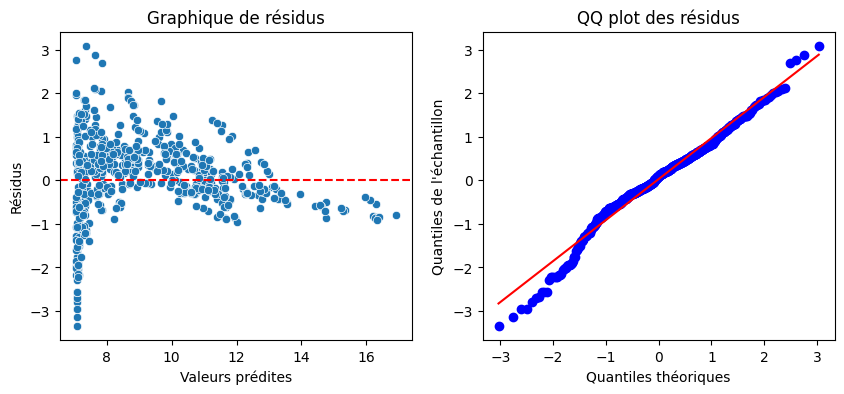

In [141]:
# Prédiction sur les données de test du modèle de régression linéaire sans sélection de variable 
Y_pred_reg_simple = model_reg_simple.predict(X_test_reg)
print("Régression linéaire avec la variable de production d'électricité issue d'énergie fossile")
performance(X_test_reg, Y_test_reg, Y_pred_reg_simple) # Evaluation de la performance du modèle

graphe_residus(Y_test_reg, Y_pred_reg_simple)

Le graphique des résidus montre une dispersion des résidus non uniforme autour de la droite y=0. Cela indique une hétéroscédasticité. Les résidus sont plus dispersés pour les valeurs prédites faibles et se resserrent pour les valeurs plus élevées, indiquant que la variabilité des erreurs n'est pas constante.

Le QQ plot des résidus montre que les résidus suivent globalement une distribution normale, même si on observe des déviations aux extrémités, qui indiquent des valeurs aberrantes ou des queues plus épaisses.

## 3.4 - Modèle complet avec imputation des valeurs manquantes et variable Fossil_elec

Nous avons vu dans la partie de complétion des valeurs manquantes que KNN permettait d'obtenir une vraie amélioration des performances. De plus, nous avons vu que la variable portant l'information sur la production d'électricité issue d'énergie fossile était très fortement corrélée avec les émissions de CO2. En effet, notre variable cible peut être modélisée par une régression linéaire simple de la variable Fossil_elec. Nous souhaitons maintenant créer un modèle qui combine toutes les améliorations mises en place. Nous allons utiliser la modélisation par boosting qui était le meilleur compromis entre performance et rapidité de calcul.

In [170]:
X_train_mv4, X_test_mv4, Y_train_mv4, Y_test_mv4 = train_test_split(df_complet, Y_mv1, test_size=int(df.shape[0] * 0.2), random_state=42)

gb_mv4 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=5000, max_depth=3)
gb_mv4.fit(X_train_mv4, Y_train_mv4)

perf_cross_validation(gb_mv4,X_train_mv4,Y_train_mv4)

Score de validation croisée pour le modèle GradientBoostingRegressor(n_estimators=5000)
Score de chaque validation croisée [0.99750233 0.99592861 0.99648802 0.99624766 0.99607997]
Score moyen de validation croisée 0.9964493183982839



In [171]:
def graphe_residus(Y_test, Y_pred):
    residus = Y_test- Y_pred

    # Scatter plot des résidus
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    sns.scatterplot(x=Y_pred, y=residus)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Graphique de résidus')
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Résidus')


print("Boosting")
Y_pred_boost_complet = gb.predict(X_test_mv4)

# Évaluation de la performance
performance(X_test_mv4, Y_test_mv4, Y_pred_boost_complet)
graphe_residus(Y_test_mv4, Y_pred_boost_complet)

Boosting


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Fossil_elec
- log_Financial_flows
- log_Renewable_per_capita
- log_Renewables


## 3.5 - Validation croisée par Monté-Carlo

La validation croisée par Monte Carlo consiste à répéter plusieurs fois le processus de division aléatoire des données en ensembles d'entraînement et de test, puis à calculer les performances du modèle sur chaque division. Contrairement à la validation croisée classique, où les données sont divisées en k sous-ensembles et où chaque sous-ensemble est utilisé une fois comme ensemble de test, la validation croisée par Monte Carlo utilise des sous-échantillons aléatoires à chaque itération. Cela permet une plus grande variabilité dans les ensembles d'entraînement et de test.

L'intérêt principal de cette méthode est qu'elle donne une estimation plus robuste et moins biaisée de la performance du modèle. Cela est particulièrement utile lorsque le nombre de données est limité ou lorsque la distribution des données est hétérogène. En répétant l'échantillonnage, on obtient une meilleure compréhension de la variabilité des performances du modèle et une évaluation plus fiable de sa généralisation.

Nous allons créer une fonction qui, pour un modèle existant donné, renvoie le boxplot associé à la alidation croisée par Monté-Carlo. L'objectif est d'appliquer cette fonction sur tous nos modèles, pour ensuite tracer un graphe permettant de visualiser simultanément tous les boxplots associés à toutes les méthodes développées.

In [150]:
from sklearn.model_selection import ShuffleSplit
from joblib import Parallel, delayed

def perf_cross_validation_monte_carlo(model, X, Y, n_iter=10, test_size=0.2, cv=5, scoring=None, n_jobs=-1, graph=True):
    # n_iter : nombre d'itérations pour Monte Carlo
    # test_size : proportion de l'ensemble de test à chaque itération
    # cv : nombre de découpages pour la validation croisée à chaque itération
    # scoring : métrique pour l'évaluation
    # n_jobs : nombre de jobs parallèles (-1 pour utiliser tous les processeurs disponibles)

    def single_run(model, X, Y, cv, scoring, test_size, random_state):
        shuffle_split = ShuffleSplit(n_splits=cv, test_size=test_size, random_state=random_state)
        scores = cross_val_score(model, X, Y, cv=shuffle_split, scoring=scoring, n_jobs=n_jobs)
        return np.mean(scores)

    # On utilise joblib pour le calcul en parallèle
    results = Parallel(n_jobs=n_jobs)(
        delayed(single_run)(model, X, Y, cv, scoring, test_size, i) for i in range(n_iter)
    )

    mean_score = np.mean(results)
    std_score = np.std(results)

    print("Scores de validation croisée pour le modèle", model)
    print("Scores de chaque itération Monte Carlo", results)
    print("Score moyen de validation croisée Monte Carlo", mean_score)
    print("Écart-type des scores de validation croisée Monte Carlo", std_score)
    print("")

    # Création du boxplot
    
    if graph:
        plt.figure(figsize=(10, 6))
        plt.boxplot(results, vert=True, patch_artist=True)
        plt.title('Boxplot des scores de validation croisée Monte Carlo')
        plt.xlabel('Itérations')
        plt.ylabel('Score')
        plt.show()
        
    
    return results

def multi_boxplot(list_results, list_name):
    if len(list_results) != len(list_name):
        print("Erreur, la liste des résultats et la liste des noms ne fait pas la même taille")
    else:
        plt.figure(figsize=(10, 6))
        plt.boxplot(list_results, vert=True, patch_artist=True, labels = list_name)
        plt.title('Boxplot des scores de validation croisée Monte Carlo')
        plt.ylabel('Score')
        plt.show()



# perf_cross_validation_monte_carlo(model, X, Y, n_iter=10, test_size=0.2, cv=5, scoring='neg_mean_squared_error')


Scores de validation croisée pour le modèle GradientBoostingRegressor(n_estimators=5000)
Scores de chaque itération Monte Carlo [0.9950033806016968, 0.9951940258510122, 0.9955859069085765, 0.9953391749575854, 0.995299826242368, 0.9954010633640736, 0.9953568873352969, 0.9952342290896941, 0.9951602587633583, 0.9957671390303744]
Score moyen de validation croisée Monte Carlo 0.9953341892144035
Écart-type des scores de validation croisée Monte Carlo 0.00020647622230856886


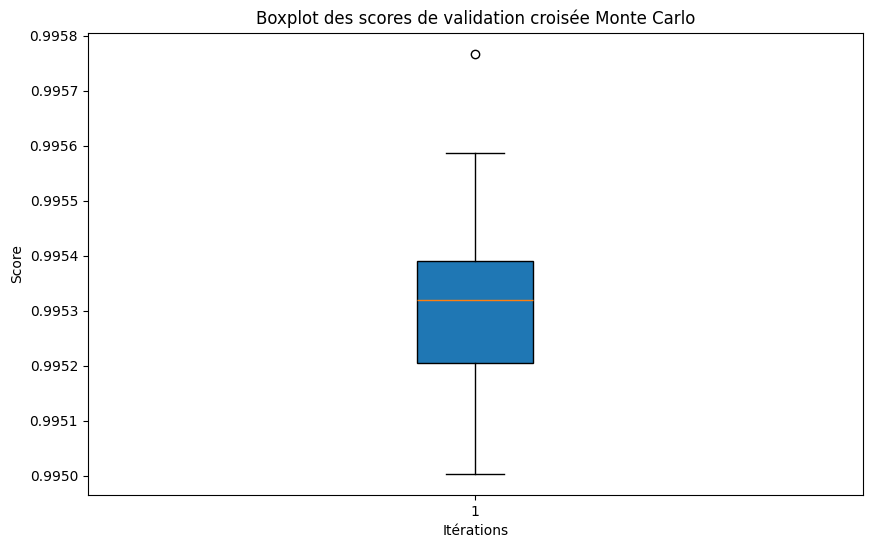

In [143]:
# Applications aux méthodes RandomForest et Boosting 
res1 = perf_cross_validation_monte_carlo(gb,X_train_quanti,Y_train, n_iter=10, test_size=0.2, cv=5)


In [147]:
res2 = perf_cross_validation_monte_carlo(model_rf,X_train_quanti,Y_train, n_iter=10, test_size=0.2, cv=5,graph=False)
res3 = perf_cross_validation_monte_carlo(model_ridge,X_train_quanti,Y_train, n_iter=10, test_size=0.2, cv=5,graph=False)
res4 = perf_cross_validation_monte_carlo(model_lasso,X_train_quanti,Y_train, n_iter=10, test_size=0.2, cv=5,graph=False)
res5 = perf_cross_validation_monte_carlo(best_tree_model,X_train_quanti,Y_train, n_iter=10, test_size=0.2, cv=5,graph=False)
res6 = perf_cross_validation_monte_carlo(keras_regressor,X_train_quanti,Y_train, n_iter=10, test_size=0.2, cv=5,graph=False)

Scores de validation croisée pour le modèle RandomForestRegressor(n_estimators=300)
Scores de chaque itération Monte Carlo [0.9947235413810536, 0.9958720776749986, 0.9948424644403688, 0.9950106812287043, 0.9953553958050427, 0.9954130266362438, 0.9951324444630643, 0.9951416324455632, 0.9947490235854751, 0.9957940304356381]
Score moyen de validation croisée Monte Carlo 0.9952034318096151
Écart-type des scores de validation croisée Monte Carlo 0.00038418840795515256
Scores de validation croisée pour le modèle Ridge(alpha=1)
Scores de chaque itération Monte Carlo [0.9798651074804658, 0.9827255441533627, 0.9793073106390751, 0.9800465893727799, 0.9808716587191775, 0.9800743036323771, 0.982224298572483, 0.9819140897853759, 0.9814488616051591, 0.9821123933551439]
Score moyen de validation croisée Monte Carlo 0.98105901573154
Écart-type des scores de validation croisée Monte Carlo 0.0011247929713485625
Scores de validation croisée pour le modèle Lasso(alpha=1e-12)
Scores de chaque itération Mon

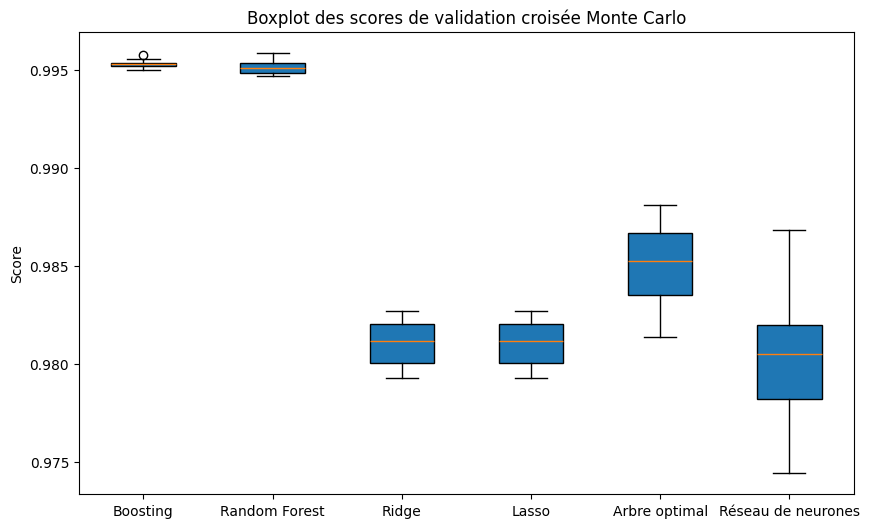

In [149]:
multi_boxplot([res1,res2,res3,res4,res5,res6],["Boosting","Random Forest","Ridge","Lasso","Arbre optimal","Réseau de neurones"])

Le graphique présente les scores de validation croisée Monte Carlo pour divers modèles de machine learning. Le modèle de Boosting se distingue par ses scores très élevés et une faible variance, indiquant une performance et une stabilité remarquables avec des scores autour de 0.995. Le modèle de Random Forest suit de près, affichant des scores également élevés, juste en dessous de ceux du Boosting, avec une légère augmentation de la variance, mais il reste très performant et fiable. Cela confirme les observations réalisées dans la partie précédente. 

Les modèles de régression Ridge et Lasso montrent des performances similaires, avec des scores avoisinant les 0.980 et une faible variance, signalant une stabilité raisonnable bien que leurs performances soient inférieures à celles des modèles de Boosting et de Random Forest. On retrouve la similarité dans les résultats de tous nos modèles de régression linéaire. L'arbre optimal présente une performance intermédiaire avec une médiane plus élevée que celles des modèles Ridge et Lasso, autour de 0.982, mais il affiche une variance plus importante, ce qui indique une incertitude accrue dans ses résultats.

Enfin, le réseau de neurones montre la plus grande variance parmi tous les modèles testés, avec une médiane autour de 0.980. Cette variabilité pourrait être due à différents facteurs, tels que l'initialisation des poids ou le réglage des hyperparamètres, ce qui rend ses performances moins prévisibles. 

# 4 - Conclusion sur le projet

Au terme de notre projet, nous avons réalisé une analyse approfondie des différentes étapes, allant de l'exploration des données à la comparaison des performances des modèles de machine learning, en passant par l'application de ces modèles sur un échantillon de test. 

L'analyse exploratoire a révélé plusieurs points essentiels pour la modélisation. Nous avons constaté la présence de nombreuses valeurs manquantes, résolues dans un premier temps par l'élimination des colonnes et lignes les plus affectées. Les différences d'échelles et de distributions non gaussiennes entre les variables ont été corrigées, notamment par des transformations logarithmiques, rendant nos données plus aptes à la modélisation. Nous avons également mis en évidence de fortes disparités entre les pays en termes d'émissions de CO2, influencées par la répartition du mix énergétique. Les énergies fossiles ont montré une corrélation élevée avec les émissions, tandis que l'énergie nucléaire et les énergies renouvelables n'avaient pas d'impact significatif sans la suppression préalable des énergies fossiles. Enfin, notre analyse en composantes principales a permis de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information.

La comparaison des erreurs de généralisation sur les différents modèles implémentés a montré que les modèles linéaires, qu'ils incluent ou non des méthodes de sélection de variables, étaient efficaces. Ces modèles présentent des scores de validation croisée similaires et élevés. Le Support Vector Regressor (SVR) avec noyau linéaire a également montré de bonnes performances, tandis que le noyau radial était moins adapté. Les modèles non linéaires, en particulier les forêts aléatoires et le boosting, ont dépassé les performances des modèles linéaires, capturant des relations complexes et donnant une meilleure robustesse face au surajustement. Ces méthodes se sont révélées particulièrement efficaces pour modéliser les relations non linéaires présentes dans les données.

L'application des modèles à l'échantillon de test a confirmé les tendances observées lors de la validation croisée. Les modèles d'ensemble (forêt aléatoire et boosting) ont montré les meilleures performances, avec des scores de R² et R² ajusté élevés, et des erreurs (RMSE et MAE) faibles, indiquant une excellente capacité de généralisation et de prédiction. L'analyse des variables importantes a révélé que la variable fossil_elec était fortement corrélée avec les émissions de CO2, confirmant alors les résultats de l'analyse exploratoire. Cela a également diminué l'importance relative des autres variables. Cependant, lorsque cette variable était retirée, d'autres variables comme la densité et la part d'énergie renouvelable devenaient plus significatives.

Par la suite, nous avons étudié les performances de nos meilleurs modèles sur un découpage de nos échantilons d'entraînement et de test selon une répartition équitable des pays sur les 20 années. Nous avons observé des erreurs de généralisation mauvaises en comparaison avec ces mêmes modèles entraînés sur un échantillon aléatoire. De plus, nous avions beaucoup de différences entre les résultats de chaque fold. Cependant, lorsque nous avons testé la performance de ces modèles sur les échantillons d'entraînement et de test, les résultats étaient plutôt satisfaisants, proches des premiers modèles, mais légèrement inférieurs. L'imputation des valeurs manquantes a pemris de mettre en évidence un réel gain grâce à la méthode KNN. Les autres méthodes utilisées ont fait leurs preuves, mais les résultats proches des modèles sans les valeurs manquantes indiquent une potentielle amélioration due à l'estimation de l'erreur. 

Nous avons pu comparer nos modèles avec une simple régression linéaire de la variable Fossil_elec. Ce modèle simple et peu coûteux en calcul offre des performances plutôt bonnes, voire remarquable si on prend en compte qu'il n'y a qu'une seule variable qui en modélise une autre. Cette modélisation peut être utile pour dégager des tendances rapides sur l'évolution des émissions de CO2. Finalement, nous avons regroupé toutes nos améliorations dans un modèle de boosting avec imputation des valeurs manquantes par KNN et ajout de la variable Fossil_elec. #A finir
Une validation croisée par Monté-Carlo a permis de comparer la robustesse et la variabilité de nos modèlisations. Cela nous a permis de confirmer les performances de nos modèles de boosting et forêt aléatoire, ce qui va dans le sens des analyses précédentes. 